In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime
import inspect

/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [200]:
#pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_inst = pd.read_csv('/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/instrumental_2024.csv')
df_man = pd.read_csv('/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv')
df_ev = pd.read_csv('/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/event_2024_anonim.csv')

In [4]:
print(df_inst.shape)
display(df_inst.head())

(48001, 7)


id  event_id  client_id            action_end  status status_name  \
0  26126618  20662568       8940  2024-01-12T09:12:33Z       2   закончено   
1  26130353  20662568       8940  2024-01-16T09:33:31Z       2   закончено   
2  26153904  20662568       8940  2024-01-12T13:25:38Z       2   закончено   
3  26126621  20662570      33133                   NaN       2   закончено   
4  26126736  20662572     453558                   NaN       2   закончено   

   actiontype_id  
0           4479  
1           5904  
2           5124  
3           4479  
4           4479

In [5]:
print(df_man.shape)
display(df_man.head())

(1742561, 11)


id  event_id  client_id            mnn concentration   dose measure  \
0  1205558  20662156     423804   Дексаметазон           NaN      4      мг   
1  1205559  20662156     423804  Натрия хлорид           NaN    100      мл   
2  1205560  20662156     423804  Дифенгидрамин           NaN     10      мг   
3  1205561  20662156     423804   Аспарагиназа           NaN  16000      ЕД   
4  1205562  20662156     423804  Натрия хлорид           NaN    500      мл   

  execution_date                   method  status         status_name  
0            NaN             Внутривенный       1  готов к выполнению  
1            NaN             Внутривенный       1  готов к выполнению  
2            NaN             Внутривенный       1  готов к выполнению  
3            NaN  Внутривенный длительная       1  готов к выполнению  
4            NaN  Внутривенный длительная       1  готов к выполнению

In [6]:
print(df_ev.shape)
display(df_ev.head())


(86340, 7)


event_id  client_id            hosp_start              hosp_end  \
0  20662567     413377  2024-01-01T06:26:37Z  2024-01-08T12:00:00Z   
1  20665667     376689                   NaN                   NaN   
2  20662568       8940  2024-01-01T09:03:38Z  2024-01-17T12:00:59Z   
3  20662569      72609  2024-01-01T09:05:49Z  2024-01-30T14:00:59Z   
4  20662570      33133  2024-01-01T09:14:13Z  2024-01-31T14:00:59Z   

               request_type event_org_code  \
0  Круглосуточный стационар          02.71   
1               Поликлиника          02.32   
2         Дневной стационар          02.42   
3         Дневной стационар          02.42   
4         Дневной стационар          02.42   

                           icd_codes_anon  
0                                Z30, Z30  
1                           J78, Z50, C13  
2  N66, D41, E49, N42, I13, I25, J89, C90  
3       E49, E68, D90, M56, I91, N08, C90  
4                 D92, N08, E49, I98, D90

In [7]:
def parse_conc(x):
    try:
        return float(x.replace(',', '.'))
    except:
        return np.nan

# чтение
df_drug = pd.read_csv(
    '/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv',
    parse_dates=['execution_date'],
    dayfirst=True,
    dtype={
        'id': 'int32',
        'event_id': 'int32',
        'client_id': 'int32',
        'dose': 'int32',
        'status': 'int8',
        'mnn': 'category',
        'measure': 'category',
        'method': 'category',
        'status_name': 'category'
    },
    converters={
        'concentration': parse_conc
    },
    low_memory=False
)

print(df_drug.info())
display(df_drug.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742561 entries, 0 to 1742560
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   id              int32   
 1   event_id        int32   
 2   client_id       int32   
 3   mnn             category
 4   concentration   float64 
 5   dose            int32   
 6   measure         category
 7   execution_date  object  
 8   method          category
 9   status          int8    
 10  status_name     category
dtypes: category(4), float64(1), int32(4), int8(1), object(1)
memory usage: 63.2+ MB
None


id  event_id  client_id            mnn  concentration   dose measure  \
0  1205558  20662156     423804   Дексаметазон            NaN      4      мг   
1  1205559  20662156     423804  Натрия хлорид            NaN    100      мл   
2  1205560  20662156     423804  Дифенгидрамин            NaN     10      мг   
3  1205561  20662156     423804   Аспарагиназа            NaN  16000      ЕД   
4  1205562  20662156     423804  Натрия хлорид            NaN    500      мл   

  execution_date                   method  status         status_name  
0            NaN             Внутривенный       1  готов к выполнению  
1            NaN             Внутривенный       1  готов к выполнению  
2            NaN             Внутривенный       1  готов к выполнению  
3            NaN  Внутривенный длительная       1  готов к выполнению  
4            NaN  Внутривенный длительная       1  готов к выполнению

In [8]:
df_drug['execution_date'] = pd.to_datetime(df_drug['execution_date'], dayfirst=True, errors='coerce')

In [9]:
uni_drugs = df_drug['mnn'].dropna().unique

In [10]:
df_man['client_id'].nunique()

3171

In [11]:
uni_drugs = pd.DataFrame({'mnn': df_drug['mnn'].dropna().unique()})
#uni_drugs.to_csv('/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/uni_drug.csv', index=False)

In [12]:
uni_drugs

mnn
0                                      Дексаметазон
1                                     Натрия хлорид
2                                     Дифенгидрамин
3                                      Аспарагиназа
4                                       Леналидомид
..                                              ...
434                                    Фенобарбитал
435                           Изосорбида мононитрат
436                                       Дорипенем
437                                  Пентоксифиллин
438  Иммуноглобулин человека антицитомегаловирусный

[439 rows x 1 columns]

In [13]:
df_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48001 entries, 0 to 48000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             48001 non-null  int64 
 1   event_id       48001 non-null  int64 
 2   client_id      48001 non-null  int64 
 3   action_end     34750 non-null  object
 4   status         48001 non-null  int64 
 5   status_name    48001 non-null  object
 6   actiontype_id  48001 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.6+ MB


In [14]:
df_ev['hosp_start'] = pd.to_datetime(
    df_ev['hosp_start'],   
    dayfirst=True,         
    errors='coerce'        
)

# Аналогично для hosp_end и execution_date
df_ev['hosp_end'] = pd.to_datetime(df_ev['hosp_end'], dayfirst=True, errors='coerce')
df_drug['execution_date'] = pd.to_datetime(df_drug['execution_date'], dayfirst=True, errors='coerce')

In [15]:
df_ev['icd_codes_anon'].value_counts()

icd_codes_anon
N96, N96              41001
N96, C90               1303
D89, D89               1112
N96, D89               1016
C26, C26                601
                      ...  
D49, K09, D92             1
M57, D26, N96             1
C22, D38, N96             1
K95, N85, Z68, C08        1
C97, M82, C97             1
Name: count, Length: 12833, dtype: int64

In [16]:
df_ev['codes_list'] = df_ev['icd_codes_anon'].str.split(r',\s*')

def find_duplicates(codes):
    cnt = Counter(codes)
    # отбираем только те коды, у которых count > 1
    return [code for code, c in cnt.items() if c > 1]

df_ev['duplicate_codes'] = df_ev['codes_list'].apply(find_duplicates)

df_dup = df_ev[df_ev['duplicate_codes'].map(bool)]

total_dup_cells = len(df_dup)
print(f"Всего ячеек с повторяющимися кодами: {total_dup_cells}")

code_dup_counts = (
    df_dup
    .explode('duplicate_codes')['duplicate_codes']
    .value_counts()
)

print("\nКоды и число ячеек, где они повторяются:")
print(code_dup_counts)

result = (
    code_dup_counts
    .rename_axis('icd_code')
    .reset_index(name='dup_cell_count')
)
print("\nResult DataFrame:")
print(result)

Всего ячеек с повторяющимися кодами: 50878

Коды и число ячеек, где они повторяются:
duplicate_codes
N96    41001
D89     1138
C26      645
C90      617
D99      413
       ...  
E69        1
E64        1
F39        1
D00        1
M34        1
Name: count, Length: 300, dtype: int64

Result DataFrame:
    icd_code  dup_cell_count
0        N96           41001
1        D89            1138
2        C26             645
3        C90             617
4        D99             413
..       ...             ...
295      E69               1
296      E64               1
297      F39               1
298      D00               1
299      M34               1

[300 rows x 2 columns]


In [17]:
# 2. Агрегация по дате
# 2.1 Инструментальные исследования: считаем число процедур в день
df_inst['date'] = df_inst['action_end'].dt.date
inst_daily = (
    df_inst
    .dropna(subset=['action_end'])
    .groupby('date')
    .agg(inst_count=('actiontype_id','count'))
    .reset_index()
)


AttributeError: Can only use .dt accessor with datetimelike values

In [18]:
# 2.2 События (госпитализации и услуги):
df_ev['adm_date'] = df_ev['hosp_start'].dt.date
df_ev['dis_date'] = df_ev['hosp_end'].dt.date
ev_adm = df_ev.dropna(subset=['adm_date']).groupby('adm_date').size().rename('hosp_adm')
ev_dis = df_ev.dropna(subset=['dis_date']).groupby('dis_date').size().rename('hosp_dis')
ev_srv = df_ev.dropna(subset=['adm_date']).groupby('adm_date').agg(services=('request_type','count'))
ev_daily = (
    pd.concat([ev_adm, ev_dis, ev_srv], axis=1)
      .fillna(0)
      .reset_index()
      .rename(columns={'index':'date'})
)

In [19]:
# 2.3 Расход лекарств: суммируем dose по execution_date
df_drug['date'] = df_drug['execution_date'].dt.date
drug_daily = (
    df_drug
    .dropna(subset=['execution_date'])
    .groupby('date')
    .agg(drug_qty=('dose','sum'),
         drug_events=('event_id','nunique'))
    .reset_index()
)

In [20]:
# 3. Объединение всех временных рядов в одну таблицу
df_daily = (
    drug_daily
    .merge(ev_daily,  on='date', how='outer')
    .merge(inst_daily, on='date', how='outer')
    .fillna(0)
)
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily = df_daily.sort_values('date').reset_index(drop=True)

NameError: name 'inst_daily' is not defined

In [21]:
print(df_inst['action_end'].dtype) 


object


In [22]:
# 2) Преобразовываем action_end в datetime
df_inst['action_end'] = pd.to_datetime(
    df_inst['action_end'],
    dayfirst=True,
    errors='coerce'   

SyntaxError: unexpected EOF while parsing (1833881931.py, line 5)

In [23]:
df_drug_ready = df_drug[df_drug['status'] == 2]

In [24]:
df_drug_ready

id  event_id  client_id             mnn  concentration  dose  \
12       1214294  20662525     444087   Циклофосфамид            NaN  1000   
13       1214295  20662525     444087   Натрия хлорид            NaN   250   
14       1214296  20662525     444087        Этопозид            NaN   160   
15       1214297  20662525     444087   Натрия хлорид            NaN   250   
16       1214332  20662525     444087        Этопозид            NaN   300   
...          ...       ...        ...             ...            ...   ...   
1741864  3736572  20751786     502326       Фуросемид            NaN   200   
1741865  3736573  20751786     502326       Фуросемид            NaN   200   
1741979  3739874  20751786     502326  Магния сульфат            NaN    10   
1742010  3739905  20751786     502326   Натрия хлорид            NaN   250   
1742106  3748996  20751786     502326      Габапентин            NaN   300   

        measure            execution_date                   method  status  \
12           мг 2024-03-01 10:41:19+00:00             Внутривенный       2   
13           мл 2024-03-01 10:41:19+00:00             Внутривенный       2   
14           мг 2024-03-01 10:45:08+00:00             Внутривенный       2   
15           мл 2024-03-01 10:45:08+00:00             Внутривенный       2   
16           мг 2024-03-01 10:49:05+00:00        Для приема внутрь       2   
...         ...                       ...                      ...     ...   
1741864      мг                       NaT  Внутривенный длительная       2   
1741865      мг                       NaT  Внутривенный длительная       2   
1741979      мл                       NaT  Внутривенный длительная       2   
1742010      мл                       NaT  Внутривенный длительная       2   
1742106      мг                       NaT        Для приема внутрь       2   

        status_name        date  
12        выполнено  2024-03-01  
13        выполнено  2024-03-01  
14        выполнено  2024-03-01  
15        выполнено  2024-03-01  
16        выполнено  2024-03-01  
...             ...         ...  
1741864   выполнено         NaT  
1741865   выполнено         NaT  
1741979   выполнено         NaT  
1742010   выполнено         NaT  
1742106   выполнено         NaT  

[1076579 rows x 12 columns]

Месячный расход (число применений) топ-10 препаратов:
mnn    АЗИЛСАРТАНА МЕДОКСОМИЛ  \
month                           
1.0                         0   
2.0                         0   
3.0                         0   
4.0                         0   
5.0                         0   
6.0                         0   
7.0                         0   
8.0                         0   
9.0                         0   
10.0                        0   
11.0                        0   
12.0                        0   

mnn    АСКОРБИНОВАЯ КИСЛОТА+НАТРИЯ АСКОРБАТ; КАЛИЯ ХЛОРИД+МАКРОГОЛ+НАТРИЯ ХЛОРИД+НАТРИЯ СУЛЬФАТ [НАБОР]  \
month                                                                                                     
1.0                                                    0                                                  
2.0                                                    0                                                  
3.0                                                    

/var/folders/6h/3kzhkdh95n98kk49r9h1ns600000gn/T/ipykernel_40960/2441092689.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_drug_ready
/var/folders/6h/3kzhkdh95n98kk49r9h1ns600000gn/T/ipykernel_40960/2441092689.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top


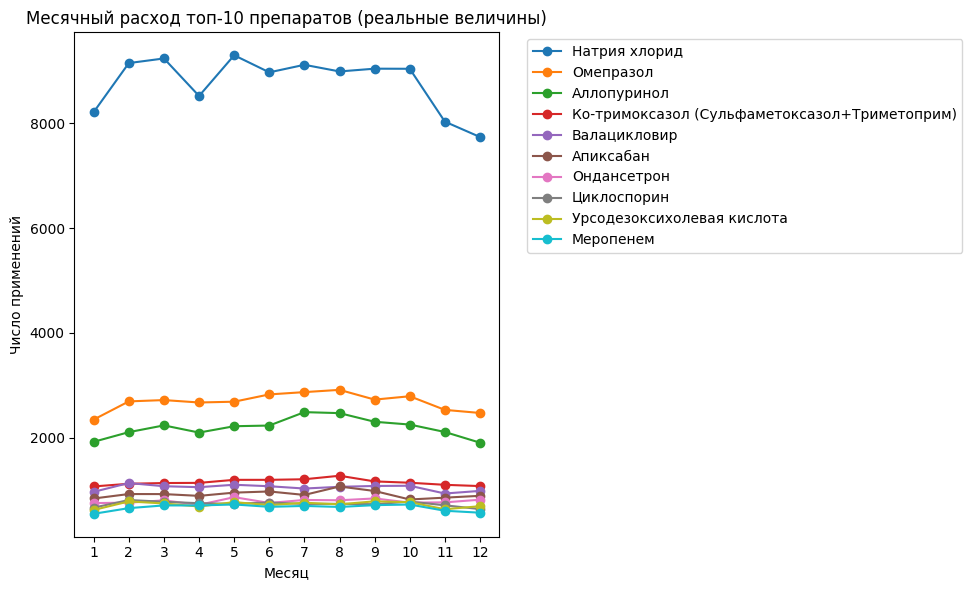

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Определяем топ-10 препаратов по числу выдач (расходу в штуках)
top10 = (
    df_drug_ready
    .groupby('mnn')
    .size()
    .nlargest(10)
    .index
    .tolist()
)

# 3. Фильтруем по топ-10 и извлекаем месяц
df_top = df_drug_ready[df_drug_ready['mnn'].isin(top10)].copy()
df_top['month'] = df_top['execution_date'].dt.month

# 4. Агрегация: число применений (расход) по месяцам для каждого МНН
seasonal_usage = (
    df_top
    .groupby(['mnn', 'month'])
    .size()
    .reset_index(name='usage_count')
)

# 5. Сводим в широкую форму: строки — месяцы, столбцы — препараты
usage_pivot = seasonal_usage.pivot(index='month', columns='mnn', values='usage_count').fillna(0)

# 6. Выводим таблицу "реального расхода" по месяцам
print("Месячный расход (число применений) топ-10 препаратов:")
print(usage_pivot)

# 7. Визуализация реального расхода
plt.figure(figsize=(10, 6))
for drug in top10:
    plt.plot(
        usage_pivot.index,
        usage_pivot[drug],
        marker='o',
        label=drug
    )
plt.xticks(range(1, 13))
plt.xlabel('Месяц')
plt.ylabel('Число применений')
plt.title('Месячный расход топ-10 препаратов (реальные величины)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

# === 0. Предполагаем, что df_drug, df_ev, df_inst загружены ===

# Приводим все даты к naive datetime
for df, col, utc in [
    (df_ev,   'hosp_start',     True),
    (df_ev,   'hosp_end',       True),
    (df_drug, 'execution_date', True),
    (df_inst, 'action_end',     True),
]:
    df[col] = (pd.to_datetime(df[col], utc=utc, errors='coerce')
                  .dt.tz_localize(None))

# Граница «последние 6 месяцев» для назначений
cutoff = datetime.now() - relativedelta(months=6)

# 1) Готовим полный контекст госпитализаций (без отсечения по cutoff!)
df_ev_proc = df_ev.copy()
df_ev_proc['hosp_duration_h'] = (
    df_ev_proc['hosp_end'] - df_ev_proc['hosp_start']
).dt.total_seconds().div(3600)
df_ev_proc['num_icd_codes'] = (
    df_ev_proc['icd_codes_anon']
      .fillna('')
      .apply(lambda s: len(s.split(',')) if s else 0)
)
df_ev_proc['start_dayofweek'] = df_ev_proc['hosp_start'].dt.dayofweek
df_ev_proc['start_month']     = df_ev_proc['hosp_start'].dt.month

# Оставляем только нужные поля, убираем дубликаты по (event_id, client_id)
df_ev_small = (
    df_ev_proc[[
        'event_id','client_id',
        'hosp_duration_h','request_type','event_org_code',
        'num_icd_codes','start_dayofweek','start_month'
    ]]
    .drop_duplicates(subset=['event_id','client_id'])
)

# 2) Считаем число завершённых действий за последние 6 мес.
inst_recent = df_inst[
    (df_inst['action_end'] >= cutoff) &
    (df_inst['status_name'] == 'закончено')
]
inst_cnt = (
    inst_recent
    .groupby('event_id')
    .size()
    .rename('action_count')
    .reset_index()
)

# 3) Отбираем назначения в мг за последние 6 мес.
df_drug_recent = df_drug[
    (df_drug['measure']=='мг') &
    (df_drug['dose']>0) &
    (df_drug['execution_date']>=cutoff)
][['event_id','client_id','mnn','dose']]

# 4) Для экономии памяти: делим на 10 чанков по событиям
event_ids = df_drug_recent['event_id'].unique()
chunks = []
for chunk in np.array_split(event_ids, 10):
    sub = df_drug_recent[df_drug_recent['event_id'].isin(chunk)]
    
    # 4.1 суммируем дозу
    agg = (
        sub
        .groupby(['event_id','client_id','mnn'], as_index=False)
        .dose.sum()
        .rename(columns={'dose':'total_dose_mg'})
    )
    
    # 4.2 склеиваем контекст госпитализации
    agg = agg.merge(
        df_ev_small,
        on=['event_id','client_id'],
        how='left',
        validate='many_to_one'
    )
    
    # 4.3 добавляем action_count
    agg = agg.merge(
        inst_cnt,
        on='event_id',
        how='left'
    )
    agg['action_count'] = agg['action_count'].fillna(0).astype(int)
    
    chunks.append(agg)

# 5) Собираем финальный датасет
df_model = pd.concat(chunks, ignore_index=True)

# 6) Проверяем пропуски
print("Shape:", df_model.shape)
miss = df_model.isna().sum()
pct  = (miss / len(df_model)*100).round(2)
print(pd.DataFrame({'count': miss, '%': pct}))
print(df_model.head())

/var/folders/6h/3kzhkdh95n98kk49r9h1ns600000gn/T/ipykernel_40960/809245212.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub
/var/folders/6h/3kzhkdh95n98kk49r9h1ns600000gn/T/ipykernel_40960/809245212.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub
/var/folders/6h/3kzhkdh95n98kk49r9h1ns600000gn/T/ipykernel_40960/809245212.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub
/var/folders/6h/3kzhkdh95n98

Shape: (1704637, 11)
                   count      %
event_id               0   0.00
client_id              0   0.00
mnn                    0   0.00
total_dose_mg          0   0.00
hosp_duration_h  1697613  99.59
request_type     1618154  94.93
event_org_code   1618154  94.93
num_icd_codes    1618154  94.93
start_dayofweek  1691467  99.23
start_month      1691467  99.23
action_count           0   0.00
   event_id  client_id                                                mnn  \
0  20742510       9333                             АЗИЛСАРТАНА МЕДОКСОМИЛ   
1  20742510       9333  АСКОРБИНОВАЯ КИСЛОТА+НАТРИЯ АСКОРБАТ; КАЛИЯ ХЛ...   
2  20742510       9333                                       Аватромбопаг   
3  20742510       9333                                        Адеметионин   
4  20742510       9333                                         Азацитидин   

   total_dose_mg  hosp_duration_h request_type event_org_code  num_icd_codes  \
0              0              NaN          NaN      

In [27]:
print(df_model.isna().sum())
print(df_model.info())


event_id                 0
client_id                0
mnn                      0
total_dose_mg            0
hosp_duration_h    1697613
request_type       1618154
event_org_code     1618154
num_icd_codes      1618154
start_dayofweek    1691467
start_month        1691467
action_count             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704637 entries, 0 to 1704636
Data columns (total 11 columns):
 #   Column           Dtype   
---  ------           -----   
 0   event_id         int32   
 1   client_id        int32   
 2   mnn              category
 3   total_dose_mg    int32   
 4   hosp_duration_h  float64 
 5   request_type     object  
 6   event_org_code   object  
 7   num_icd_codes    float64 
 8   start_dayofweek  float64 
 9   start_month      float64 
 10  action_count     int64   
dtypes: category(1), float64(4), int32(3), int64(1), object(2)
memory usage: 113.8+ MB
None


In [29]:
# 1) Минимальная таблица событий, одна строка на event_id
ev_min = (df_ev[["event_id", "client_id", "event_org_code", "request_type", "hosp_start", "hosp_end"]]
          .drop_duplicates("event_id")
          .copy())
assert ev_min["event_id"].is_unique

# 2) Левый джойн: M:1 (все строки из df_drug сохраняются)
df_drug_ev = df_drug.merge(
    ev_min, on="event_id", how="left",
    validate="m:1", suffixes=("", "_ev")
)

print("df_drug:", df_drug.shape,
      " ev_min:", ev_min.shape,
      " merged:", df_drug_ev.shape)

# 3) Санити-чеки после слияния
na_rate = df_drug_ev["event_org_code"].isna().mean()
print(f"Пропуски после джойна по event_org_code: {na_rate:.3%}")  # должно быть 0.000%

# 4) Неделя исполнения (для агрегаций/прогнозов)
df_drug_ev["week"] = pd.to_datetime(df_drug_ev["execution_date"], errors="coerce").dt.to_period("W").dt.start_time

df_drug: (1742561, 12)  ev_min: (86340, 6)  merged: (1742561, 17)
Пропуски после джойна по event_org_code: 0.000%


In [44]:
res = forecast_pipeline_2024(
    df_drug, df_ev,
    top_share=0.85,
    model_type="rf",          # или "ridge" для ещё быстрее
    targets=("mg",),          # сначала только mg
    train_weeks=26,           # полгода истории
    do_cv=False,              # без CV
    save_intermediate=False
)

/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dimashkhoroshun/Library/Python/3.

In [31]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

def add_spec_cols(df):
    sp = df["spec"].str.split("|", expand=True)
    sp.columns = ["org","req","mnn","unit"]
    return pd.concat([df, sp], axis=1)

H = "H26"  # или "H12"
fc = add_spec_cols(res["forecasts"].copy())
fcH = fc[fc["horizon"]==H].copy()

NameError: name 'res' is not defined

In [32]:
# mg
mg_hist = res["mg_week"].groupby("week")["y_mg"].sum().reset_index()
mg_fc   = fcH[fcH["unit"]=="mg"].groupby("week")["y_hat"].sum().reset_index()
plt.figure(); plt.plot(mg_hist["week"], mg_hist["y_mg"], label="Факт 2024 (mg)")
plt.plot(mg_fc["week"], mg_fc["y_hat"], label=f"Прогноз {H} (mg)")
plt.axvline(pd.Timestamp("2024-12-31"), ls="--", alpha=0.6); plt.legend(); plt.title("Итого mg: факт vs прогноз")
plt.tight_layout(); plt.show()

# units — если есть
units_fc = fcH[fcH["unit"]=="units"].groupby("week")["y_hat"].sum().reset_index()
if not units_fc.empty:
    plt.figure(); plt.plot(units_fc["week"], units_fc["y_hat"])
    plt.title(f"Итого units: прогноз {H}"); plt.tight_layout(); plt.show()

NameError: name 'res' is not defined

In [33]:
topN = (fcH[fcH["unit"]=="mg"].groupby("mnn")["y_hat"]
        .sum().sort_values(ascending=False).head(10).index)
wide = (fcH[(fcH["unit"]=="mg") & (fcH["mnn"].isin(topN))]
        .groupby(["week","mnn"])["y_hat"].sum().unstack(fill_value=0))
other = (fcH[(fcH["unit"]=="mg") & (~fcH["mnn"].isin(topN))]
         .groupby("week")["y_hat"].sum())
wide = wide.reindex(sorted(wide.index))
wide["прочие"] = other.reindex(wide.index).fillna(0)

plt.figure()
plt.stackplot(wide.index, *[wide[c].values for c in wide.columns], labels=wide.columns)
plt.legend(ncol=2, fontsize=8); plt.title(f"Top-10 МНН (mg) + прочие, {H}")
plt.tight_layout(); plt.show()

NameError: name 'fcH' is not defined

In [34]:
mg_by_org = (fcH[fcH["unit"]=="mg"].groupby(["week","org"])["y_hat"]
             .sum().unstack(fill_value=0))
plt.figure()
for col in mg_by_org.columns: plt.plot(mg_by_org.index, mg_by_org[col].values, label=str(col))
plt.legend(ncol=2, fontsize=8); plt.title(f"mg по площадкам, {H}")
plt.tight_layout(); plt.show()

NameError: name 'fcH' is not defined

In [35]:
# Недельный план mg / units по МНН
plan_mg_weekly = (fcH[fcH["unit"]=="mg"].groupby(["week","mnn"])["y_hat"]
                  .sum().reset_index().rename(columns={"y_hat":"mg_hat"}))
plan_units_weekly = (fcH[fcH["unit"]=="units"].groupby(["week","mnn"])["y_hat"]
                     .sum().reset_index().rename(columns={"y_hat":"units_hat"}))

# Помесячный план (агрегат недель)
def to_month(df, val_col, date_col="week"):
    if df.empty: return df
    tmp = df.copy()
    tmp["month"] = pd.to_datetime(tmp[date_col]).dt.to_period("M").dt.to_timestamp()
    return tmp.groupby(["month","mnn"])[val_col].sum().reset_index()

plan_mg_month  = to_month(plan_mg_weekly, "mg_hat")
plan_units_month = to_month(plan_units_weekly, "units_hat")

# Итог за горизонт
plan_mg_total = (fcH[fcH["unit"]=="mg"].groupby("mnn")["y_hat"]
                 .sum().reset_index(name="mg_hat_total").sort_values("mg_hat_total", ascending=False))
plan_units_total = (fcH[fcH["unit"]=="units"].groupby("mnn")["y_hat"]
                    .sum().reset_index(name="units_hat_total").sort_values("units_hat_total", ascending=False))

# ABC-XYZ (объём × вариативность) по mg
abcxyz = (fcH[fcH["unit"]=="mg"].groupby(["week","mnn"])["y_hat"].sum()
          .unstack(fill_value=0))
abcxyz_tbl = pd.DataFrame({
    "mnn": abcxyz.columns,
    "sum": abcxyz.sum().values,
    "mean": abcxyz.mean().values,
    "std": abcxyz.std(ddof=0).values
})
abcxyz_tbl["cv"] = abcxyz_tbl["std"] / abcxyz_tbl["mean"].replace(0,np.nan)
abcxyz_tbl = abcxyz_tbl.sort_values("sum", ascending=False)

NameError: name 'fcH' is not defined

In [36]:
out = Path("/tmp/drug_forecast_export"); out.mkdir(parents=True, exist_ok=True)
plan_mg_weekly.to_csv(out/"plan_mg_weekly.csv", index=False)
plan_mg_month.to_csv(out/"plan_mg_month.csv", index=False)
plan_mg_total.to_csv(out/"plan_mg_total.csv", index=False)
if not plan_units_weekly.empty: plan_units_weekly.to_csv(out/"plan_units_weekly.csv", index=False)
if not plan_units_month.empty:  plan_units_month.to_csv(out/"plan_units_month.csv", index=False)
if not plan_units_total.empty:  plan_units_total.to_csv(out/"plan_units_total.csv", index=False)
abcxyz_tbl.to_csv(out/"mg_abcxyz.csv", index=False)
print("saved to:", out)

NameError: name 'plan_mg_weekly' is not defined

In [37]:
# берём любую обученную серию
keys = [k for k, mdl in res["models"].items() if mdl is not None]
if keys:
    org, req, mnn, unit, hor = keys[0]
    design = res["designs"][(org,req,mnn,unit,hor)]
    ycol = "y_mg" if unit=="mg" else "y_units"
    Xtrain = design[[c for c in design.columns if c not in {"week","org_code","req_type","mnn_norm",ycol}]].fillna(0.0)
    ytrain = design[ycol].values
    mdl = res["models"][(org,req,mnn,unit,hor)]
    plot_feature_importance(mdl, Xtrain.columns.tolist(), top_k=15, title=f"FI: {mnn} | {org} | {req}")
    plot_partial_dependence_top(mdl, Xtrain, [f for f in ["admissions","bed_days","weekofyear","lag_1","roll4"] if f in Xtrain.columns])

NameError: name 'res' is not defined

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def _as_week(dt):
    s = pd.to_datetime(dt, errors="coerce")
    try: s = s.dt.tz_localize(None)
    except: pass
    return s.dt.to_period("W").dt.start_time

def coverage_report(df_drug, df_ev):
    out = {}

    # 1) Базовые диапазоны дат
    d = pd.DataFrame({
        "table": ["df_drug","df_ev(hosp_start)","df_ev(hosp_end)"],
        "min":  [pd.to_datetime(df_drug["execution_date"], errors="coerce").min(),
                 pd.to_datetime(df_ev["hosp_start"], errors="coerce").min(),
                 pd.to_datetime(df_ev["hosp_end"], errors="coerce").min()],
        "max":  [pd.to_datetime(df_drug["execution_date"], errors="coerce").max(),
                 pd.to_datetime(df_ev["hosp_start"], errors="coerce").max(),
                 pd.to_datetime(df_ev["hosp_end"], errors="coerce").max()],
    })
    out["date_ranges"] = d

    # 2) Пропуски по ключам
    miss = pd.Series({
        "drug:execution_date_NaN_%": 100*pd.to_datetime(df_drug["execution_date"], errors="coerce").isna().mean(),
        "drug:event_id_NaN_%":        100*df_drug["event_id"].isna().mean(),
        "ev:event_id_NaN_%":          100*df_ev["event_id"].isna().mean(),
        "ev:hosp_start_NaN_%":        100*pd.to_datetime(df_ev["hosp_start"], errors="coerce").isna().mean(),
        "ev:hosp_end_NaN_%":          100*pd.to_datetime(df_ev["hosp_end"], errors="coerce").isna().mean(),
        "ev:icd_codes_anon_NaN_%":    100*df_ev["icd_codes_anon"].isna().mean(),
    }, name="pct")
    out["missing_pct"] = miss.to_frame()

    # 3) Джойн-покрытие event_id (m:1)
    ev_min = df_ev[["event_id","event_org_code","request_type"]].drop_duplicates("event_id")
    merged = df_drug.merge(ev_min, on="event_id", how="left", validate="m:1")
    join_gap_pct = 100*merged["event_org_code"].isna().mean()
    out["join_coverage"] = pd.DataFrame({"metric":["drug rows without match in ev"], "pct":[join_gap_pct]})

    # 4) Недельные ряды для сравнения
    g_drug = df_drug.copy()
    g_drug["week"] = _as_week(g_drug["execution_date"])
    g_ev = df_ev.copy()
    g_ev["week"] = _as_week(g_ev["hosp_start"])
    if "qty_mg" not in g_drug.columns:
        # если ещё не считали qty_mg/qty_units
        g_drug["qty_mg"] = pd.to_numeric(g_drug.get("qty_mg"), errors="coerce")
        g_drug["qty_units"] = pd.to_numeric(g_drug.get("qty_units"), errors="coerce")

    wk_ev = (g_ev.groupby("week", dropna=False)
                .agg(admissions=("event_id","nunique"),
                     bed_days=("hosp_end", lambda x: 0))  # placeholder если нет los
            )
    # если в df_ev есть los_days — используем его
    if "los_days" in g_ev.columns:
        wk_ev["bed_days"] = g_ev.groupby("week")["los_days"].sum()

    wk_drug = g_drug.groupby("week", dropna=False)[["qty_mg","qty_units"]].sum()

    wk = wk_ev.join(wk_drug, how="outer").fillna(0).sort_index()
    out["weekly_overview"] = wk.reset_index()

    # 5) Хвост 2024: «провал» последних недель
    wk_24 = wk.loc[(wk.index >= "2024-01-01") & (wk.index <= "2024-12-31")].copy()
    tail = wk_24.tail(4)[["admissions","qty_mg","qty_units"]].mean()
    body = wk_24.iloc[:-4][["admissions","qty_mg","qty_units"]].median() if len(wk_24)>8 else wk_24.median(numeric_only=True)
    drop_ratio = (tail / body.replace(0,np.nan)).rename("tail_vs_median")
    out["tail_drop_2024"] = drop_ratio.to_frame()

    # 6) Дыры по org×req: есть поток, нет расхода
    ev_org = (g_ev.groupby(["week","event_org_code","request_type"])
                .agg(adm=("event_id","nunique")).reset_index())
    dr_org = (merged.copy().assign(week=_as_week(merged["execution_date"]))
                .groupby(["week","event_org_code","request_type"])["id"].size()
                .reset_index(name="drug_rows"))
    holes = ev_org.merge(dr_org, on=["week","event_org_code","request_type"], how="left").fillna({"drug_rows":0})
    holes["hole_flag"] = (holes["adm"]>0) & (holes["drug_rows"]==0)
    holes_sum = (holes.groupby(["event_org_code","request_type"])["hole_flag"].mean()*100.0).reset_index(name="weeks_with_hole_%")
    out["holes_by_orgreq_%"] = holes_sum.sort_values("weeks_with_hole_%", ascending=False)

    return out

# -------- Вызов отчёта --------
cov = coverage_report(df_drug, df_ev)
for k,v in cov.items():
    print(f"\n=== {k} ===")
    print(v.head(10))


=== date_ranges ===
               table                 min                 max
0            df_drug 2024-01-01 07:10:32 2025-12-01 21:13:31
1  df_ev(hosp_start) 2024-01-01 06:26:37 2024-12-12 16:02:50
2    df_ev(hosp_end) 2024-01-02 08:00:00 2025-12-01 23:00:00

=== missing_pct ===
                                 pct
drug:execution_date_NaN_%  75.919523
drug:event_id_NaN_%         0.000000
ev:event_id_NaN_%           0.000000
ev:hosp_start_NaN_%        95.141302
ev:hosp_end_NaN_%          95.258281
ev:icd_codes_anon_NaN_%     0.000000

=== join_coverage ===
                          metric  pct
0  drug rows without match in ev  0.0

=== weekly_overview ===
        week  admissions  bed_days  qty_mg  qty_units
0 2024-01-01       185.0       0.0     0.0        0.0
1 2024-01-08       131.0       0.0     0.0        0.0
2 2024-01-29        81.0       0.0     0.0        0.0
3 2024-02-05       229.0       0.0     0.0        0.0
4 2024-02-12        60.0       0.0     0.0        0.0
5 2024-

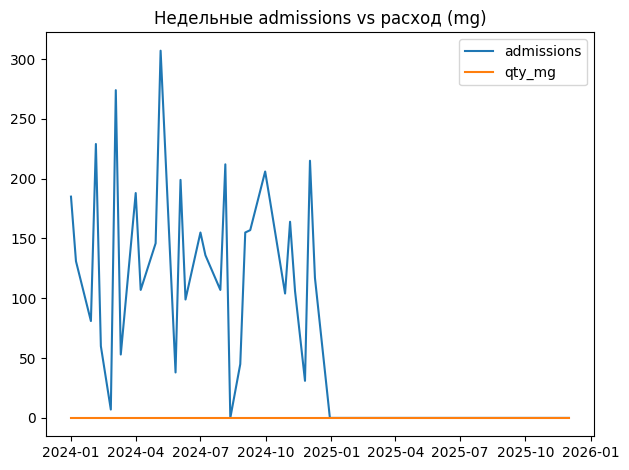

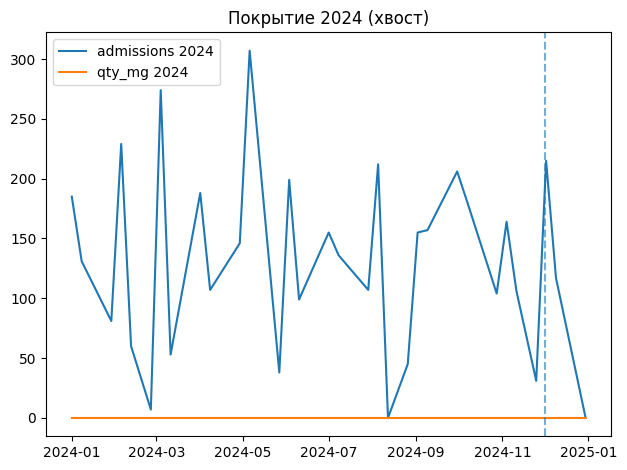

In [39]:
wk = cov["weekly_overview"]
wk["week"] = pd.to_datetime(wk["week"])

# admissions vs qty_mg (вся история)
plt.figure()
plt.plot(wk["week"], wk["admissions"], label="admissions")
plt.plot(wk["week"], wk["qty_mg"], label="qty_mg")
plt.legend(); plt.title("Недельные admissions vs расход (mg)")
plt.tight_layout(); plt.show()

# ТОЛЬКО 2024: проверка хвоста (ожидание провала = проблемы с выгрузкой/праздники)
wk24 = wk[(wk["week"] >= "2024-01-01") & (wk["week"] <= "2024-12-31")]
plt.figure()
plt.plot(wk24["week"], wk24["admissions"], label="admissions 2024")
plt.plot(wk24["week"], wk24["qty_mg"], label="qty_mg 2024")
plt.axvline(pd.Timestamp("2024-12-01"), ls="--", alpha=0.6)
plt.legend(); plt.title("Покрытие 2024 (хвост)")
plt.tight_layout(); plt.show()

In [40]:
# ======== 0. Пути к данным  ========
DRUG_CSV     = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
EV_CSV       = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/event_2024_anonim.csv"
MNN_LIST_CSV = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/every_week.csv"
OUTPUT_DIR   = "./out_courses"

# --- парсер концентрации (mg/ml и т.п.) ---
import re
def parse_conc(x):
    if pd.isna(x): 
        return np.nan
    s = str(x).strip().replace(",", ".").lower()
    # простые случаи: "5", "5.0", "5 mg/ml", "5 мг/мл"
    m = re.search(r"([0-9]+(?:\.[0-9]+)?)", s)
    if not m:
        return np.nan
    try:
        val = float(m.group(1))
    except Exception:
        return np.nan
    return val

# ======== 1. Загрузка ========
def load_data(drug_csv: str, ev_csv: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_drug = pd.read_csv(
        drug_csv,
        parse_dates=["execution_date"],
        dayfirst=True,
        dtype={
            "id": "int32",
            "event_id": "int32",
            "client_id": "int32",
            "dose": "int32",
            "status": "int8",
            "mnn": "category",
            "measure": "category",
            "method": "category",
            "status_name": "category",
        },
        converters={"concentration": parse_conc},
        low_memory=False,
    )
    df_ev = pd.read_csv(
        ev_csv,
        dtype={
            "event_id": "int32",
            "client_id": "int32",
            "request_type": "string",
            "event_org_code": "string",
            "icd_codes_anon": "string",
        },
        parse_dates=["hosp_start", "hosp_end"],
        dayfirst=True,
        low_memory=False,
    )
    return df_drug, df_ev

In [41]:
df_drug

id  event_id  client_id                         mnn  \
0        1205558  20662156     423804                Дексаметазон   
1        1205559  20662156     423804               Натрия хлорид   
2        1205560  20662156     423804               Дифенгидрамин   
3        1205561  20662156     423804                Аспарагиназа   
4        1205562  20662156     423804               Натрия хлорид   
...          ...       ...        ...                         ...   
1742556  4032679  20707985     472604                   Омепразол   
1742557  4032680  20707985     472604                   Омепразол   
1742558  4032681  20707985     472604  Урсодезоксихолевая кислота   
1742559  4032682  20707985     472604  Урсодезоксихолевая кислота   
1742560  4032683  20707985     472604  Урсодезоксихолевая кислота   

         concentration   dose measure execution_date                   method  \
0                  NaN      4      мг            NaT             Внутривенный   
1                  NaN    100      мл            NaT             Внутривенный   
2                  NaN     10      мг            NaT             Внутривенный   
3                  NaN  16000      ЕД            NaT  Внутривенный длительная   
4                  NaN    500      мл            NaT  Внутривенный длительная   
...                ...    ...     ...            ...                      ...   
1742556            NaN     20      мг            NaT        Для приема внутрь   
1742557            NaN     20      мг            NaT        Для приема внутрь   
1742558            NaN    750      мг            NaT        Для приема внутрь   
1742559            NaN    750      мг            NaT        Для приема внутрь   
1742560            NaN    750      мг            NaT        Для приема внутрь   

         status         status_name date  
0             1  готов к выполнению  NaT  
1             1  готов к выполнению  NaT  
2             1  готов к выполнению  NaT  
3             1  готов к выполнению  NaT  
4             1  готов к выполнению  NaT  
...         ...                 ...  ...  
1742556       1  готов к выполнению  NaT  
1742557       1  готов к выполнению  NaT  
1742558       1  готов к выполнению  NaT  
1742559       1  готов к выполнению  NaT  
1742560       1  готов к выполнению  NaT  

[1742561 rows x 12 columns]

In [53]:
# =============== 1) Статичный граф с фильтрами ===============
import numpy as np
import matplotlib.pyplot as plt

def _short(s, n=22):
    s = str(s)
    return s if len(s) <= n else s[:n-1] + "…"

def plot_global_graph_filtered(
    pairs_df,            # как ты получаешь выше
    mnn_cols,            # список МНН (порядок столбцов корзин)
    c_i,                 # поддержка по МНН (X.sum(axis=0))
    min_support=20,      # фильтр по совместной поддержке пары
    min_jaccard=0.35,    # фильтр по жаккару
    min_conf=0.65,       # фильтр по уверенности
    min_degree=2,        # прячем узлы со степенью < min_degree
    keep_top_by_support=80, # оставим топ-N узлов по поддержке (если сеть огромная)
    label_width=22,
    figsize=(14,9),
    title="Граф сильных связей (толщина ~ Jaccard, размер ~ поддержка)"
):
    import networkx as nx

    # фильтруем рёбра
    core = pairs_df.loc[
        (pairs_df["support_AB"] >= min_support) &
        ( (pairs_df["jaccard"] >= min_jaccard) |
          (pairs_df["conf_B_given_A"] >= min_conf) |
          (pairs_df["conf_A_given_B"] >= min_conf) )
    ].copy()

    if core.empty:
        print("Нет рёбер после фильтров — ослабь пороги.")
        return

    # граф
    G = nx.Graph()
    # добавим узлы с весом=поддержка
    sup = {m: int(c_i[i]) for i, m in enumerate(mnn_cols)}
    # если сеть большая — оставим топ-N по поддержке
    keep = set([m for m,_ in sorted(sup.items(), key=lambda x: x[1], reverse=True)[:keep_top_by_support]])

    for n in keep:
        G.add_node(n, weight=sup[n])

    # добавляем рёбра только между узлами из keep
    for _, r in core.iterrows():
        a, b = r["A"], r["B"]
        if a in keep and b in keep:
            G.add_edge(a, b, w=float(r["jaccard"]), s=int(r["support_AB"]))

    # убираем узлы малой степени
    drop = [n for n in list(G.nodes()) if G.degree(n) < min_degree]
    G.remove_nodes_from(drop)

    if G.number_of_nodes() == 0:
        print("После удаления малой степени граф пуст — снизь min_degree или увеличь keep_top_by_support.")
        return

    # найдём сообщества для окраски
    try:
        from networkx.algorithms.community import greedy_modularity_communities
        comms = list(greedy_modularity_communities(G, weight="w"))
        color_map = {}
        for ci, comm in enumerate(comms):
            for n in comm:
                color_map[n] = ci
        colors = [color_map[n] for n in G.nodes()]
    except Exception:
        colors = "tab:blue"

    # раскладка — увеличим «расталкивание»
    k = 1/np.sqrt(max(1, G.number_of_nodes()))
    pos = nx.spring_layout(G, k=k*1.5, iterations=400, seed=42)

    # размеры/толщины
    node_sizes = [120 + 160*np.sqrt(G.nodes[n]["weight"]) for n in G.nodes()]
    edge_w = [1.0 + 6.0*G.edges[e]["w"] for e in G.edges()]

    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(G, pos, width=edge_w, alpha=0.25)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=colors, alpha=0.95)
    nx.draw_networkx_labels(G, pos,
                            labels={n: _short(n, label_width) for n in G.nodes()},
                            font_size=8)
    plt.title(title)
    plt.axis("off"); plt.tight_layout(); plt.show()

    # Подсказка по настройкам
    print(f"Nodes: {G.number_of_nodes()} | Edges: {G.number_of_edges()} "
          f"| min_support={min_support}, min_jaccard={min_jaccard}, min_conf={min_conf}, "
          f"min_degree={min_degree}, keep_top_by_support={keep_top_by_support}")


# =============== 2) Интерактивный HTML через pyvis ===============
def plot_interactive_pyvis(
    pairs_df, mnn_cols, c_i,
    html_path="mnn_network.html",
    min_support=20, min_jaccard=0.35, min_conf=0.65,
    keep_top_by_support=300
):
    """
    Сохранит интерактивный HTML (масштабирование, перетаскивание, тултипы).
    """
    from pyvis.network import Network

    sup = {m: int(c_i[i]) for i, m in enumerate(mnn_cols)}
    keep = set([m for m,_ in sorted(sup.items(), key=lambda x: x[1], reverse=True)[:keep_top_by_support]])

    core = pairs_df.loc[
        (pairs_df["support_AB"] >= min_support) &
        ( (pairs_df["jaccard"] >= min_jaccard) |
          (pairs_df["conf_B_given_A"] >= min_conf) |
          (pairs_df["conf_A_given_B"] >= min_conf) )
    ].copy()

    net = Network(height="800px", width="100%", bgcolor="#ffffff", font_color="#222222", notebook=False)
    net.toggle_physics(True)
    net.barnes_hut()  # приятная физика по умолчанию

    for n in keep:
        net.add_node(n,
                     label=_short(n, 28),
                     title=f"{n}\nподдержка={sup[n]}",
                     value=sup[n])  # value влияет на размер

    for _, r in core.iterrows():
        a, b = r["A"], r["B"]
        if a in keep and b in keep:
            net.add_edge(a, b,
                         title=(f"support_AB={int(r['support_AB'])}"
                                f"<br>Jaccard={r['jaccard']:.3f}"
                                f"<br>conf_B|A={r['conf_B_given_A']:.3f}"
                                f"<br>conf_A|B={r['conf_A_given_B']:.3f}"),
                         value=max(1, int(10*r["jaccard"])))  # толщина

    try:
        net.write_html(html_path, open_browser=False)  # надёжный способ
    except Exception:
        net.save_graph(html_path)  # fallback для старых версий pyvis
    print(f"Интерактивный граф сохранён в: {html_path}")
    print(f"Интерактивный граф сохранён в: {html_path}")

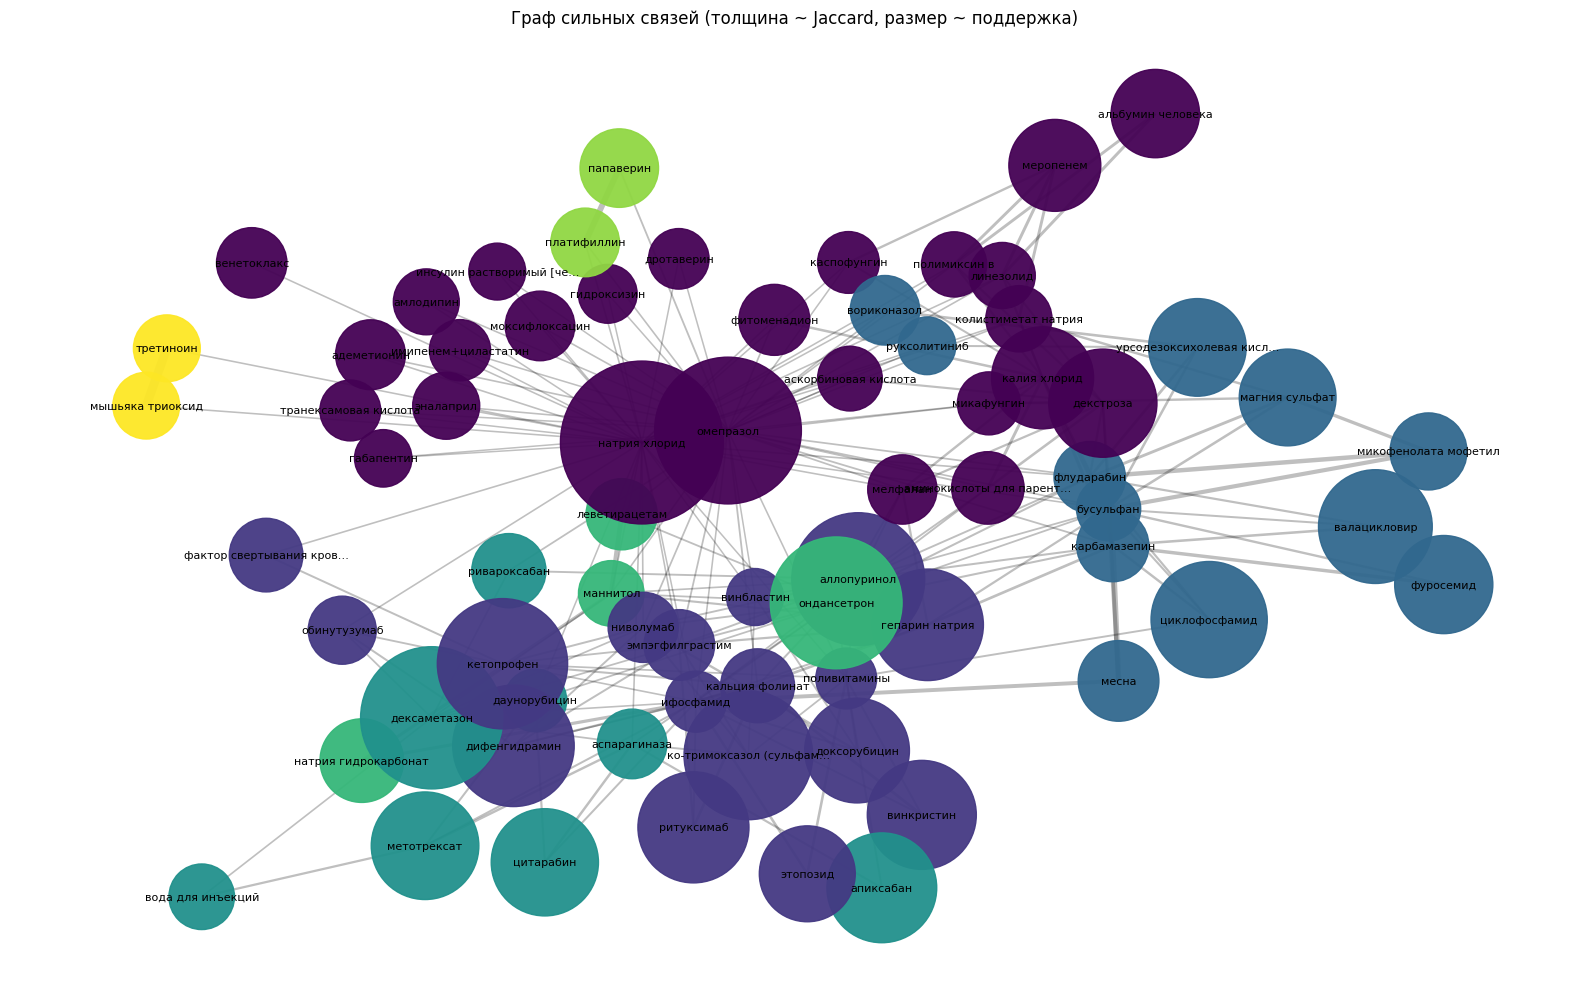

Nodes: 71 | Edges: 211 | min_support=20, min_jaccard=0.35, min_conf=0.65, min_degree=2, keep_top_by_support=120
Интерактивный граф сохранён в: mnn_network.html
Интерактивный граф сохранён в: mnn_network.html


In [54]:
# статичный, «читаемый» граф
plot_global_graph_filtered(
    pairs_df, mnn_cols, c_i,
    min_support=20,       # можно поднять/опустить
    min_jaccard=0.35,
    min_conf=0.65,
    min_degree=2,         # отсечь висячки
    keep_top_by_support=120,  # ограничить ядро по популярности
    label_width=24,
    figsize=(16,10)
)

# интерактивный HTML (советую для большого графа)
plot_interactive_pyvis(
    pairs_df, mnn_cols, c_i,
    html_path="mnn_network.html",
    min_support=20,
    min_jaccard=0.35,
    min_conf=0.65,
    keep_top_by_support=300
)

In [80]:
# ========= Импорты =========
import json, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# networkx — опционально (для статической картинки и кластеров)
try:
    import networkx as nx
    HAS_NX = True
except Exception:
    HAS_NX = False

# pyvis — опционально (для HTML-графа)
try:
    from pyvis.network import Network
    HAS_PYVIS = True
except Exception:
    HAS_PYVIS = False


# ========= Утилиты =========
def _shorten(s: str, width=28, placeholder="…"):
    s = str(s)
    return s if len(s) <= width else s[: max(0, width-1)] + placeholder

def _get_palette(n: int):
    """
    Универсальный способ получить палитру из n цветов:
    - пробуем современный matplotlib.colormaps
    - fallback: plt.get_cmap
    - fallback: ручной список
    Возвращаем список hex-цветов длины n.
    """
    def rgba_to_hex(rgba):
        r,g,b = [int(255*x) for x in rgba[:3]]
        return f"#{r:02x}{g:02x}{b:02x}"

    # 1) новый API (mpl>=3.6)
    try:
        from matplotlib import colormaps
        cmap = colormaps.get("tab20") if "tab20" in colormaps else colormaps.get("tab10")
        return [rgba_to_hex(cmap(i / max(1, n-1))) for i in range(n)]
    except Exception:
        pass

    # 2) старый API (mpl<=3.5)
    try:
        cmap = cmap = plt.get_cmap('tab20', max(1, len(comms)))
        return [rgba_to_hex(cmap(i / max(1, n-1))) for i in range(n)]
    except Exception:
        pass

    # 3) ручной набор (повторяем по кругу)
    base = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
        "#bcbd22", "#17becf"
    ]
    if n <= len(base):
        return base[:n]
    return [base[i % len(base)] for i in range(n)]


# ========= Статичный граф (matplotlib + networkx) =========
def plot_global_graph_filtered_pretty(
    pairs_df: pd.DataFrame,
    mnn_cols: list,
    c_i: np.ndarray,
    *,
    min_support=20,
    min_jaccard=0.35,
    min_conf=0.65,
    min_degree=2,
    keep_top_by_support=120,
    figsize=(16,10),
    title="Граф сильных связей МНН (толщина~Jaccard, размер~поддержка)"
):
    """
    pairs_df — таблица пар с колонками: A, B, support_AB, conf_B_given_A, conf_A_given_B, jaccard
    mnn_cols — список всех МНН (порядок как в корзинах)
    c_i — поддержка каждого МНН (counts по эпизодам), та же длина что mnn_cols
    """
    if not HAS_NX:
        print("networkx не установлен — статичный граф недоступен.")
        return

    # фильтр рёбер
    core = pairs_df.loc[
        (pairs_df["support_AB"] >= min_support) &
        (
            (pairs_df["jaccard"] >= min_jaccard) |
            (pairs_df["conf_B_given_A"] >= min_conf) |
            (pairs_df["conf_A_given_B"] >= min_conf)
        )
    ].copy()

    if core.empty:
        print("После фильтрации пар нет — граф пуст.")
        return

    # топ-узлы по поддержке
    support_ser = pd.Series(c_i, index=mnn_cols).sort_values(ascending=False)
    keep = set(support_ser.head(keep_top_by_support).index)

    # строим граф
    G = nx.Graph()
    for n in keep:
        G.add_node(n, support=int(support_ser[n]))
    for _, r in core.iterrows():
        a, b = r["A"], r["B"]
        if a in keep and b in keep:
            G.add_edge(a, b, jacc=float(r["jaccard"]), sup=int(r["support_AB"]))

    # чистим малую степень (визуально будет читабельнее)
    G.remove_nodes_from([n for n, d in G.degree() if d < min_degree])
    if G.number_of_nodes() == 0:
        print("Граф пуст после удаления узлов с малой степенью.")
        return

    # раскладка + размеры
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, seed=42, k=1 / math.sqrt(max(1, G.number_of_nodes())))
    node_sup = nx.get_node_attributes(G, "support")
    sup_max = max(1, max(node_sup.values()))
    node_sizes = [12 + 18*np.sqrt(node_sup[n] / sup_max) for n in G.nodes()]
    edge_w = [1.0 + 6.0*G.edges[e]["jacc"] for e in G.edges()]

    nx.draw_networkx_edges(G, pos, width=edge_w, edge_color="#9aa4b2", alpha=0.5)
    nx.draw_networkx_nodes(G, pos, node_size=[s*10 for s in node_sizes], node_color="#1f77b4", alpha=0.85)
    labels = {n: _shorten(n, 26) for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

    plt.title(f"{title}\nNodes: {G.number_of_nodes()} | Edges: {G.number_of_edges()} | "
              f"min_support={min_support}, min_jaccard={min_jaccard}, min_conf={min_conf}, min_degree={min_degree}",
              fontsize=11)
    plt.axis("off"); plt.tight_layout()
    plt.show()


# ========= Интерактивный граф (pyvis) =========
def plot_interactive_pyvis_pretty(
    pairs_df: pd.DataFrame,
    mnn_cols: list,
    c_i: np.ndarray,
    *,
    html_path="mnn_network.html",
    min_support=20,
    min_jaccard=0.35,
    min_conf=0.65,
    min_degree=2,
    keep_top_by_support=300,
    seed=42
):
    if not HAS_PYVIS:
        print("pyvis не установлен — интерактивный граф недоступен.")
        return

    # 1) фильтр рёбер
    core = pairs_df.loc[
        (pairs_df["support_AB"] >= min_support) &
        (
            (pairs_df["jaccard"] >= min_jaccard) |
            (pairs_df["conf_B_given_A"] >= min_conf) |
            (pairs_df["conf_A_given_B"] >= min_conf)
        )
    ].copy()

    if core.empty:
        print("После фильтрации пар нет — граф пуст.")
        return

    # 2) топ узлов по поддержке
    support_ser = pd.Series(c_i, index=mnn_cols).sort_values(ascending=False)
    keep = set(support_ser.head(keep_top_by_support).index)

    # 3) подграф
    if HAS_NX:
        G = nx.Graph()
        for n in keep:
            G.add_node(n, support=int(support_ser[n]))
        for _, r in core.iterrows():
            a, b = r["A"], r["B"]
            if a in keep and b in keep:
                G.add_edge(a, b, jacc=float(r["jaccard"]), sup=int(r["support_AB"]))
        G.remove_nodes_from([n for n, d in G.degree() if d < min_degree])
        if G.number_of_nodes() == 0:
            print("Граф пуст после удаления узлов с малой степенью.")
            return
    else:
        # без networkx — грубо через множества
        nodes = set()
        edges = []
        for _, r in core.iterrows():
            a, b = r["A"], r["B"]
            if a in keep and b in keep:
                edges.append((a, b, r["jaccard"], r["support_AB"]))
                nodes.add(a); nodes.add(b)
        # чистка малой степени вручную
        deg = {n: 0 for n in nodes}
        for a, b, _, _ in edges:
            deg[a] += 1; deg[b] += 1
        nodes = {n for n in nodes if deg[n] >= min_degree}
        edges = [(a,b,j,s) for (a,b,j,s) in edges if a in nodes and b in nodes]
        if not nodes:
            print("Граф пуст после удаления узлов с малой степенью.")
            return

    # 4) кластеры (Louvain → всё в один)
    if HAS_NX:
        try:
            import community as community_louvain
            part = community_louvain.best_partition(G, weight="jacc", random_state=seed)
            cluster_of = pd.Series(part)
        except Exception:
            cluster_of = pd.Series({n: 0 for n in G.nodes()})
        node_support = pd.Series(nx.get_node_attributes(G, "support"))
    else:
        # все в кластер 0
        cluster_of = pd.Series({n: 0 for n in nodes})
        node_support = pd.Series({n: int(support_ser.get(n, 1)) for n in nodes})

    # 5) pyvis
    net = Network(height="820px", width="100%", notebook=False, directed=False, bgcolor="#ffffff")

    # валидный JSON-объект с опциями
    options = {
        "nodes": {"shape": "dot", "borderWidth": 1},
        "edges": {
            "smooth": {"type": "dynamic"},
            "selectionWidth": 2,
            "color": {"opacity": 0.6}
        },
        "interaction": {
            "hover": True,
            "zoomView": True,
            "navigationButtons": True,
            "multiselect": True
        },
        "physics": {
            "barnesHut": {
                "gravitationalConstant": -22000,
                "centralGravity": 0.25,
                "springLength": 135,
                "springConstant": 0.06,
                "damping": 0.8
            },
            "stabilization": {"iterations": 150}
        }
    }
    net.set_options(json.dumps(options))

    # палитра
    uniq = sorted(pd.Series(cluster_of).unique())
    colors = _get_palette(len(uniq))
    color_map = {c: colors[i] for i, c in enumerate(uniq)}

    # добавляем узлы
    sup_max = max(1, int(node_support.max()))
    for n, sup in node_support.items():
        size = 12 + 18*np.sqrt(sup / sup_max)
        label = _shorten(n, 28)
        cid = int(cluster_of[n])
        net.add_node(
            n, label=label, title=f"<b>{n}</b><br>support={sup}",
            value=float(sup), size=float(size), color=color_map.get(cid, "#1f77b4")
        )

    # добавляем рёбра
    if HAS_NX:
        for u, v, e in G.edges(data=True):
            j = float(e.get("jacc", 0.0))
            sup = int(e.get("sup", 0))
            net.add_edge(u, v, value=float(1 + 6*j),
                         title=f"support_AB={sup}<br>Jaccard={j:.3f}")
    else:
        for a, b, j, sup in edges:
            net.add_edge(a, b, value=float(1 + 6*float(j)),
                         title=f"support_AB={int(sup)}<br>Jaccard={float(j):.3f}")

    # сохранение HTML с учётом разных версий pyvis
    try:
        net.write_html(html_path, open_browser=False)
    except Exception:
        net.save_graph(html_path)
    print(f"Готово. Интерактивный граф сохранён в: {html_path}")

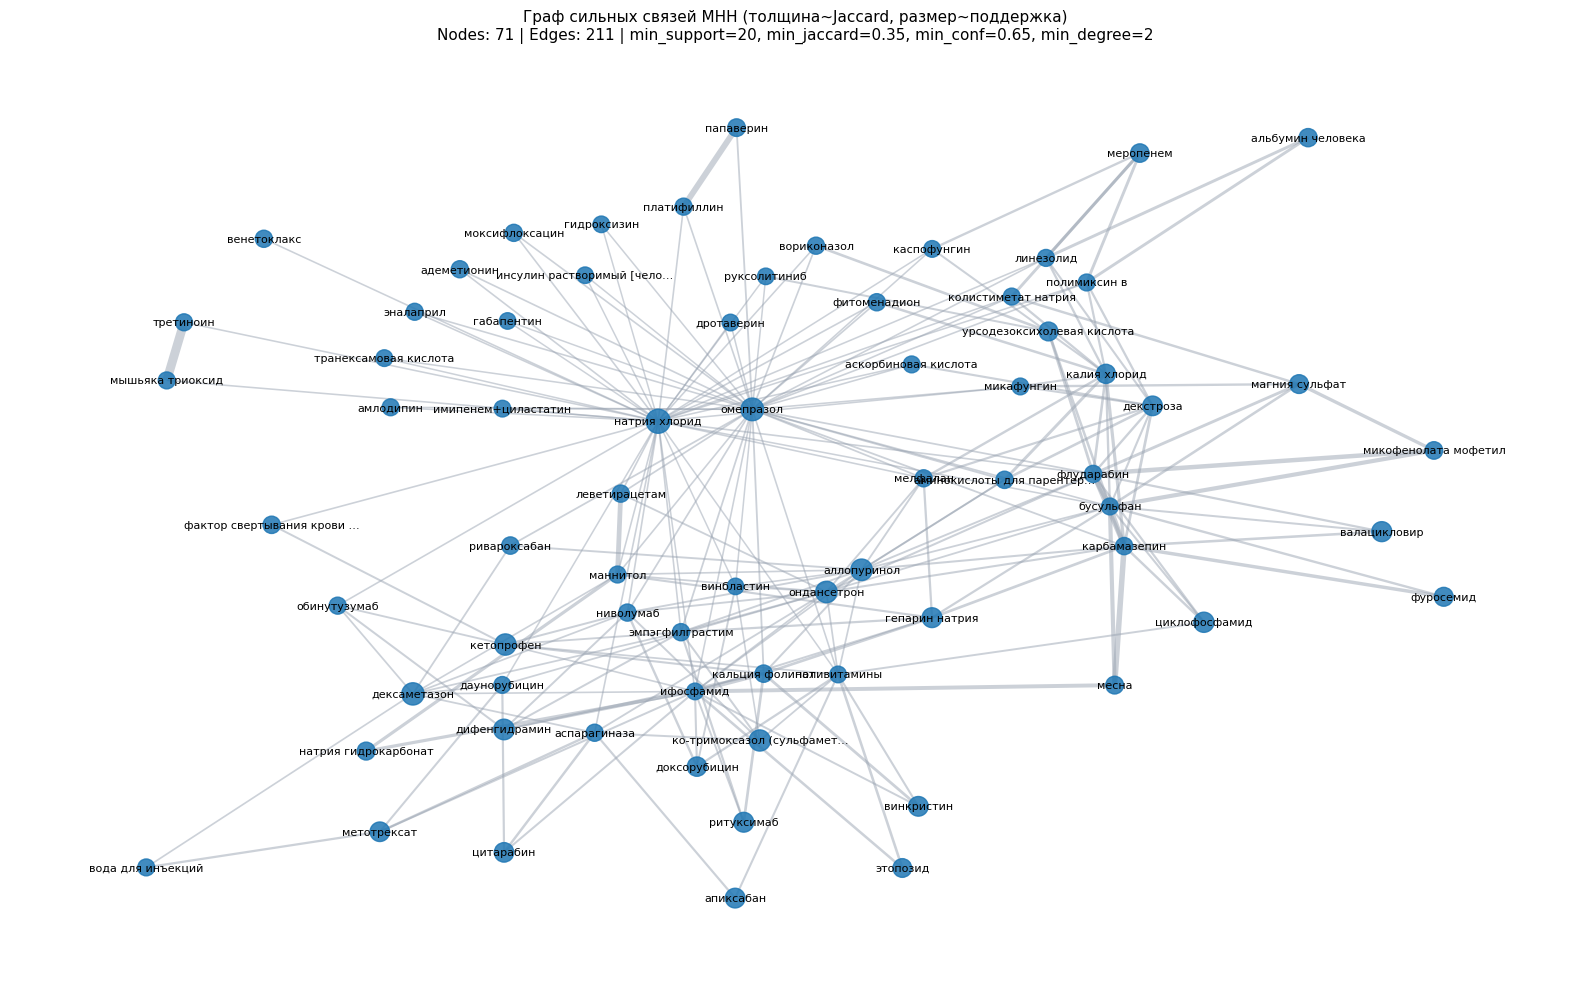

Готово. Интерактивный граф сохранён в: mnn_network.html


In [63]:
# статичный, «красивый»
plot_global_graph_filtered_pretty(
    pairs_df, mnn_cols, c_i,
    min_support=20, min_jaccard=0.35, min_conf=0.65,
    min_degree=2, keep_top_by_support=120,
    figsize=(16,10)
)

# интерактивный HTML
plot_interactive_pyvis_pretty(
    pairs_df, mnn_cols, c_i,
    html_path="mnn_network.html",
    min_support=20, min_jaccard=0.35, min_conf=0.65,
    min_degree=2, keep_top_by_support=300
)

In [83]:
# ===== Кластеры на том же графе из pairs_df =====
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ---- ПАРАМЕТРЫ ФИЛЬТРА ----
MIN_SUPPORT = 1        # как на большом графе
MIN_JACCARD = 0.35
MIN_CONF    = 0.65      # применяется к max(conf_A|B, conf_B|A)
MIN_DEGREE  = 2
SAVE        = False     # True — сохранить CSV

assert 'pairs_df' in globals(), "Нужен pairs_df с колонками A,B,support_AB,jaccard,conf_A_given_B,conf_B_given_A"

# 1) Фильтруем рёбра как раньше
pdf = pairs_df.copy()
need_cols = {"A","B","support_AB","jaccard","conf_A_given_B","conf_B_given_A"}
missing = need_cols - set(pdf.columns)
if missing:
    raise ValueError(f"В pairs_df нет колонок: {missing}")

pdf["conf_max"] = pdf[["conf_A_given_B","conf_B_given_A"]].max(axis=1)

edges_filtered = pdf[
    (pdf["support_AB"] >= MIN_SUPPORT) &
    (pdf["jaccard"]    >= MIN_JACCARD) &
    (pdf["conf_max"]   >= MIN_CONF)
].copy()

# 2) Строим граф
G = nx.Graph()
for _, r in edges_filtered.iterrows():
    a, b = r["A"], r["B"]
    G.add_edge(
        a, b,
        weight=float(r["jaccard"]),   # для раскладки/кластеризации
        support=int(r["support_AB"]),
        jaccard=float(r["jaccard"]),
        conf_A_given_B=float(r["conf_A_given_B"]),
        conf_B_given_A=float(r["conf_B_given_A"])
    )

# удалим низкостепенные, если надо
if MIN_DEGREE > 0 and G.number_of_nodes() > 0:
    low = [n for n, d in dict(G.degree()).items() if d < MIN_DEGREE]
    G.remove_nodes_from(low)

print(f"graph: nodes={G.number_of_nodes()} edges={G.number_of_edges()}")
if G.number_of_edges() == 0:
    print("После фильтрации граф пуст. Снизь MIN_SUPPORT / MIN_JACCARD / MIN_CONF или MIN_DEGREE.")
    # можно остановиться тут
else:
    # 3) Кластеризация: Louvain -> fallback на greedy_modularity
    try:
        import community as community_louvain  # пакет python-louvain
        part = community_louvain.best_partition(G, weight="weight", random_state=42)
        algo = "louvain"
    except Exception:
        from networkx.algorithms.community import greedy_modularity_communities
        comms = list(greedy_modularity_communities(G, weight="weight"))
        part = {n: i for i, comm in enumerate(comms) for n in comm}
        algo = "greedy_modularity"

    # 4) Таблица MNN -> cluster
    cluster_members = (
        pd.Series(part, name="cluster")
          .reset_index()
          .rename(columns={"index":"mnn"})
          .sort_values(["cluster","mnn"])
          .reset_index(drop=True)
    )
    print(f"clusters: {cluster_members['cluster'].nunique()}")

    # 5) Визуализация
    pos = nx.spring_layout(G, seed=42, k=0.6/np.sqrt(max(1, G.number_of_nodes())))
    cmap = plt.get_cmap("tab20")  # совместимо со всеми версиями mpl

    # цвета по кластерам
    uniq = sorted(cluster_members["cluster"].unique())
    color_map = {c: cmap(i % cmap.N) for i, c in enumerate(uniq)}
    node_colors = [color_map[part[n]] for n in G.nodes()]

    plt.figure(figsize=(16, 10))
    # толщину рёбер — по jaccard
    ej = np.array([G.edges[e]["jaccard"] for e in G.edges()])
    if len(ej):
        ew = 1.0 + 6.0 * (ej - ej.min()) / (ej.max() - ej.min() + 1e-9)
    else:
        ew = 1.0

    nx.draw_networkx_edges(G, pos, width=ew, alpha=0.25)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=220, linewidths=0.8, edgecolors="#333333")
    nx.draw_networkx_labels(G, pos, font_size=8)

    title = (f"MNN graph | nodes={G.number_of_nodes()} edges={G.number_of_edges()} | "
             f"support≥{MIN_SUPPORT}, jaccard≥{MIN_JACCARD:.2f}, conf≥{MIN_CONF:.2f}, "
             f"min_degree≥{MIN_DEGREE} | clusters={len(uniq)} ({algo})")
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    # 6) (опционально) сохранить CSV
    if SAVE:
        cluster_members.to_csv("cluster_members.csv", index=False)
        edges_filtered.to_csv("edges_filtered.csv", index=False)
        print("saved: cluster_members.csv, edges_filtered.csv")

graph: nodes=0 edges=0
После фильтрации граф пуст. Снизь MIN_SUPPORT / MIN_JACCARD / MIN_CONF или MIN_DEGREE.


In [89]:
# ==== Кластеры по текущему графу сильных связей (робастная версия с диагностикой) ====
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def _short(s, n=22):
    s = str(s)
    return s if len(s) <= n else s[:n-1] + "…"

def _safe_support_lookup(m, mnn_cols, c_i, core):
    """Пытаемся взять поддержку узла из c_i, иначе – из core."""
    try:
        # c_i может быть np.ndarray, list или Series с индексом по MNN
        if isinstance(c_i, (np.ndarray, list, tuple)):
            if m in mnn_cols:
                return int(c_i[mnn_cols.index(m)])
        elif isinstance(c_i, pd.Series):
            if m in c_i.index:
                return int(c_i.loc[m])
            # иногда Series без имён — пробуем по позиции
            if m in mnn_cols:
                return int(c_i.iloc[mnn_cols.index(m)])
    except Exception:
        pass
    # fallback: суммарная поддержка по рёбрам, где участвует m
    s = core.loc[(core["A"] == m) | (core["B"] == m), "support_AB"].sum()
    return int(s)

def _colors_for_k(k):
    base = plt.rcParams['axes.prop_cycle'].by_key().get('color', [
        '#1f77b4','#ff7f0e','#2ca02c','#d62728',
        '#9467bd','#8c564b','#e377c2','#7f7f7f',
        '#bcbd22','#17becf'
    ])
    if k <= len(base):
        return base[:k]
    import colorsys
    return [colorsys.hsv_to_rgb(i/k, 0.55, 0.9) for i in range(k)]

def clusterize_and_plot(
    pairs_df, mnn_cols, c_i,
    min_support=20, min_jaccard=0.35, min_conf=0.65,
    min_degree=2, keep_top_by_support=120,   # поставь None чтобы отключить ограничение
    label_width=24, figsize=(16,10),
    title="Граф сильных связей (толщина ~ Jaccard, размер ~ поддержка, цвет ~ кластер)"
):
    # 1) фильтруем рёбра — РОВНО как в твоём графике
    core = pairs_df.loc[
        (pairs_df["support_AB"] >= min_support) &
        (
            (pairs_df["jaccard"] >= min_jaccard) |
            (pairs_df["conf_B_given_A"] >= min_conf) |
            (pairs_df["conf_A_given_B"] >= min_conf)
        )
    ].copy()

    if core.empty:
        print("После фильтров по рёбрам core пуст. Ослабь min_support/min_jaccard/min_conf.")
        return pd.DataFrame(), pd.DataFrame(), nx.Graph()

    nodes_core = sorted(set(core["A"]).union(set(core["B"])))
    print(f"[diag] edges after filters: {len(core):,} | nodes in core: {len(nodes_core):,}")

    # 2) считаем поддержку узлов безопасно
    sup = {m: _safe_support_lookup(m, mnn_cols, c_i, core) for m in nodes_core}

    # 3) ограничиваем ядро по поддержке ТОЛЬКО среди узлов core
    if keep_top_by_support is None:
        keep = set(nodes_core)
    else:
        keep = set([m for m, _ in sorted(sup.items(), key=lambda x: x[1], reverse=True)[:keep_top_by_support]])
    print(f"[diag] kept nodes by support: {len(keep)} (limit={keep_top_by_support})")

    # 4) строим граф только на kept
    G = nx.Graph()
    for n in keep:
        G.add_node(n, weight=sup[n])

    kept_edges = 0
    for _, r in core.iterrows():
        a, b = r["A"], r["B"]
        if a in keep and b in keep:
            G.add_edge(a, b, w=float(r["jaccard"]), support=int(r["support_AB"]))
            kept_edges += 1
    print(f"[diag] edges among kept nodes: {kept_edges}")

    # 5) удаляем узлы малой степени
    if min_degree is not None and min_degree > 0:
        drop = [n for n in list(G.nodes()) if G.degree(n) < min_degree]
        G.remove_nodes_from(drop)
        print(f"[diag] removed by min_degree<{min_degree}: {len(drop)}; left nodes={G.number_of_nodes()}, edges={G.number_of_edges()}")

    if G.number_of_nodes() == 0:
        print("После degree-отсечения граф пуст. Снизь min_degree или отключи ограничение по поддержке.")
        return pd.DataFrame(), pd.DataFrame(), G

    # 6) сообщества
    try:
        import community as community_louvain  # python-louvain
        part = community_louvain.best_partition(G, weight="w", random_state=42)
    except Exception:
        from networkx.algorithms.community import greedy_modularity_communities
        comms = list(greedy_modularity_communities(G, weight="w"))
        part = {}
        for cid, comm in enumerate(comms):
            for n in comm:
                part[n] = cid

    nx.set_node_attributes(G, part, "cluster")

    # 7) таблицы
    deg = dict(G.degree())
    cluster_members = (pd.DataFrame({
        "mnn": list(G.nodes()),
        "cluster": [G.nodes[n]["cluster"] for n in G.nodes()],
        "support": [G.nodes[n]["weight"] for n in G.nodes()],
        "degree": [deg[n] for n in G.nodes()]
    })
    .assign(cluster_size=lambda d: d.groupby("cluster")["mnn"].transform("count"))
    .sort_values(["cluster","mnn"])
    .reset_index(drop=True))

    cluster_summary = (cluster_members
        .groupby("cluster", as_index=False)
        .agg(n_mnns=("mnn","count"),
             sum_support=("support","sum"),
             avg_degree=("degree","mean"))
        .sort_values(["n_mnns","sum_support"], ascending=False))

    # 8) рисуем
    k = 1/np.sqrt(max(1, G.number_of_nodes()))
    pos = nx.spring_layout(G, k=k*1.5, iterations=400, seed=42)

    clusters = sorted(cluster_members["cluster"].unique())
    palette = _colors_for_k(len(clusters))
    cmap = {c: palette[i % len(palette)] for i, c in enumerate(clusters)}
    node_colors = [cmap[G.nodes[n]["cluster"]] for n in G.nodes()]
    node_sizes  = [120 + 160*np.sqrt(G.nodes[n]["weight"]) for n in G.nodes()]
    edge_w      = [1.0 + 6.0*G.edges[e]["w"] for e in G.edges()]

    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(G, pos, width=edge_w, alpha=0.25)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.95)
    nx.draw_networkx_labels(G, pos,
                            labels={n: _short(n, label_width) for n in G.nodes()},
                            font_size=8)
    plt.title(title)
    plt.axis("off"); plt.tight_layout(); plt.show()

    print(f"graph: nodes={G.number_of_nodes()} edges={G.number_of_edges()} | clusters={len(clusters)}")
    return cluster_members, cluster_summary, G

In [91]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ---------- 0) Диагностика распределений ----------
def diag_pairs(pairs_df):
    cols = ["support_AB","jaccard","conf_A_given_B","conf_B_given_A"]
    print(pairs_df[cols].describe(percentiles=[.5,.8,.9,.95,.99]).round(3))
    # Покажем несколько сильнейших рёбер по каждой метрике
    print("\nTop by support_AB")
    display(pairs_df.sort_values("support_AB", ascending=False).head(10))
    print("\nTop by jaccard")
    display(pairs_df.sort_values("jaccard", ascending=False).head(10))
    print("\nTop by conf_A_given_B")
    display(pairs_df.sort_values("conf_A_given_B", ascending=False).head(10))
    print("\nTop by conf_B_given_A")
    display(pairs_df.sort_values("conf_B_given_A", ascending=False).head(10))

diag_pairs(pairs_df)

       support_AB  jaccard  conf_A_given_B  conf_B_given_A
count         2.0    2.000           2.000             2.0
mean          1.0    0.417           0.750             0.5
std           0.0    0.118           0.354             0.0
min           1.0    0.333           0.500             0.5
50%           1.0    0.417           0.750             0.5
80%           1.0    0.467           0.900             0.5
90%           1.0    0.483           0.950             0.5
95%           1.0    0.492           0.975             0.5
99%           1.0    0.498           0.995             0.5
max           1.0    0.500           1.000             0.5

Top by support_AB


A      B  support_AB  support_A  support_B   jaccard  conf_A_given_B  \
0  DrugA  DrugB           1          2          2  0.333333             0.5   
1  DrugB  DrugC           1          2          1  0.500000             1.0   

   conf_B_given_A  
0             0.5  
1             0.5


Top by jaccard


A      B  support_AB  support_A  support_B   jaccard  conf_A_given_B  \
1  DrugB  DrugC           1          2          1  0.500000             1.0   
0  DrugA  DrugB           1          2          2  0.333333             0.5   

   conf_B_given_A  
1             0.5  
0             0.5


Top by conf_A_given_B


A      B  support_AB  support_A  support_B   jaccard  conf_A_given_B  \
1  DrugB  DrugC           1          2          1  0.500000             1.0   
0  DrugA  DrugB           1          2          2  0.333333             0.5   

   conf_B_given_A  
1             0.5  
0             0.5


Top by conf_B_given_A


A      B  support_AB  support_A  support_B   jaccard  conf_A_given_B  \
0  DrugA  DrugB           1          2          2  0.333333             0.5   
1  DrugB  DrugC           1          2          1  0.500000             1.0   

   conf_B_given_A  
0             0.5  
1             0.5

In [93]:
def assert_not_toy(df, col="mnn_norm"):
    toy = {"druga","drugb","drugc"}
    vals = pd.Series(pd.unique(df[col].astype(str).str.lower()))
    if vals.isin(list(toy)).any():
        raise RuntimeError("В данных замечены игрушечные имена DrugA/B/C. Перезапусти kernel и не запускай demo-ячейки.")

In [94]:
# Требуются реальные df_drug (и не обязательно df_ev)
assert 'df_drug' in globals(), "Нет df_drug (реальная выгрузка назначений)."

# нормализация (минимально необходимая)
UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
UNIT_UNITS = {"ед","ед.","iu","ме"}
VOL_UNITS = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}

def normalize_mnn(x):
    if pd.isna(x): return x
    s = str(x).strip().lower()
    return " ".join(s.split())

def qty_mg(row):
    dose, measure, conc = row.get("dose"), row.get("measure"), row.get("concentration")
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    if m in UNIT_TO_MG: return float(dose)*UNIT_TO_MG[m]
    if m in VOL_UNITS and pd.notna(conc): return float(dose)*VOL_UNITS[m]*float(conc)
    return np.nan

def qty_units(row):
    dose, measure = row.get("dose"), row.get("measure")
    if pd.isna(dose) or pd.isna(measure): return np.nan
    return float(dose) if str(measure).strip().lower() in UNIT_UNITS else np.nan

d = df_drug.copy()
d["execution_date"] = pd.to_datetime(d["execution_date"], errors="coerce", dayfirst=True)
d["mnn_norm"] = d["mnn"].apply(normalize_mnn)
d["qty_mg"] = d.apply(qty_mg, axis=1)
d["qty_units"] = d.apply(qty_units, axis=1)

# фильтр «удаление нулевых дозировок»
d = d[(d["qty_mg"] > 0) | (d["qty_units"] > 0)]
d = d.dropna(subset=["event_id","mnn_norm"])
d["week"] = d["execution_date"].dt.to_period("W").dt.start_time

assert_not_toy(d, "mnn_norm")
d_sel = d  # ← рабочий датасет
print("d_sel:", d_sel.shape, "uniq MNN:", d_sel["mnn_norm"].nunique())

d_sel: (1184650, 15) uniq MNN: 392


In [96]:
from itertools import combinations

pairs = []
for ev, g in d_sel.groupby("event_id"):
    mnns = sorted(g["mnn_norm"].unique().tolist())
    if len(mnns) >= 2:
        pairs.extend(combinations(mnns, 2))

pairs_df = (pd.DataFrame(pairs, columns=["A","B"])
            .value_counts(["A","B"]).reset_index(name="support_AB"))

# Jaccard/Confidence
sup_A = pairs_df.groupby("A")["support_AB"].sum()
sup_B = pairs_df.groupby("B")["support_AB"].sum()
pairs_df["jaccard"] = pairs_df.apply(
    lambda r: r["support_AB"] / (sup_A.get(r["A"],0)+sup_B.get(r["B"],0)-r["support_AB"]), axis=1)
pairs_df["conf_A_given_B"] = pairs_df["support_AB"] / pairs_df["B"].map(sup_B).replace(0,np.nan)
pairs_df["conf_B_given_A"] = pairs_df["support_AB"] / pairs_df["A"].map(sup_A).replace(0,np.nan)
pairs_df = pairs_df.fillna(0.0)

assert_not_toy(pairs_df.rename(columns={"A":"mnn_norm"}), "mnn_norm")
print("pairs_df:", pairs_df.shape)
print(pairs_df.head(20))

pairs_df: (19163, 6)
                                                A  \
0                                     аллопуринол   
1                                       омепразол   
2                                    дексаметазон   
3                                     аллопуринол   
4   ко-тримоксазол (сульфаметоксазол+триметоприм)   
5                                     аллопуринол   
6                                    дексаметазон   
7                                      кетопрофен   
8                                    дексаметазон   
9                                    дексаметазон   
10                                    аллопуринол   
11  ко-тримоксазол (сульфаметоксазол+триметоприм)   
12                                   дексаметазон   
13                                      омепразол   
14                                   дексаметазон   
15                                    аллопуринол   
16                                    ондансетрон   
17                       

In [104]:
# === ЧИТАЕМАЯ ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ ===
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def _short(s, n=22):
    s = str(s);  return s if len(s) <= n else s[:n-1] + "…"

def _colors_for_k(k):
    base = plt.rcParams['axes.prop_cycle'].by_key().get(
        'color',
        ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
         '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
    )
    if k <= len(base): return base[:k]
    import colorsys
    return [colorsys.hsv_to_rgb(i/k, 0.55, 0.9) for i in range(k)]

def _layout_by_cluster(G, part, repel=1.6, radius=8.0):
    """Сначала раскладываем каждый кластер отдельно, потом разносим центры по окружности."""
    clusters = sorted(set(part.values()))
    K = max(1, len(clusters))
    centers = {c: np.array([radius*np.cos(2*np.pi*i/K),
                             radius*np.sin(2*np.pi*i/K)]) for i,c in enumerate(clusters)}
    pos = {}
    rng = np.random.default_rng(42)
    for c in clusters:
        nodes = [n for n in G if part[n] == c]
        SG = G.subgraph(nodes)
        k = repel/np.sqrt(max(1, SG.number_of_nodes()))
        sub = nx.spring_layout(SG, k=k, iterations=400, seed=42)
        # нормируем "кластер" к компактному облаку и слегка увеличиваем
        P = np.array(list(sub.values()))
        if len(P) == 0:
            continue
        P -= P.mean(0)
        scale = 2.5 / (np.max(np.linalg.norm(P, axis=1)) + 1e-6)
        for n, p in sub.items():
            jitter = rng.normal(0, 0.02, size=2)  # маленький шум против наложения
            pos[n] = centers[c] + (p - P.mean(0))*scale + jitter
    return pos

def clusterize_and_plot_readable(
    pairs_df,
    mnn_support,               # Series: mnn -> support (или dict)
    min_support=10,
    min_jaccard=0.15,
    min_conf=0.55,
    min_degree=1,
    keep_top_by_support=300,
    label_top_per_cluster=20,  # максимум подписей на кластер
    min_degree_for_label=2,    # и/или порог по степени
    label_width=22,
    figsize=(18,11),
    title="Граф сильных связей (толщина ~ Jaccard, размер ~ поддержка, цвет ~ кластер)"
):
    # 1) ядро рёбер
    core = pairs_df.loc[
        (pairs_df["support_AB"] >= min_support) &
        ( (pairs_df["jaccard"] >= min_jaccard) |
          (pairs_df["conf_B_given_A"] >= min_conf) |
          (pairs_df["conf_A_given_B"] >= min_conf) )
    ].copy()
    if core.empty:
        print("После фильтров по рёбрам core пуст. Ослабь min_support/min_jaccard/min_conf.")
        return None, None, nx.Graph()

    # 2) граф: узлы — топ по поддержке
    if hasattr(mnn_support, "to_dict"):
        sup = mnn_support.to_dict()
    else:
        sup = dict(mnn_support)
    keep = set([m for m,_ in sorted(sup.items(), key=lambda x: x[1], reverse=True)[:keep_top_by_support]])

    G = nx.Graph()
    for n in keep:
        G.add_node(n, weight=int(sup.get(n, 0)))
    for _, r in core.iterrows():
        a, b = r["A"], r["B"]
        if a in keep and b in keep:
            G.add_edge(a, b, w=float(r["jaccard"]), support=int(r["support_AB"]))

    # чистим "висячки"
    drop = [n for n in list(G.nodes()) if G.degree(n) < min_degree]
    G.remove_nodes_from(drop)
    if G.number_of_nodes() == 0:
        print("После удаления малой степени граф пуст. Понизь min_degree или увеличь keep_top_by_support.")
        return None, None, G

    # 3) сообщества
    try:
        import community as community_louvain
        part = community_louvain.best_partition(G, weight="w", random_state=42)
    except Exception:
        comms = list(nx.algorithms.community.greedy_modularity_communities(G, weight="w"))
        part = {}
        for cid, comm in enumerate(comms):
            for n in comm: part[n] = cid
    nx.set_node_attributes(G, part, "cluster")

    # 4) читаемая раскладка по кластерам
    pos = _layout_by_cluster(G, part, repel=1.8, radius=9.0)

    # 5) таблицы
    deg = dict(G.degree())
    cluster_members = (pd.DataFrame({
        "mnn": list(G.nodes()),
        "cluster": [part[n] for n in G.nodes()],
        "support": [G.nodes[n]["weight"] for n in G.nodes()],
        "degree": [deg[n] for n in G.nodes()]
    })
        .assign(cluster_size=lambda d: d.groupby("cluster")["mnn"].transform("count"))
        .sort_values(["cluster","support","degree"], ascending=[True, False, False])
        .reset_index(drop=True)
    )
    cluster_summary = (cluster_members.groupby("cluster")
                       .agg(n_mnns=("mnn","count"),
                            sum_support=("support","sum"),
                            avg_degree=("degree","mean"))
                       .reset_index()
                       .sort_values(["n_mnns","sum_support"], ascending=False))

    # 6) рисуем
    colors = _colors_for_k(cluster_members["cluster"].nunique())
    cmap = {c: colors[i % len(colors)] for i, c in enumerate(sorted(cluster_members["cluster"].unique()))}
    node_colors = [cmap[part[n]] for n in G.nodes()]
    node_sizes  = [140 + 180*np.sqrt(max(0, G.nodes[n]["weight"])) for n in G.nodes()]
    edge_w      = [1.0 + 6.0*G.edges[e]["w"] for e in G.edges()]

    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(G, pos, width=edge_w, alpha=0.25)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

    # подписи: только важные (топ по поддержке/степени внутри кластера)
    labels = {}
    for cid, grp in (cluster_members
                     .query("degree >= @min_degree_for_label")
                     .groupby("cluster", sort=False)):
        top = (grp.assign(score=grp["support"]*0.7 + grp["degree"]*0.3)
                    .nlargest(label_top_per_cluster, "score"))
        for m in top["mnn"]:
            labels[m] = _short(m, label_width)

    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
    plt.title(title)
    plt.axis("off"); plt.tight_layout(); plt.show()

    print(f"Граф: nodes={G.number_of_nodes()} | edges={G.number_of_edges()} | clusters={cluster_members['cluster'].nunique()}")
    return cluster_members, cluster_summary, G
  


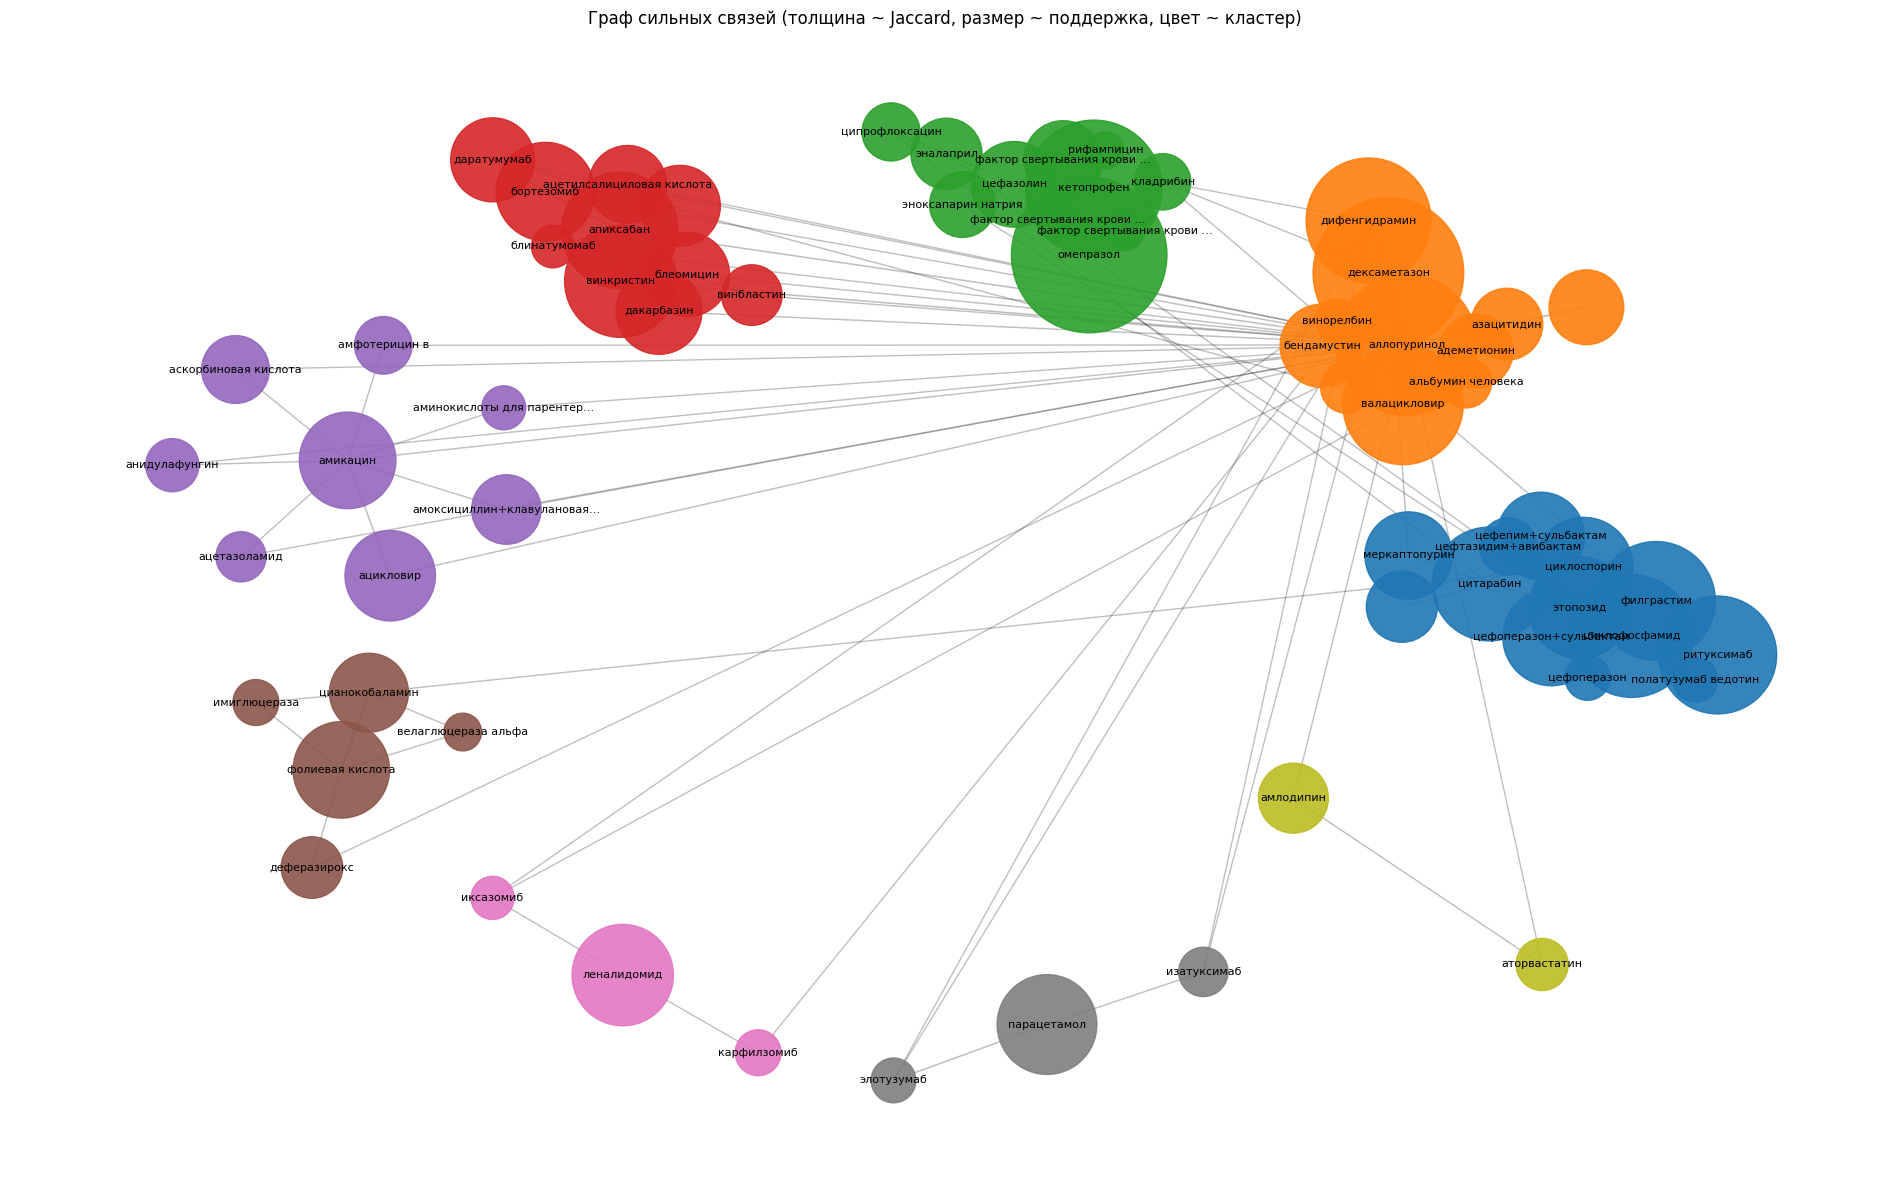

Граф: nodes=66 | edges=110 | clusters=9


In [113]:
cluster_members, cluster_summary, G = clusterize_and_plot_readable(
    pairs_df,
    mnn_support,                 # Series mnn->поддержка (как у тебя c_i / counts)
    min_support=5,
    min_jaccard=0.15,
    min_conf=0.2,
    min_degree=2,
    keep_top_by_support=400,
    label_top_per_cluster=25,
    min_degree_for_label=2,
    label_width=26,
    figsize=(19,12)
)

In [101]:
print(cluster_summary.sort_values(['n_mnns','sum_support'], ascending=False).head(10))
# список МНН по кластеру k
k = cluster_summary.sort_values('n_mnns', ascending=False).iloc[0]['cluster']
sorted(cluster_members.loc[cluster_members.cluster==k, 'mnn'].tolist())[:30]

    cluster  n_mnns  sum_support  avg_degree
0         0      15         7068    2.000000
1         1       8        12214    1.750000
2         2       7         1239    2.142857
3         3       5         4338    1.800000
4         4       3         2063    1.666667
8         8       3         1718    1.333333
5         5       3         1199    1.333333
7         7       3          984    1.333333
6         6       3          135    1.333333
12       12       2         7832    1.000000


['адеметионин',
 'аллопуринол',
 'альбумин человека',
 'амикацин',
 'аминокислоты для парентерального питания',
 'аминокислоты для парентерального питания+прочие препараты [жировые эмульсии для парентерального питания+декстроза+минералы]',
 'аминофиллин',
 'амоксициллин+клавулановая кислота',
 'апиксабан',
 'аспарагиназа',
 'бендамустин',
 'брентуксимаба ведотин',
 'винбластин',
 'глофитамаб',
 'меркаптопурин']

In [102]:
for cid, grp in cluster_members.groupby('cluster'):
    fname = f'cluster_{cid:02d}_mnns.txt'
    with open(fname, 'w', encoding='utf-8') as f:
        for m in sorted(grp['mnn']):
            f.write(m + '\n')
    print('saved:', fname, '| n=', len(grp))

saved: cluster_00_mnns.txt | n= 15
saved: cluster_01_mnns.txt | n= 8
saved: cluster_02_mnns.txt | n= 7
saved: cluster_03_mnns.txt | n= 5
saved: cluster_04_mnns.txt | n= 3
saved: cluster_05_mnns.txt | n= 3
saved: cluster_06_mnns.txt | n= 3
saved: cluster_07_mnns.txt | n= 3
saved: cluster_08_mnns.txt | n= 3
saved: cluster_09_mnns.txt | n= 2
saved: cluster_10_mnns.txt | n= 2
saved: cluster_11_mnns.txt | n= 2
saved: cluster_12_mnns.txt | n= 2
saved: cluster_13_mnns.txt | n= 2
saved: cluster_14_mnns.txt | n= 2


In [103]:
import networkx as nx
# центральные узлы по степени и посредничеству
deg = nx.degree_centrality(G); btw = nx.betweenness_centrality(G, weight='w', normalized=True)
centers = (pd.DataFrame({'mnn': list(deg.keys()), 'deg': list(deg.values()), 'btw': list(btw.values())})
           .merge(cluster_members[['mnn','cluster']], on='mnn'))
print(centers.sort_values(['cluster','deg','btw'], ascending=[True, False, False]).groupby('cluster').head(5))

                                                  mnn       deg       btw  \
2                                         аллопуринол  0.213115  0.088525   
0                                         адеметионин  0.032787  0.018579   
9                                           апиксабан  0.032787  0.018579   
10                                       аспарагиназа  0.032787  0.009836   
3                                   альбумин человека  0.016393  0.000000   
25                                       дексаметазон  0.049180  0.008743   
13                                         бортезомиб  0.032787  0.005464   
16                                       валацикловир  0.032787  0.003279   
27                                      дифенгидрамин  0.032787  0.003279   
31                                        карфилзомиб  0.032787  0.003279   
50                                          цефазолин  0.065574  0.018579   
15  бромдигидрохлорфенилбензодиазепин bromdihydroc...  0.049180  0.005464   

In [132]:
# ====================== MNN graph: auto-clusters + plots + HTML ======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# ---------------- utils ----------------
def _short(s, n=24):
    s = str(s)
    return s if len(s) <= n else s[:n-1] + "…"

def _palette(k:int):
    base = plt.rcParams['axes.prop_cycle'].by_key().get(
        'color',
        ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
         '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
    )
    if k <= len(base):
        return base[:k]
    # дополняем по кругу HSV
    import colorsys
    cols = base[:]
    for i in range(k - len(base)):
        h = (i / (k - len(base) + 1)) % 1.0
        r,g,b = colorsys.hsv_to_rgb(h, 0.55, 0.9)
        cols.append((r,g,b))
    return cols

def _ensure_support(pairs_df: pd.DataFrame, mnn_support=None) -> pd.Series:
    """
    Если mnn_support не передан, оценим его из pairs_df:
    по узлу берём max(Σ support_AB как A, Σ support_AB как B).
    """
    if mnn_support is not None:
        s = pd.Series(mnn_support)
        s.index = s.index.astype(str)
        return s
    sa = pairs_df.groupby("A")["support_AB"].sum()
    sb = pairs_df.groupby("B")["support_AB"].sum()
    supp = pd.concat([sa.rename("sup"), sb.rename("sup")], axis=0)
    supp = supp.groupby(level=0).max().sort_values(ascending=False)
    supp.index = supp.index.astype(str)
    return supp

def _graph_density(G):
    n = G.number_of_nodes(); m = G.number_of_edges()
    return 0.0 if n < 2 else 2.0*m/(n*(n-1))

def _avg_clustering(G):
    try:
        return nx.average_clustering(G, weight="w")
    except Exception:
        return 0.0

def _balance_index(sizes):
    """1.0 = кластеры ровные, 0.0 = один огромный и хвост."""
    if not sizes: return 0.0
    arr = np.array(sizes, dtype=float)
    p = arr / arr.sum()
    # сумма отклонений от равных долей
    return 1.0 - (np.abs(p - 1.0/len(p)).sum() / 2.0)

def _sigmoid(x):  # плавно поощряем большие графы
    return 1.0/(1.0+np.exp(-x))

# --------------- graph build / filter ---------------
def build_core_graph(
    pairs_df: pd.DataFrame,
    mnn_support=None,
    min_support=20,
    min_jaccard=0.35,
    min_conf=0.65,
    min_degree=2,
    keep_top_by_support=300
) -> nx.Graph:
    """
    Строим отфильтрованный граф:
    - оставляем рёбра с порогами support/jaccard/conf
    - узлы ограничиваем топ-N по поддержке (если сеть огромная)
    - удаляем узлы со степенью < min_degree
    """
    sup = _ensure_support(pairs_df, mnn_support)  # Series: mnn -> support
    keep = set(sup.head(keep_top_by_support).index.tolist())

    core = pairs_df.loc[
        (pairs_df["support_AB"] >= min_support) &
        (
            (pairs_df["jaccard"] >= min_jaccard) |
            (pairs_df["conf_A_given_B"] >= min_conf) |
            (pairs_df["conf_B_given_A"] >= min_conf)
        )
    ].copy()

    G = nx.Graph()
    for n in keep:
        G.add_node(str(n), weight=float(sup.get(n, 0.0)))

    for _, r in core.iterrows():
        a, b = str(r["A"]), str(r["B"])
        if a in keep and b in keep and a != b:
            G.add_edge(a, b, w=float(r["jaccard"]), support=int(r["support_AB"]))

    if min_degree > 0:
        drop = [n for n in list(G.nodes()) if G.degree(n) < min_degree]
        G.remove_nodes_from(drop)
    return G

# --------------- community detection ---------------
def detect_communities(G: nx.Graph) -> dict:
    """Возвращает dict: node -> cluster_id (Louvain → greedy)."""
    if G.number_of_nodes() == 0:
        return {}
    try:
        import community as community_louvain  # python-louvain
        part = community_louvain.best_partition(G, weight="w", random_state=42)
    except Exception:
        from networkx.algorithms.community import greedy_modularity_communities
        comms = list(greedy_modularity_communities(G, weight="w"))
        part = {}
        for cid, comm in enumerate(comms):
            for n in comm: part[n] = cid
    return part

# --------------- auto selection (обоснованный) ---------------
def auto_cluster_selection(
    pairs_df: pd.DataFrame,
    mnn_support=None,
    support_grid=(10, 15, 20, 25, 30),
    jaccard_grid=(0.20, 0.25, 0.30, 0.35, 0.40),
    conf_grid=(0.45, 0.55, 0.65),
    min_degree_grid=(2,),
    keep_top_by_support=300,
    # ограничения/желания по форме графа
    min_nodes=40,
    min_edges=60,
    target_clusters=(4, 10),
    # веса в целевой функции
    w_mod=0.45, w_den=0.20, w_bal=0.15, w_cc=0.10, w_size=0.10,
    verbose=True
):
    """
    Перебираем сетку порогов и выбираем комбинацию с максимальным скором.
    Скор = w_mod*модульность + w_den*плотность + w_bal*баланс + w_cc*кластеризация + w_size*бонус_за_размер,
    плюс жёсткие проверки min_nodes/min_edges и диапазона по числу кластеров.
    Возвращает: (G_best, best_part, best_params, best_score, trials_df)
    """
    trials = []
    best = (None, None, None, -1.0)  # (G, part, params, score)

    for sup_th in support_grid:
        for jac_th in jaccard_grid:
            for conf_th in conf_grid:
                for mind in min_degree_grid:
                    G = build_core_graph(
                        pairs_df, mnn_support,
                        min_support=sup_th,
                        min_jaccard=jac_th,
                        min_conf=conf_th,
                        min_degree=mind,
                        keep_top_by_support=keep_top_by_support
                    )
                    n, m = G.number_of_nodes(), G.number_of_edges()
                    if n == 0 or m == 0:
                        trials.append((sup_th, jac_th, conf_th, mind, n, m, 0, -1.0))
                        continue

                    part = detect_communities(G)
                    # размеры кластеров
                    clusters = {}
                    for node, cid in part.items():
                        clusters.setdefault(cid, []).append(node)
                    n_clusters = len(clusters)

                    # жёсткие требования к размеру/числу кластеров
                    if n < min_nodes or m < min_edges or not (target_clusters[0] <= n_clusters <= target_clusters[1]):
                        penalty = -0.5 * ( (min_nodes - n)/max(1,min_nodes) + (min_edges - m)/max(1,min_edges) )
                        score = penalty
                    else:
                        # модульность
                        try:
                            import community as community_louvain
                            mod = community_louvain.modularity(part, G, weight="w")
                        except Exception:
                            # суррогат — доля внутрикластерных рёбер
                            intra = sum(d.get("w",1.0) for u,v,d in G.edges(data=True) if part.get(u)==part.get(v))
                            total = sum(d.get("w",1.0) for _,_,d in G.edges(data=True))
                            mod = intra/total if total>0 else 0.0

                        den = _graph_density(G)
                        bal = _balance_index([len(v) for v in clusters.values()])
                        cc  = _avg_clustering(G)
                        size_bonus = _sigmoid((n - min_nodes)/10.0)

                        score = w_mod*mod + w_den*den + w_bal*bal + w_cc*cc + w_size*size_bonus

                    trials.append((sup_th, jac_th, conf_th, mind, n, m, n_clusters, score))
                    if score > best[3]:
                        best = (G, part, {"min_support": sup_th, "min_jaccard": jac_th,
                                          "min_conf": conf_th, "min_degree": mind}, score)

    trials_df = pd.DataFrame(trials, columns=[
        "min_support","min_jaccard","min_conf","min_degree","nodes","edges","n_clusters","score"
    ]).sort_values("score", ascending=False)

    if verbose:
        print(f"Auto-selection tried: {len(trials_df)} combos")
        display(trials_df.head(10))

    G_best, best_part, best_params, best_score = best
    if G_best is None:
        # пусто — снимем пороги до нулевых, чтобы хоть что-то показать
        G_best = build_core_graph(pairs_df, mnn_support, 1, 0.0, 0.0, 0, keep_top_by_support)
        best_part = detect_communities(G_best)
        best_params = dict(min_support=1, min_jaccard=0.0, min_conf=0.0, min_degree=0)
        best_score = 0.0

    if G_best.number_of_nodes() and best_part:
        nx.set_node_attributes(G_best, best_part, "cluster")

    return G_best, best_part, best_params, best_score, trials_df

# --------------- static plot ---------------
def plot_graph_clusters(
    G: nx.Graph,
    title="Граф сильных связей (толщина ~ Jaccard, размер ~ поддержка, цвет ~ кластер)",
    label_width=24, figsize=(16,10)
):
    if G.number_of_nodes() == 0:
        print("Граф пуст — нечего рисовать.")
        return

    k = 1/np.sqrt(max(1, G.number_of_nodes()))
    pos = nx.spring_layout(G, k=k*1.6, iterations=500, seed=42)

    clusters = sorted({G.nodes[n].get("cluster", -1) for n in G.nodes()})
    colors = _palette(len(clusters))
    cmap = {cid: colors[i % len(colors)] for i, cid in enumerate(clusters)}

    node_sizes = [140 + 180*np.sqrt(G.nodes[n].get("weight", 0.0)) for n in G.nodes()]
    edge_w = [1.0 + 6.0*G.edges[e].get("w", 0.0) for e in G.edges()]

    node_colors = [cmap.get(G.nodes[n].get("cluster", None), "#9e9e9e") for n in G.nodes()]

    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(G, pos, width=edge_w, alpha=0.25)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.95)
    nx.draw_networkx_labels(
        G, pos,
        labels={n: _short(n, label_width) for n in G.nodes()},
        font_size=8
    )
    plt.title(title)
    plt.axis("off"); plt.tight_layout(); plt.show()

# --------------- pyvis HTML ---------------
def save_interactive_html(G: nx.Graph, html_path="mnn_network_clusters.html"):
    if G.number_of_nodes() == 0:
        print("Граф пуст — HTML не создан.")
        return
    try:
        from pyvis.network import Network
    except Exception:
        print("pyvis не установлен. Установи: pip install pyvis")
        return

    net = Network(height="820px", width="100%", bgcolor="#ffffff", font_color="#222222", notebook=False)
    net.toggle_physics(True); net.barnes_hut()

    clusters = sorted({G.nodes[n].get("cluster", -1) for n in G.nodes()})
    cols = _palette(len(clusters))
    cmap = {cid: cols[i % len(cols)] for i, cid in enumerate(clusters)}

    for n, d in G.nodes(data=True):
        cid = d.get("cluster", None)
        color = cmap.get(cid, "#9e9e9e")
        val = float(d.get("weight", 0.0))
        net.add_node(
            n,
            label=_short(n, 28),
            title=f"{n}<br>support={int(val)}<br>cluster={cid}",
            value=val if val > 0 else 1,
            color=color
        )

    for u, v, d in G.edges(data=True):
        w = float(d.get("w", 0.0))
        sup = int(d.get("support", 0))
        net.add_edge(
            u, v,
            title=f"support_AB={sup}<br>Jaccard={w:.3f}",
            value=max(1, int(10*w))
        )

    try:
        net.write_html(html_path, open_browser=False)
    except Exception:
        net.save_graph(html_path)
    print(f"HTML сохранён: {html_path}")

def prune_edges_topk(G: nx.Graph, k: int = 3) -> nx.Graph:
    """Оставляет для каждого узла не более k рёбер с максимальным весом 'w'."""
    if G.number_of_edges() == 0: 
        return G
    H = nx.Graph()
    H.add_nodes_from(G.nodes(data=True))
    for n in G.nodes():
        nbrs = []
        for u, v, d in G.edges(n, data=True):
            w = float(d.get("w", 0.0))
            sup = int(d.get("support", 0))
            nbr = v if u == n else u
            nbrs.append((w, sup, n, nbr, d))
        nbrs.sort(reverse=True)           # по Jaccard, а при равенстве — по support
        for _, __, u, v, d in nbrs[:k]:
            if H.has_edge(u, v):
                continue
            H.add_edge(u, v, **d)
    return H

def plot_graph_clusters_readable(
    G: nx.Graph,
    title="Граф сильных связей (толщина ~ Jaccard, размер ~ поддержка, цвет ~ кластер)",
    label_top_n: int = 30,           # подпишем только N самых «важных» узлов
    edge_topk: int = 3,              # оставим до k сильнейших рёбер на узел
    keep_top_by_support: int = None, # при желании ещё урежем узлы
    cap_node_size: int = 1800,       # верхняя граница размера узла
    k_force: float = 1.8,            # «расталкивание» для spring_layout
    figsize=(16,10),
    label_width: int = 26
):
    if G.number_of_nodes() == 0:
        print("Граф пуст — нечего рисовать."); return

    GG = G.copy()

    # 0) опционально урезаем по поддержке
    if keep_top_by_support is not None:
        sup = {n: float(GG.nodes[n].get("weight", 0.0)) for n in GG.nodes()}
        keep = set([n for n,_ in sorted(sup.items(), key=lambda x: x[1], reverse=True)[:keep_top_by_support]])
        GG = GG.subgraph(keep).copy()

    # 1) оставим strongest edges per node
    GG = prune_edges_topk(GG, k=edge_topk)

    # 2) позиции
    k = 1/np.sqrt(max(1, GG.number_of_nodes()))
    pos = nx.spring_layout(GG, k=k*k_force, iterations=400, seed=42)

    # 3) расцветка
    clusters = sorted({GG.nodes[n].get("cluster", -1) for n in GG.nodes()})
    colors = _palette(len(clusters))
    cmap = {cid: colors[i % len(colors)] for i, cid in enumerate(clusters)}
    node_colors = [cmap.get(GG.nodes[n].get("cluster", None), "#9e9e9e") for n in GG.nodes()]

    # 4) размеры и толщины
    sizes_raw = np.array([max(0.0, float(GG.nodes[n].get("weight", 0.0))) for n in GG.nodes()])
    node_sizes = 120 + 160*np.sqrt(sizes_raw)
    node_sizes = np.clip(node_sizes, 120, cap_node_size)
    edge_w = [1.0 + 6.0*GG.edges[e].get("w", 0.0) for e in GG.edges()]

    # 5) подписи только для топ-узлов
    importance = sizes_raw * np.array([GG.degree(n) for n in GG.nodes()])
    top_idx = np.argsort(-importance)[:min(label_top_n, len(importance))]
    label_nodes = set([list(GG.nodes())[i] for i in top_idx])
    labels = {n: _short(n, label_width) for n in GG.nodes() if n in label_nodes}

    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(GG, pos, width=edge_w, alpha=0.25)
    nx.draw_networkx_nodes(GG, pos, node_size=node_sizes, node_color=node_colors, alpha=0.95)
    nx.draw_networkx_labels(GG, pos, labels=labels, font_size=8)
    plt.title(title)
    plt.axis("off"); plt.tight_layout(); plt.show()

# ===================== Пример запуска =====================
# Требуется pairs_df с колонками:
# ['A','B','support_AB','jaccard','conf_A_given_B','conf_B_given_A']
#
# mnn_support (желательно): Series/Dict MNN -> поддержка
# пример: mnn_support = d_sel.groupby('mnn_norm')['event_id'].nunique()

# >>> пример:
# mnn_support = d_sel.groupby('mnn_norm')['event_id'].nunique()
# G_best, best_part, best_params, best_score, trials_df = auto_cluster_selection(
#     pairs_df,
#     mnn_support=mnn_support,
#     support_grid=(15,20,25,30),
#     jaccard_grid=(0.25,0.30,0.35,0.40),
#     conf_grid=(0.55,0.65),
#     min_degree_grid=(2,),
#     keep_top_by_support=300,
#     min_nodes=40, min_edges=60, target_clusters=(4,10),
#     verbose=True
# )
# print("Best params:", best_params, "| score:", round(best_score,3),
#       "| nodes:", G_best.number_of_nodes(), "edges:", G_best.number_of_edges(),
#       "| clusters:", len(set(best_part.values())) if best_part else 0)
# plot_graph_clusters(G_best, label_width=26, figsize=(16,10))
# save_interactive_html(G_best, html_path="mnn_network_clusters.html")

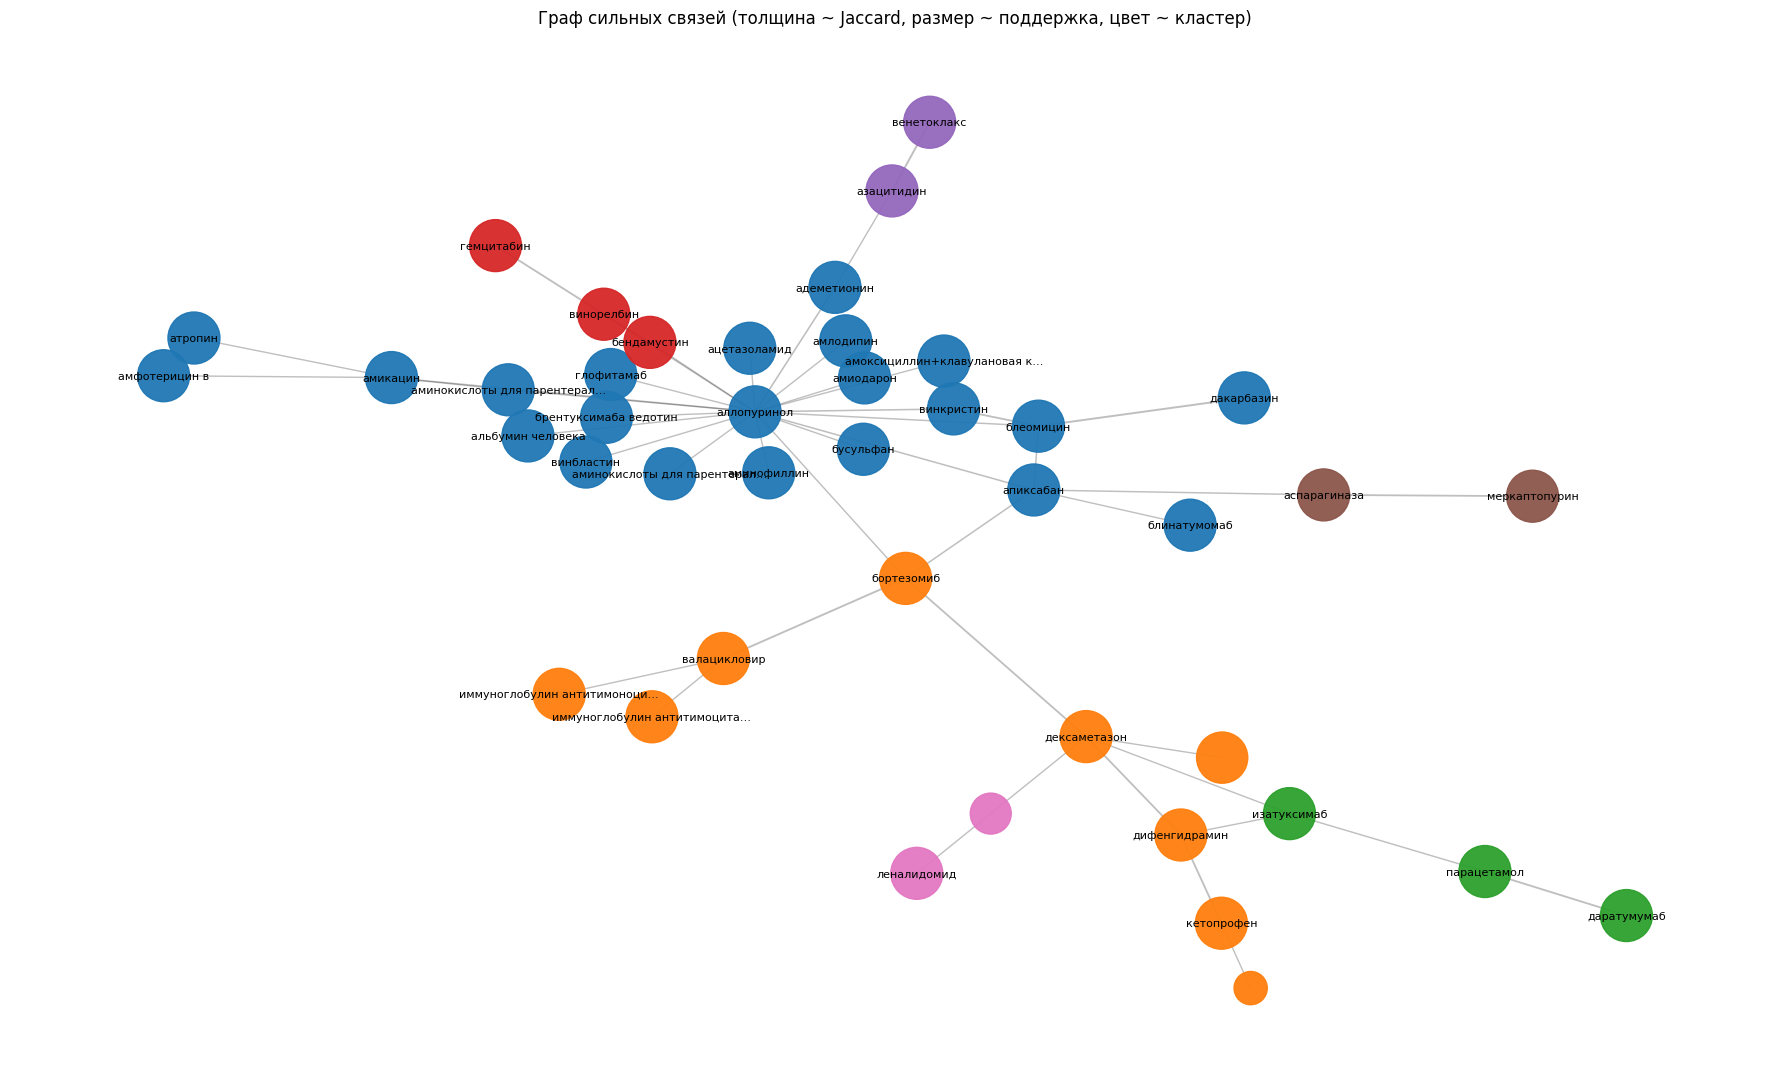

In [135]:
# 1) уберём одиночки и совсем мелкие компоненты (например, <3 узлов)
Gf = G_best.copy()
small = [c for c in nx.connected_components(Gf) if len(c) < 3]
nodes_to_drop = set().union(*small) if small else set()
Gf.remove_nodes_from(nodes_to_drop)

# 2) более читаемая картинка: меньше узлов, но толще связи и сильнее «расталкивание»
plot_graph_clusters_readable(
    Gf,
    keep_top_by_support=80,  # покажем топ-80 узлов по поддержке (подбери 60–120)
    edge_topk=4,             # до 4 самых сильных рёбер на узел
    label_top_n=40,          # подпишем только 40 самых важных
    k_force=2.4,             # сильнее раздвинем layout
    cap_node_size=1400,      # потолок размера, чтобы не перекрывали
    figsize=(18,11),
    label_width=28
)

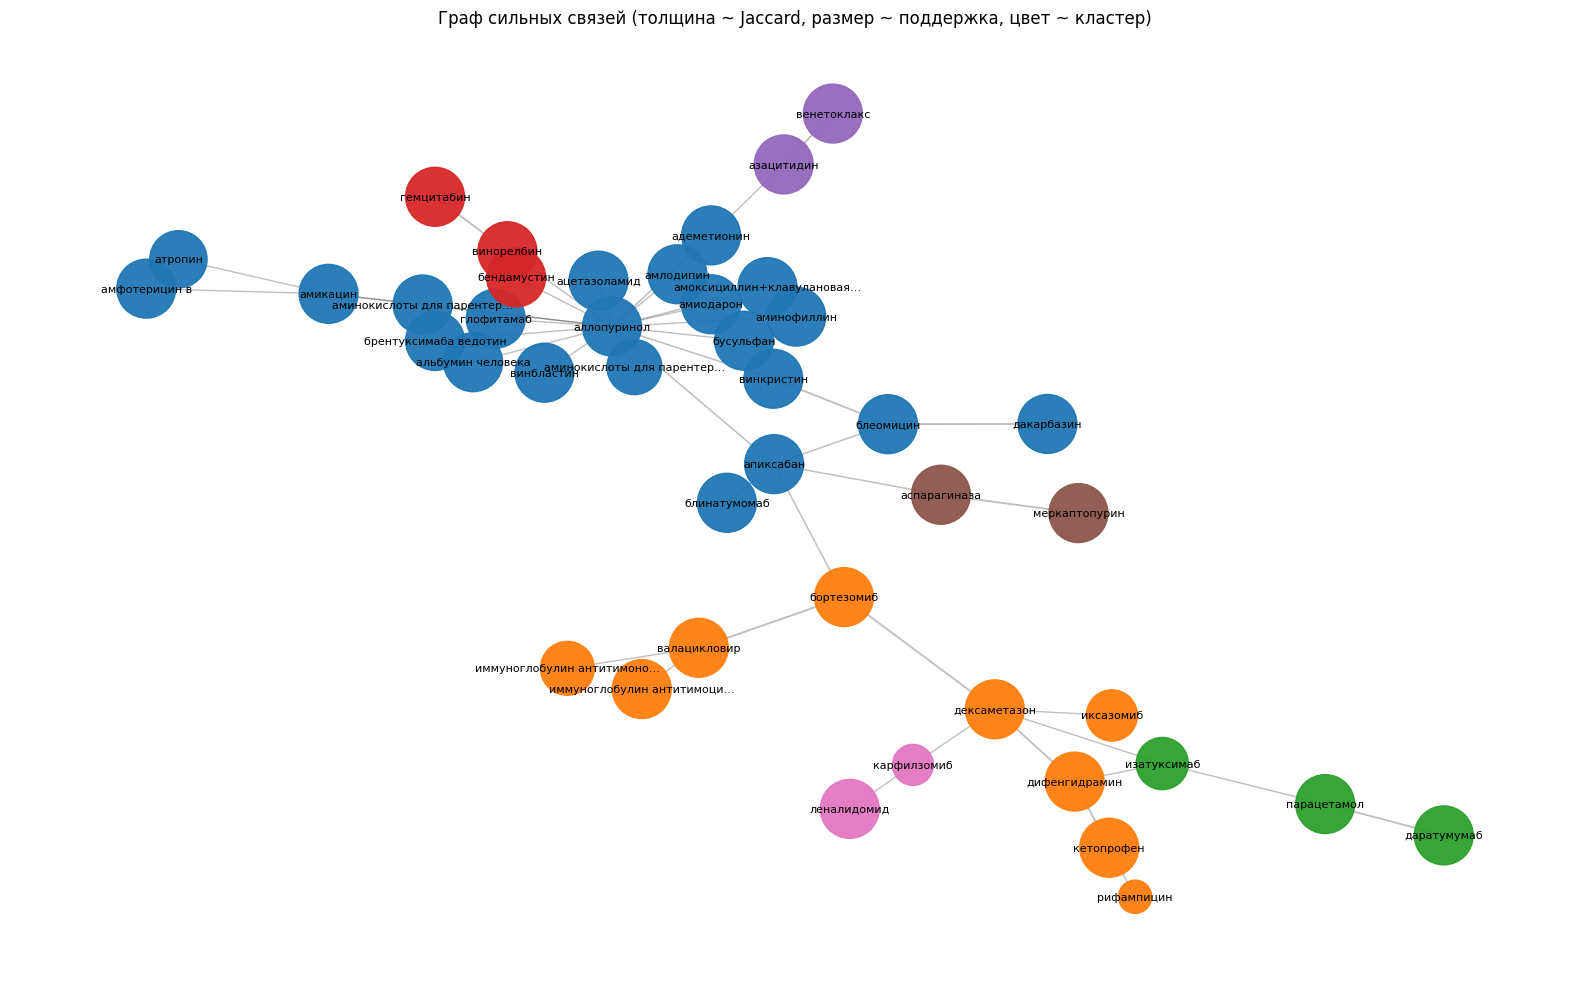

In [136]:
# оставить только компоненты с >=4 узлами
Gg = G_best.copy()
for comp in list(nx.connected_components(Gg)):
    if len(comp) < 4:
        Gg.remove_nodes_from(comp)

plot_graph_clusters_readable(Gg, keep_top_by_support=90, edge_topk=3, label_top_n=45, k_force=2.2)

In [137]:
save_interactive_html(G_best, html_path="mnn_network_clusters.html")

HTML сохранён: mnn_network_clusters.html


In [138]:
# ====== SAVE CLUSTER ARTIFACTS FOR TRAINING ======
import os, json
import pandas as pd
import numpy as np
import networkx as nx

OUTPUT_DIR = "./cluster_artifacts"
os.makedirs(OUTPUT_DIR, exist_ok=True)

assert isinstance(G_best, nx.Graph) and G_best.number_of_nodes() > 0, "Нет графа G_best"

# 1) Участники кластеров (MNN → cluster)
deg = dict(G_best.degree())
cluster_members = pd.DataFrame({
    "mnn": list(G_best.nodes()),
    "cluster": [G_best.nodes[n].get("cluster") for n in G_best.nodes()],
    "support": [float(G_best.nodes[n].get("weight", 0.0)) for n in G_best.nodes()],
    "degree": [deg[n] for n in G_best.nodes()]
}).sort_values(["cluster","mnn"]).reset_index(drop=True)

cluster_members.to_csv(os.path.join(OUTPUT_DIR, "cluster_members.csv"), index=False)
print("saved:", os.path.join(OUTPUT_DIR, "cluster_members.csv"))

# 2) Сводка по кластерам
top_k = 10
def _top_mnns(gr, k=top_k):
    return "; ".join(gr.sort_values("support", ascending=False).head(k)["mnn"])

cluster_summary = (cluster_members
    .groupby("cluster")
    .agg(n_mnns=("mnn","count"),
         sum_support=("support","sum"),
         avg_degree=("degree","mean"))
    .reset_index()
    .merge(
        cluster_members.groupby("cluster").apply(lambda g: _top_mnns(g, top_k)).reset_index(name="top_mnns"),
        on="cluster", how="left"
    )
    .sort_values(["n_mnns","sum_support"], ascending=False)
)

cluster_summary.to_csv(os.path.join(OUTPUT_DIR, "cluster_summary.csv"), index=False)
print("saved:", os.path.join(OUTPUT_DIR, "cluster_summary.csv"))

# 3) Рёбра графа (для правил/обучения)
edges_rows = []
for u, v, d in G_best.edges(data=True):
    edges_rows.append({
        "mnn_u": u,
        "mnn_v": v,
        "cluster_u": G_best.nodes[u].get("cluster"),
        "cluster_v": G_best.nodes[v].get("cluster"),
        "intra_cluster": int(G_best.nodes[u].get("cluster") == G_best.nodes[v].get("cluster")),
        "jaccard": float(d.get("w", 0.0)),
        "support_AB": int(d.get("support", 0))
    })
cluster_edges = pd.DataFrame(edges_rows).sort_values(["intra_cluster","support_AB","jaccard"], ascending=False)
cluster_edges.to_csv(os.path.join(OUTPUT_DIR, "cluster_edges.csv"), index=False)
print("saved:", os.path.join(OUTPUT_DIR, "cluster_edges.csv"))

# 4) Быстрый маппинг для инференса (JSON)
mnn_to_cluster = dict(zip(cluster_members["mnn"], cluster_members["cluster"]))
with open(os.path.join(OUTPUT_DIR, "mnn_to_cluster.json"), "w", encoding="utf-8") as f:
    json.dump(mnn_to_cluster, f, ensure_ascii=False, indent=2)
print("saved:", os.path.join(OUTPUT_DIR, "mnn_to_cluster.json"))

# 5) (опционально) Метки событий по найденным кластерам
#    Нужен baskets_sparse: колонки ["event_id","mnn","val"] с val∈{0,1}
try:
    if "baskets_sparse" in globals():
        # словарь: cluster -> set(MNN)
        cluster_to_mnns = (cluster_members.groupby("cluster")["mnn"]
                           .apply(set).to_dict())
        # event -> set(MNN)
        ev_to_mnns = (baskets_sparse.groupby("event_id")["mnn"]
                      .apply(set).reset_index().rename(columns={"mnn":"mnns"}))

        rows = []
        for _, r in ev_to_mnns.iterrows():
            ev = r["event_id"]; mnns = r["mnns"]
            for cid, members in cluster_to_mnns.items():
                if len(members) < 2:  # одиночные кластеры пропускаем
                    continue
                inter = mnns & members
                cover = len(inter) / len(members)
                rows.append({
                    "event_id": ev,
                    "cluster": cid,
                    "has_full_course": int(cover == 1.0),
                    "coverage": round(cover, 4),
                    "present_mnn": "; ".join(sorted(inter)) if inter else ""
                })
        event_labels = pd.DataFrame(rows)
        event_labels.to_csv(os.path.join(OUTPUT_DIR, "event_labels.csv"), index=False)
        print("saved:", os.path.join(OUTPUT_DIR, "event_labels.csv"))
    else:
        print("[note] baskets_sparse не найден — event_labels.csv не сформирован.")
except Exception as e:
    print("[warn] event_labels не удалось сформировать:", e)

saved: ./cluster_artifacts/cluster_members.csv
saved: ./cluster_artifacts/cluster_summary.csv
saved: ./cluster_artifacts/cluster_edges.csv
saved: ./cluster_artifacts/mnn_to_cluster.json
saved: ./cluster_artifacts/event_labels.csv


In [145]:
# ====================== MNN graph: auto-clusters + plots + PRETTY HTML ======================
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# ---------------- utils ----------------
def _short(s, n=24):
    s = str(s)
    return s if len(s) <= n else s[:n-1] + "…"

def _palette(k:int):
    base = plt.rcParams['axes.prop_cycle'].by_key().get(
        'color',
        ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
         '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
    )
    if k <= len(base): 
        return base[:k]
    import colorsys
    cols = base[:]
    for i in range(k - len(base)):
        h = (i / (k - len(base) + 1)) % 1.0
        r,g,b = colorsys.hsv_to_rgb(h, 0.55, 0.9)
        cols.append((r,g,b))
    return cols

def _ensure_support(pairs_df: pd.DataFrame, mnn_support=None) -> pd.Series:
    """
    Если mnn_support не передан, оценим его из pairs_df:
    по узлу берём max(Σ support_AB как A, Σ support_AB как B).
    """
    if mnn_support is not None:
        s = pd.Series(mnn_support)
        s.index = s.index.astype(str)
        return s
    sa = pairs_df.groupby("A")["support_AB"].sum()
    sb = pairs_df.groupby("B")["support_AB"].sum()
    supp = pd.concat([sa.rename("sup"), sb.rename("sup")], axis=0)
    supp = supp.groupby(level=0).max().sort_values(ascending=False)
    supp.index = supp.index.astype(str)
    return supp

def _graph_density(G):
    n = G.number_of_nodes(); m = G.number_of_edges()
    return 0.0 if n < 2 else 2.0*m/(n*(n-1))

def _avg_clustering(G):
    try:
        return nx.average_clustering(G, weight="w")
    except Exception:
        return 0.0

def _balance_index(sizes):
    """1.0 = кластеры ровные, 0.0 = один огромный и хвост."""
    if not sizes: return 0.0
    arr = np.array(sizes, dtype=float)
    p = arr / arr.sum()
    return 1.0 - (np.abs(p - 1.0/len(p)).sum() / 2.0)

def _sigmoid(x):  # плавно поощряем большие графы
    return 1.0/(1.0+np.exp(-x))

# --------------- graph build / filter ---------------
def build_core_graph(
    pairs_df: pd.DataFrame,
    mnn_support=None,
    min_support=20,
    min_jaccard=0.35,
    min_conf=0.65,
    min_degree=2,
    keep_top_by_support=300
) -> nx.Graph:
    """
    Строим отфильтрованный граф:
    - оставляем рёбра с порогами support/jaccard/conf
    - узлы ограничиваем топ-N по поддержке (если сеть огромная)
    - удаляем узлы со степенью < min_degree
    """
    sup = _ensure_support(pairs_df, mnn_support)  # Series: mnn -> support
    keep = set(sup.head(keep_top_by_support).index.tolist())

    core = pairs_df.loc[
        (pairs_df["support_AB"] >= min_support) &
        (
            (pairs_df["jaccard"] >= min_jaccard) |
            (pairs_df["conf_A_given_B"] >= min_conf) |
            (pairs_df["conf_B_given_A"] >= min_conf)
        )
    ].copy()

    G = nx.Graph()
    for n in keep:
        G.add_node(str(n), weight=float(sup.get(n, 0.0)))

    for _, r in core.iterrows():
        a, b = str(r["A"]), str(r["B"])
        if a in keep and b in keep and a != b:
            G.add_edge(a, b, w=float(r["jaccard"]), support=int(r["support_AB"]))

    if min_degree > 0:
        drop = [n for n in list(G.nodes()) if G.degree(n) < min_degree]
        G.remove_nodes_from(drop)
    return G

# --------------- community detection ---------------
def detect_communities(G: nx.Graph) -> dict:
    """Возвращает dict: node -> cluster_id (Louvain → greedy)."""
    if G.number_of_nodes() == 0:
        return {}
    try:
        import community as community_louvain  # python-louvain
        part = community_louvain.best_partition(G, weight="w", random_state=42)
    except Exception:
        from networkx.algorithms.community import greedy_modularity_communities
        comms = list(greedy_modularity_communities(G, weight="w"))
        part = {}
        for cid, comm in enumerate(comms):
            for n in comm: part[n] = cid
    return part

# --------------- auto selection (обоснованный) ---------------
def auto_cluster_selection(
    pairs_df: pd.DataFrame,
    mnn_support=None,
    support_grid=(10, 15, 20, 25, 30),
    jaccard_grid=(0.20, 0.25, 0.30, 0.35, 0.40),
    conf_grid=(0.45, 0.55, 0.65),
    min_degree_grid=(2,),
    keep_top_by_support=300,
    # ограничения/желания по форме графа
    min_nodes=40,
    min_edges=60,
    target_clusters=(4, 10),
    # веса в целевой функции
    w_mod=0.45, w_den=0.20, w_bal=0.15, w_cc=0.10, w_size=0.10,
    verbose=True
):
    """
    Перебираем сетку порогов и выбираем комбинацию с максимальным скором.
    Скор = w_mod*модульность + w_den*плотность + w_bal*баланс + w_cc*кластеризация + w_size*бонус_за_размер,
    плюс жёсткие проверки min_nodes/min_edges и диапазона по числу кластеров.
    Возвращает: (G_best, best_part, best_params, best_score, trials_df)
    """
    trials = []
    best = (None, None, None, -1.0)  # (G, part, params, score)

    for sup_th in support_grid:
        for jac_th in jaccard_grid:
            for conf_th in conf_grid:
                for mind in min_degree_grid:
                    G = build_core_graph(
                        pairs_df, mnn_support,
                        min_support=sup_th,
                        min_jaccard=jac_th,
                        min_conf=conf_th,
                        min_degree=mind,
                        keep_top_by_support=keep_top_by_support
                    )
                    n, m = G.number_of_nodes(), G.number_of_edges()
                    if n == 0 or m == 0:
                        trials.append((sup_th, jac_th, conf_th, mind, n, m, 0, -1.0))
                        continue

                    part = detect_communities(G)
                    # размеры кластеров
                    clusters = {}
                    for node, cid in part.items():
                        clusters.setdefault(cid, []).append(node)
                    n_clusters = len(clusters)

                    # жёсткие требования к размеру/числу кластеров
                    if n < min_nodes or m < min_edges or not (target_clusters[0] <= n_clusters <= target_clusters[1]):
                        penalty = -0.5 * ( (min_nodes - n)/max(1,min_nodes) + (min_edges - m)/max(1,min_edges) )
                        score = penalty
                    else:
                        # модульность
                        try:
                            import community as community_louvain
                            mod = community_louvain.modularity(part, G, weight="w")
                        except Exception:
                            intra = sum(d.get("w",1.0) for u,v,d in G.edges(data=True) if part.get(u)==part.get(v))
                            total = sum(d.get("w",1.0) for _,_,d in G.edges(data=True))
                            mod = intra/total if total>0 else 0.0

                        den = _graph_density(G)
                        bal = _balance_index([len(v) for v in clusters.values()])
                        cc  = _avg_clustering(G)
                        size_bonus = _sigmoid((n - min_nodes)/10.0)

                        score = w_mod*mod + w_den*den + w_bal*bal + w_cc*cc + w_size*size_bonus

                    trials.append((sup_th, jac_th, conf_th, mind, n, m, n_clusters, score))
                    if score > best[3]:
                        best = (G, part, {"min_support": sup_th, "min_jaccard": jac_th,
                                          "min_conf": conf_th, "min_degree": mind}, score)

    trials_df = pd.DataFrame(trials, columns=[
        "min_support","min_jaccard","min_conf","min_degree","nodes","edges","n_clusters","score"
    ]).sort_values("score", ascending=False)

    if verbose:
        print(f"Auto-selection tried: {len(trials_df)} combos")
        try:
            display(trials_df.head(10))
        except Exception:
            print(trials_df.head(10))

    G_best, best_part, best_params, best_score = best
    if G_best is None:
        # пусто — снимем пороги до нулевых, чтобы хоть что-то показать
        G_best = build_core_graph(pairs_df, mnn_support, 1, 0.0, 0.0, 0, keep_top_by_support)
        best_part = detect_communities(G_best)
        best_params = dict(min_support=1, min_jaccard=0.0, min_conf=0.0, min_degree=0)
        best_score = 0.0

    if G_best.number_of_nodes() and best_part:
        nx.set_node_attributes(G_best, best_part, "cluster")

    return G_best, best_part, best_params, best_score, trials_df

# --------------- static plot (читабельный) ---------------
def prune_edges_topk(G: nx.Graph, k: int = 3) -> nx.Graph:
    """Оставляет для каждого узла не более k рёбер с максимальным весом 'w'."""
    if G.number_of_edges() == 0: 
        return G
    H = nx.Graph()
    H.add_nodes_from(G.nodes(data=True))
    for n in G.nodes():
        nbrs = []
        for u, v, d in G.edges(n, data=True):
            w = float(d.get("w", 0.0))
            sup = int(d.get("support", 0))
            nbr = v if u == n else u
            nbrs.append((w, sup, n, nbr, d))
        nbrs.sort(reverse=True)           # по Jaccard, при равенстве — по support
        for _, __, u, v, d in nbrs[:k]:
            if H.has_edge(u, v):
                continue
            H.add_edge(u, v, **d)
    return H

def plot_graph_clusters_readable(
    G: nx.Graph,
    title="Граф сильных связей (толщина ~ Jaccard, размер ~ поддержка, цвет ~ кластер)",
    label_top_n: int = 30,           # подпишем только N самых «важных» узлов
    edge_topk: int = 3,              # оставим до k сильнейших рёбер на узел
    keep_top_by_support: int = None, # при желании ещё урежем узлы
    cap_node_size: int = 1800,       # верхняя граница размера узла
    k_force: float = 1.8,            # «расталкивание»
    figsize=(16,10),
    label_width: int = 26
):
    if G.number_of_nodes() == 0:
        print("Граф пуст — нечего рисовать."); return

    GG = G.copy()

    if keep_top_by_support is not None:
        sup = {n: float(GG.nodes[n].get("weight", 0.0)) for n in GG.nodes()}
        keep = set([n for n,_ in sorted(sup.items(), key=lambda x: x[1], reverse=True)[:keep_top_by_support]])
        GG = GG.subgraph(keep).copy()

    GG = prune_edges_topk(GG, k=edge_topk)

    k = 1/np.sqrt(max(1, GG.number_of_nodes()))
    pos = nx.spring_layout(GG, k=k*k_force, iterations=400, seed=42)

    clusters = sorted({GG.nodes[n].get("cluster", -1) for n in GG.nodes()})
    colors = _palette(len(clusters))
    cmap = {cid: colors[i % len(colors)] for i, cid in enumerate(clusters)}
    node_colors = [cmap.get(GG.nodes[n].get("cluster", None), "#9e9e9e") for n in GG.nodes()]

    sizes_raw = np.array([max(0.0, float(GG.nodes[n].get("weight", 0.0))) for n in GG.nodes()])
    node_sizes = 120 + 160*np.sqrt(sizes_raw)
    node_sizes = np.clip(node_sizes, 120, cap_node_size)
    edge_w = [1.0 + 6.0*GG.edges[e].get("w", 0.0) for e in GG.edges()]

    importance = sizes_raw * np.array([GG.degree(n) for n in GG.nodes()])
    top_idx = np.argsort(-importance)[:min(label_top_n, len(importance))]
    label_nodes = set([list(GG.nodes())[i] for i in top_idx])
    labels = {n: _short(n, label_width) for n in GG.nodes() if n in label_nodes}

    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(GG, pos, width=edge_w, alpha=0.25)
    nx.draw_networkx_nodes(GG, pos, node_size=node_sizes, node_color=node_colors, alpha=0.95)
    nx.draw_networkx_labels(GG, pos, labels=labels, font_size=8)
    plt.title(title)
    plt.axis("off"); plt.tight_layout(); plt.show()

# --------------- pretty HTML (pyvis) ---------------
def save_interactive_html_pretty(
    G: nx.Graph,
    html_path="out/mnn_network_clusters_pretty.html",
    show_buttons=True,
    use_fixed_layout=True,
    height="860px",
    width="100%"
):
    if G.number_of_nodes() == 0:
        print("Граф пуст — HTML не создан.")
        return

    from pyvis.network import Network
    import os

    os.makedirs(os.path.dirname(html_path) or ".", exist_ok=True)

    net = Network(height=height, width=width, bgcolor="#ffffff", font_color="#111827", notebook=False)
    net.toggle_physics(True)

    # ВАЖНО: сначала show_buttons, потом set_options (иначе баг pyvis)
    if show_buttons:
        try:
            net.show_buttons(filter_=['physics','interaction','layout','nodes','edges'])
        except Exception:
            pass

    # Красивые опции (валидный JSON!)
    net.set_options("""
{
  "nodes": {
    "shape": "dot",
    "borderWidth": 1,
    "size": 8,
    "scaling": { "min": 8, "max": 42 },
    "font": { "size": 16, "face": "Inter, -apple-system, Segoe UI, Roboto, Arial", "strokeWidth": 0 }
  },
  "edges": {
    "color": { "color": "#64748b", "highlight": "#0f172a", "opacity": 0.35 },
    "smooth": { "type": "dynamic" },
    "width": 1,
    "selectionWidth": 2
  },
  "layout": { "improvedLayout": true },
  "interaction": {
    "hover": true, "tooltipDelay": 120,
    "multiselect": true, "navigationButtons": true,
    "hideEdgesOnDrag": false, "hideNodesOnDrag": false
  },
  "physics": {
    "enabled": true,
    "barnesHut": {
      "gravitationalConstant": -33000,
      "centralGravity": 0.35,
      "springLength": 120,
      "springConstant": 0.015,
      "damping": 0.28
    },
    "stabilization": { "iterations": 150, "updateInterval": 10, "fit": true }
  }
}
""")

    # Палитра по кластерам
    clusters = sorted({G.nodes[n].get("cluster", -1) for n in G.nodes()})
    cols = _palette(len(clusters))
    cmap = {cid: cols[i % len(cols)] for i, cid in enumerate(clusters)}

    # Узлы
    for n, d in G.nodes(data=True):
        cid = d.get("cluster", None)
        color = cmap.get(cid, "#9e9e9e")
        val = float(d.get("weight", 0.0))
        net.add_node(
            n,
            label=_short(n, 28),
            title=f"{n}<br>support={int(val)}<br>cluster={cid}",
            value=val if val > 0 else 1,
            color=color
        )

    # Рёбра
    for u, v, d in G.edges(data=True):
        w = float(d.get("w", 0.0))
        sup = int(d.get("support", 0))
        net.add_edge(
            u, v,
            title=f"support_AB={sup}<br>Jaccard={w:.3f}",
            value=max(1, int(10*w))
        )

    # Фиксированная стартовая раскладка — БЕЗ nodes_dict, работаем через net.nodes
    if use_fixed_layout:
        k = 1/np.sqrt(max(1, G.number_of_nodes()))
        pos = nx.spring_layout(G, k=k*1.6, iterations=500, seed=42)  # координаты в [-1..1]
        pos_scaled = {n: (float(xy[0]*1000), float(xy[1]*1000)) for n, xy in pos.items()}
        # проставим x/y/fixed прямо в dict каждого узла
        for nd in net.nodes:
            nid = nd.get('id')
            if nid in pos_scaled:
                x, y = pos_scaled[nid]
                nd['x'] = x
                nd['y'] = y
                nd['fixed'] = False  # True — полностью фиксировать

    # Сохранить
    try:
        net.write_html(html_path, open_browser=False)
    except Exception:
        net.save_graph(html_path)
    print(f"HTML сохранён: {html_path}")

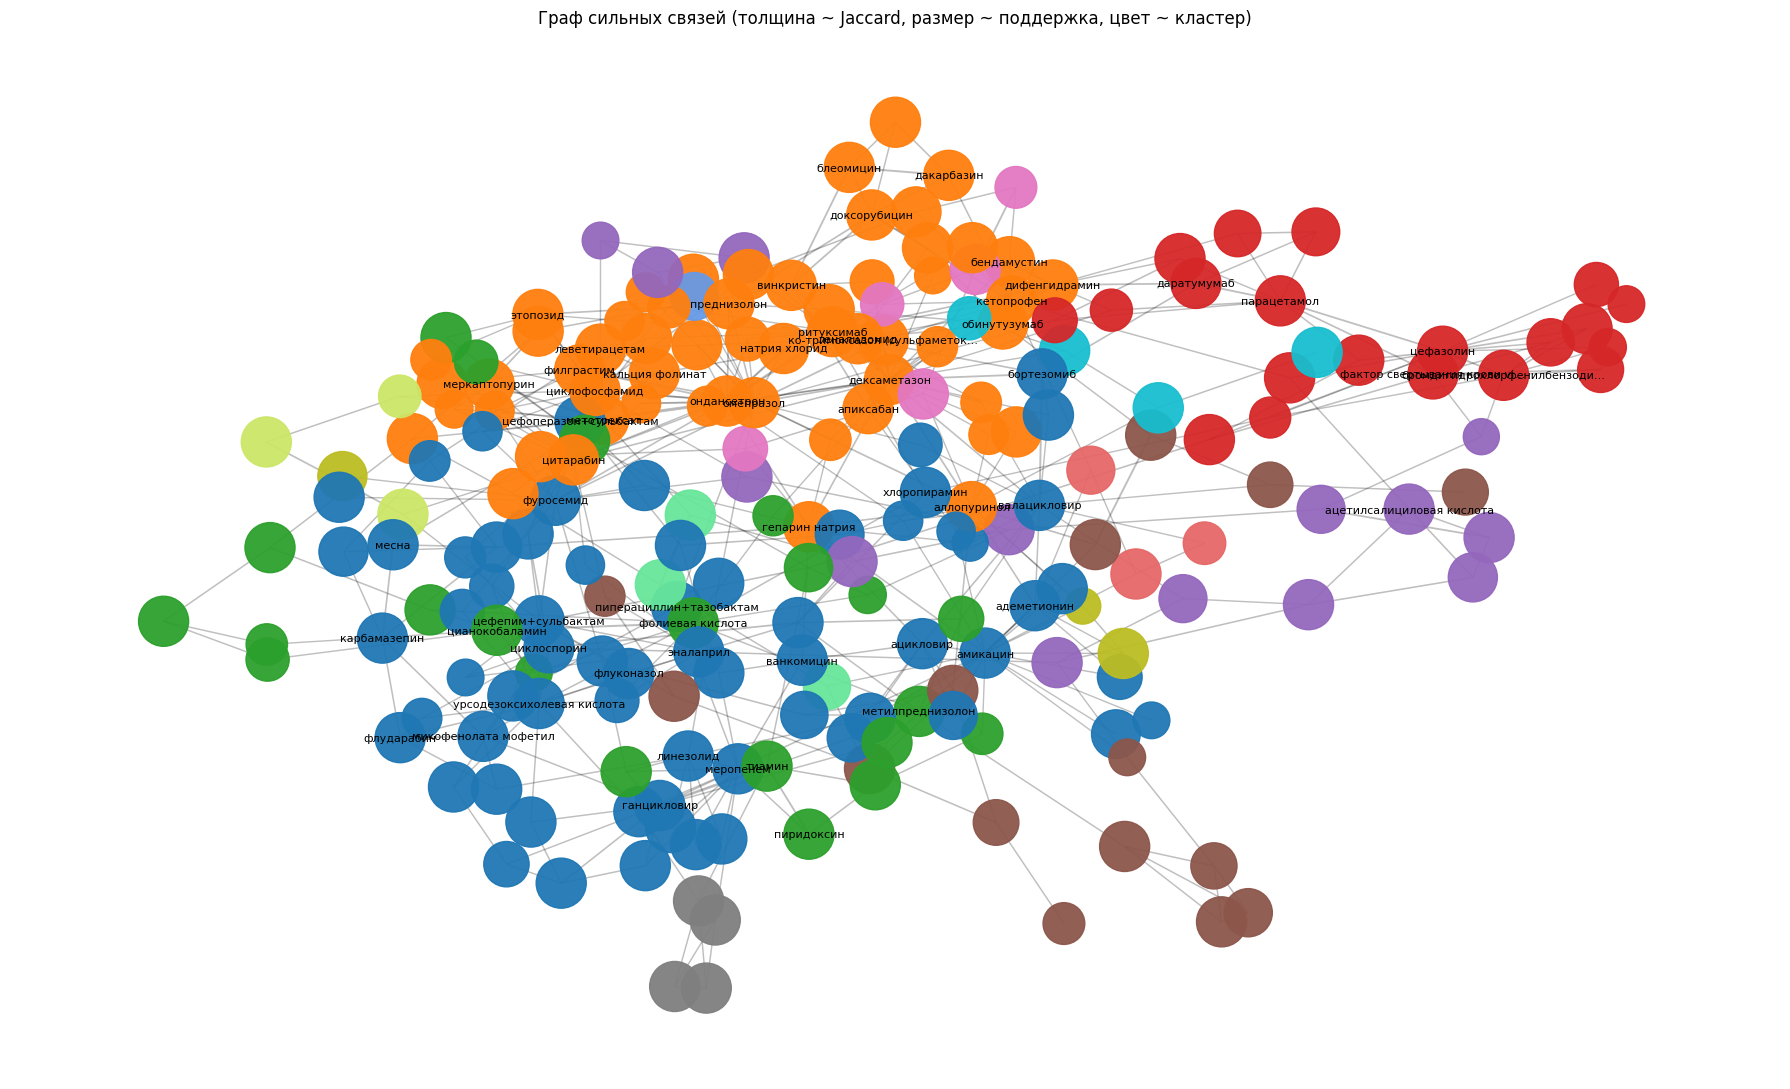

In [154]:
best_params = dict(min_support=3, min_jaccard=0.01, min_conf=0.10, min_degree=1)

G_best = build_core_graph(
    pairs_df, mnn_support,
    **best_params,
    keep_top_by_support=400
)
nx.set_node_attributes(G_best, detect_communities(G_best), "cluster")

# уберём совсем маленькие компоненты (например, < 4 узлов)
small_comps = [c for c in nx.connected_components(G_best) if len(c) < 4]
Gf = G_best.copy()
if small_comps:
    Gf.remove_nodes_from(set().union(*small_comps))

# более читаемая картинка
plot_graph_clusters_readable(
    Gf,
    keep_top_by_support=220,   # оставим «ядро» по поддержке
    edge_topk=3,               # не более 3 сильных рёбер на узел
    label_top_n=60,            # подпишем только важные узлы
    k_force=2.1,               # сильнее «растолкаем»
    cap_node_size=1300,
    figsize=(18,11),
    label_width=28
)

In [155]:
save_interactive_html_pretty(
    Gf,
    html_path="out/mnn_network_clusters_pretty.html",
    show_buttons=True,        # панель настройки физики/вида
    use_fixed_layout=False,   # оставим физику включённой
    height="860px",
    width="100%"
)

HTML сохранён: out/mnn_network_clusters_pretty.html


Pruned graph: nodes=275 edges=1336


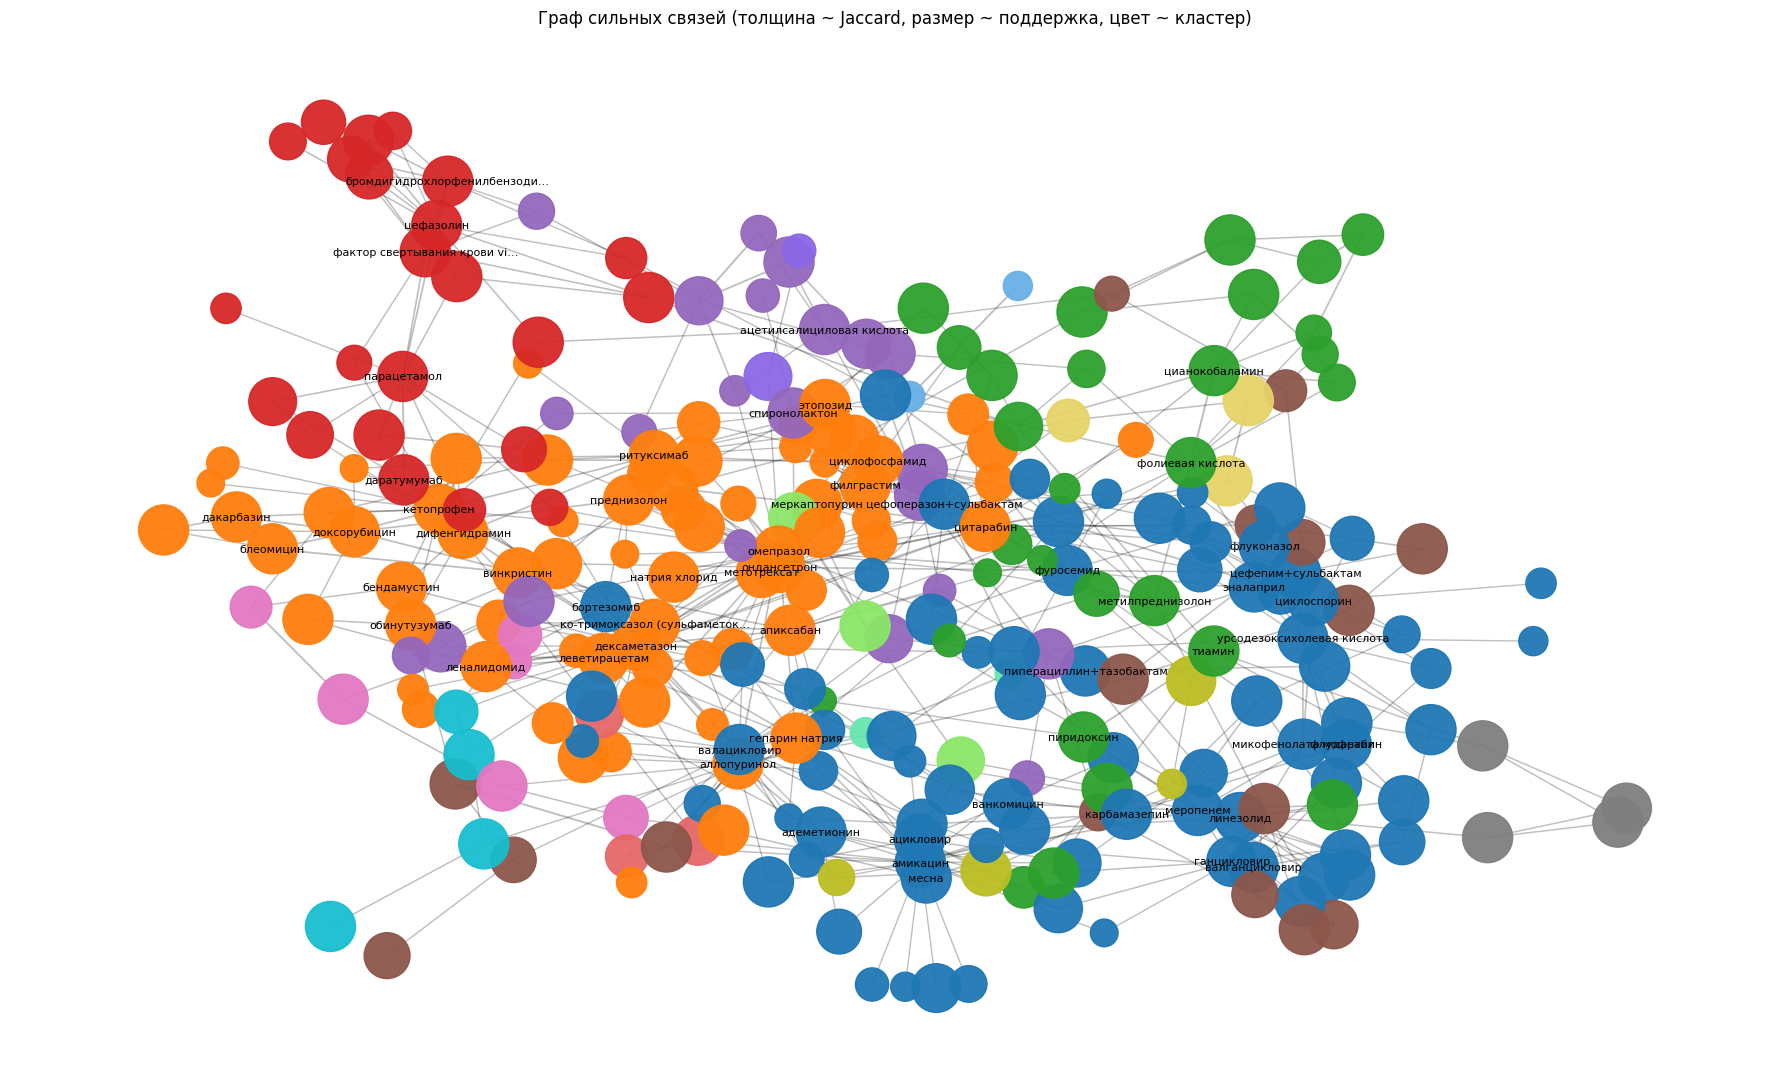

HTML сохранён: cluster_artifacts_final/mnn_network_clusters_pretty.html
Saved to: /Users/dimashkhoroshun/Desktop/cluster_artifacts_final
event_labels.csv saved


In [156]:
# === 1) чистка графа: одиночки и мелкие компоненты ===
MIN_COMP = 3          # минимальный размер компоненты; можно 3–5
G_clean = G_best.copy()

# уберём изолированные узлы (degree==0)
isolates = [n for n in G_clean.nodes() if G_clean.degree(n) == 0]
G_clean.remove_nodes_from(isolates)

# уберём маленькие компоненты
small_comps = [c for c in nx.connected_components(G_clean) if len(c) < MIN_COMP]
if small_comps:
    G_clean.remove_nodes_from(set().union(*small_comps))

print(f"Pruned graph: nodes={G_clean.number_of_nodes()} edges={G_clean.number_of_edges()}")

# === 2) пересчёт кластеров на очищенном графе ===
part = detect_communities(G_clean)
nx.set_node_attributes(G_clean, part, "cluster")

# ==== 3) сохранения: таблицы, json, html, png ====
from pathlib import Path
outdir = Path("./cluster_artifacts_final"); outdir.mkdir(parents=True, exist_ok=True)

# members / summary / edges
deg = dict(G_clean.degree())
members = pd.DataFrame({
    "mnn": list(G_clean.nodes()),
    "cluster": [G_clean.nodes[n].get("cluster", -1) for n in G_clean.nodes()],
    "support": [G_clean.nodes[n].get("weight", 0) for n in G_clean.nodes()],
    "degree": [deg[n] for n in G_clean.nodes()],
})
summary = (members.groupby("cluster")
           .agg(n_mnns=("mnn","count"),
                sum_support=("support","sum"),
                avg_degree=("degree","mean"))
           .reset_index()
           .sort_values(["n_mnns","sum_support"], ascending=False))

edges = pd.DataFrame(
    [{"A":u, "B":v, "jaccard":d.get("w",0.0), "support_AB":d.get("support",0)}
     for u,v,d in G_clean.edges(data=True)]
)

members.to_csv(outdir/"cluster_members.csv", index=False)
summary.to_csv(outdir/"cluster_summary.csv", index=False)
edges.to_csv(outdir/"cluster_edges.csv", index=False)

# mnn -> cluster
pd.Series(dict(zip(members.mnn, members.cluster))).to_json(
    outdir/"mnn_to_cluster.json", force_ascii=False
)

# статичная картинка (читабельная)
plot_graph_clusters_readable(
    G_clean,
    keep_top_by_support=None,  # уже очищено
    edge_topk=3,
    label_top_n=60,
    k_force=2.0,
    cap_node_size=1300,
    figsize=(18,11),
    label_width=28
)
plt.savefig(outdir/"graph_clusters.png", dpi=180, bbox_inches="tight"); plt.close()

# интерактивный HTML
save_interactive_html_pretty(
    G_clean,
    html_path=str(outdir/"mnn_network_clusters_pretty.html"),
    show_buttons=True,
    use_fixed_layout=False,
    height="860px", width="100%"
)

print("Saved to:", outdir.resolve())

# === 4) (опционально) event_labels для обучения, если есть baskets_sparse ===
if "baskets_sparse" in globals():
    ev_to_mnns = (baskets_sparse.groupby("event_id")["mnn"]
                  .apply(set).reset_index().rename(columns={"mnn":"mnns"}))
    cl_map = members.groupby("cluster")["mnn"].apply(set).to_dict()

    rows = []
    for _,r in ev_to_mnns.iterrows():
        ev, mnns = r["event_id"], r["mnns"]
        for cid, cm in cl_map.items():
            inter = mnns & cm
            cov = len(inter)/len(cm) if cm else 0
            rows.append({
                "event_id": ev, "cluster": cid,
                "present_mnn": "; ".join(sorted(inter)),
                "coverage": round(cov,4),
                "has_full_course": int(cov==1.0)
            })
    event_labels = pd.DataFrame(rows)
    event_labels.to_csv(outdir/"event_labels.csv", index=False)
    print("event_labels.csv saved")

After prune: nodes=84 edges=181


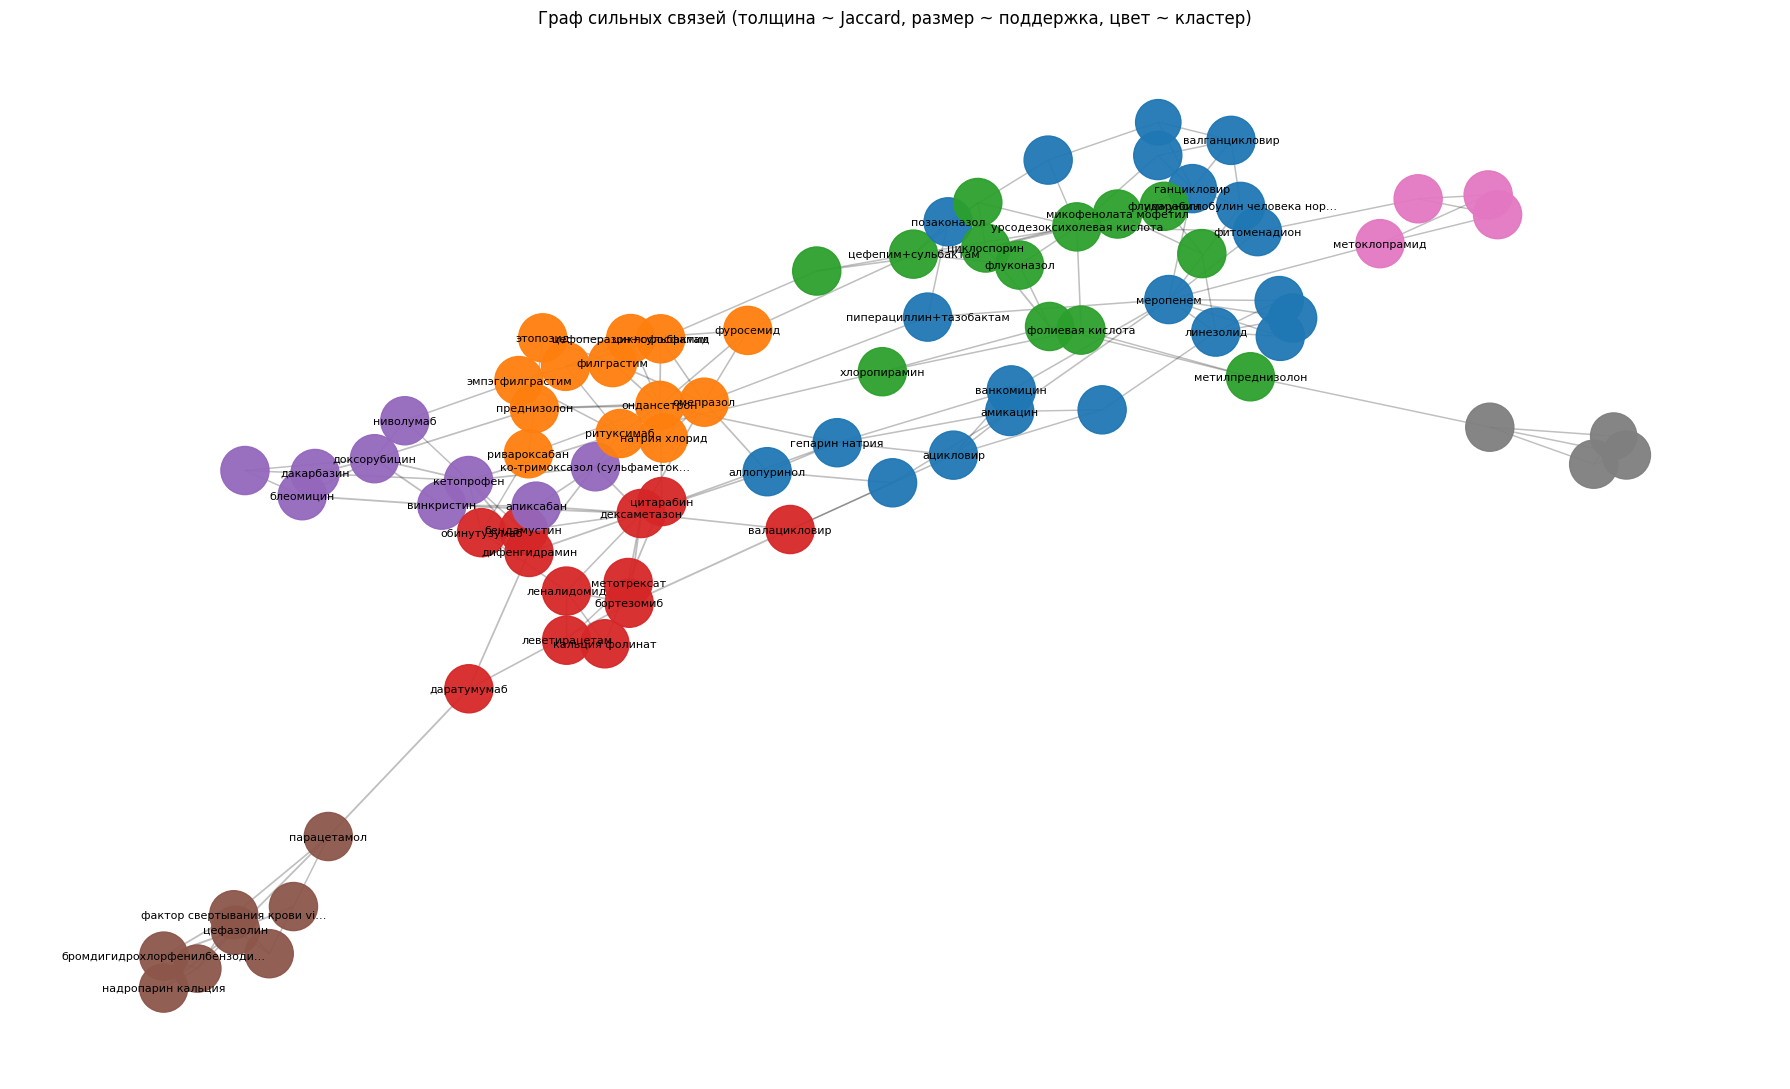

HTML сохранён: cluster_artifacts_final/mnn_network_clusters_pretty.html


In [167]:
def prune_iterative_leaves(G, min_deg=2, min_comp=4, edge_topk=3, jaccard_q=None):
    import copy, numpy as np
    H = G.copy()

    # 0) опционально — оставить только top-k рёбер на узел
    if edge_topk is not None:
        HH = nx.Graph(); HH.add_nodes_from(H.nodes(data=True))
        for n in H.nodes():
            nbrs = []
            for u,v,d in H.edges(n, data=True):
                w = float(d.get("w", 0.0))
                sup = int(d.get("support", 0))
                nbr = v if u == n else u
                nbrs.append((w, sup, u, v, d))
            nbrs.sort(reverse=True)
            for _,__,u,v,d in nbrs[:edge_topk]:
                if not HH.has_edge(u,v):
                    HH.add_edge(u,v,**d)
        H = HH

    # 1) по желанию — отрезать «тонкие» рёбра по перцентилю Jaccard
    if jaccard_q is not None and H.number_of_edges() > 0:
        w = np.array([float(d.get("w",0.0)) for *_,d in H.edges(data=True)])
        thr = float(np.quantile(w, jaccard_q))
        H.remove_edges_from([(u,v) for u,v,d in H.edges(data=True) if float(d.get("w",0.0)) < thr])

    # 2) итеративно удаляем листья (deg < min_deg)
    changed = True
    while changed:
        leaves = [n for n in H.nodes() if H.degree(n) < min_deg]
        if not leaves: 
            changed = False
        else:
            H.remove_nodes_from(leaves)

    # 3) выкидываем мелкие компоненты
    small = [c for c in nx.connected_components(H) if len(c) < min_comp]
    if small:
        H.remove_nodes_from(set().union(*small))

    return H

# ---- применяем и рисуем/сохраняем ----
G_readable = prune_iterative_leaves(
    G_best,
    min_deg=3,       # можно 2 или 3
    min_comp=5,      # компоненты меньше 4 убираем
    edge_topk=3,     # до 3 сильнейших рёбер на узел
    jaccard_q=0.4   # отрезать нижние 25% по Jaccard (или None)
)

print(f"After prune: nodes={G_readable.number_of_nodes()} edges={G_readable.number_of_edges()}")

# обновим кластеры на очищенном графе
part = detect_communities(G_readable)
nx.set_node_attributes(G_readable, part, "cluster")

# картинка и html
plot_graph_clusters_readable(
    G_readable, label_top_n=60, edge_topk=None,  # здесь edge_topk=None, т.к. уже урезали
    k_force=2.2, cap_node_size=1200, figsize=(18,11), label_width=28
)
save_interactive_html_pretty(G_readable, html_path="cluster_artifacts_final/mnn_network_clusters_pretty.html")

In [165]:
import json, os
import pandas as pd
from collections import Counter

outdir = "cluster_artifacts_final"
os.makedirs(outdir, exist_ok=True)

# 1) Узлы = члены кластеров
deg = dict(G_readable.degree())
cluster_members = pd.DataFrame({
    "mnn": list(G_readable.nodes()),
    "cluster": [G_readable.nodes[n].get("cluster", -1) for n in G_readable.nodes()],
    "support": [G_readable.nodes[n].get("weight", 0.0) for n in G_readable.nodes()],
    "degree": [deg[n] for n in G_readable.nodes()],
})
cluster_members.to_csv(f"{outdir}/cluster_members.csv", index=False)

# 2) Сводка по кластерам
cluster_summary = (
    cluster_members.groupby("cluster")
    .agg(n_mnns=("mnn","count"),
         sum_support=("support","sum"),
         avg_degree=("degree","mean"))
    .reset_index()
    .sort_values(["n_mnns","sum_support"], ascending=False)
)
cluster_summary.to_csv(f"{outdir}/cluster_summary.csv", index=False)

# 3) Рёбра ядра
edges = []
for u, v, d in G_readable.edges(data=True):
    edges.append({
        "A": u, "B": v,
        "jaccard": float(d.get("w", 0.0)),
        "support_AB": int(d.get("support", 0)),
        "cluster_A": G_readable.nodes[u].get("cluster", -1),
        "cluster_B": G_readable.nodes[v].get("cluster", -1),
    })
cluster_edges = pd.DataFrame(edges)
cluster_edges.to_csv(f"{outdir}/cluster_edges.csv", index=False)

# 4) Словарь MNN → cluster (удобно для фич и разметки событий)
mnn_to_cluster = {n: int(G_readable.nodes[n].get("cluster", -1)) for n in G_readable.nodes()}
with open(f"{outdir}/mnn_to_cluster.json", "w", encoding="utf-8") as f:
    json.dump(mnn_to_cluster, f, ensure_ascii=False, indent=2)

print("saved:", outdir)

saved: cluster_artifacts_final


In [166]:
# baskets_sparse: DataFrame со столбцами ['event_id','mnn','val=1']
# (если его нет под рукой — можно быстро пересобрать из исходных назначений)

cluster_to_mnns = (
    cluster_members
    .groupby("cluster")["mnn"].apply(set)
    .to_dict()
)

ev_to_mnns = (
    baskets_sparse.groupby("event_id")["mnn"]
    .apply(set).reset_index()
    .rename(columns={"mnn": "mnns"})
)

rows = []
for _, r in ev_to_mnns.iterrows():
    eid, mnns = r["event_id"], r["mnns"]
    for cid, members in cluster_to_mnns.items():
        if len(members) < 2:
            continue
        inter = mnns & members
        cover = len(inter) / len(members)
        rows.append({
            "event_id": eid,
            "cluster": cid,
            "has_full_course": int(cover == 1.0),
            "coverage": round(cover, 4),
            "present_mnn": "; ".join(sorted(inter)) if inter else ""
        })

event_labels = pd.DataFrame(rows)
event_labels.to_csv(f"{outdir}/event_labels.csv", index=False)
print("saved:", f"{outdir}/event_labels.csv")

saved: cluster_artifacts_final/event_labels.csv


In [168]:
import os
import re
import numpy as np
import pandas as pd

# ==== настройки ====
OUT_DIR = "./out_training_csv"
os.makedirs(OUT_DIR, exist_ok=True)

# Если у тебя уже есть df_drug в памяти — пропусти этот блок и передай его прямо в build_baskets_sparse(...)
# df_drug = pd.read_csv("/path/to/your/df_drug.csv")  # <- если читаешь из файла

# ==== нормализация ====
UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
VOL_UNITS  = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}
UNIT_UNITS = {"ед","ед.","iu","ме"}

def normalize_mnn(x):
    if pd.isna(x): return x
    s = str(x).strip().lower()
    s = re.sub(r"\s+", " ", s)
    return s

def as_week_start(dt):
    dt = pd.to_datetime(dt, errors="coerce")
    try: dt = dt.dt.tz_localize(None)
    except Exception: pass
    return dt.dt.to_period("W").dt.start_time

def compute_qty_mg(dose, measure, concentration):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    if m in UNIT_TO_MG:
        return float(dose) * UNIT_TO_MG[m]
    elif m in VOL_UNITS:
        if pd.notna(concentration):
            return float(dose) * VOL_UNITS[m] * float(concentration)
        else:
            return np.nan
    elif m in UNIT_UNITS:
        return np.nan
    else:
        return np.nan

def compute_qty_units(dose, measure):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    return float(dose) if m in UNIT_UNITS else np.nan

# ==== сборка baskets_sparse ====
def build_baskets_sparse(df_drug: pd.DataFrame,
                         min_qty_threshold=0.0,
                         only_completed=True,
                         date_col="execution_date",
                         year_filter=(2024, None)):
    """
    Делает event×mnn корзины (0/1) из твоего df_drug.
    Обязательные колонки: event_id, mnn, dose, measure, execution_date, (опц. concentration, status_name)
    """
    df = df_drug.copy()

    # даты
    if date_col not in df.columns:
        raise ValueError(f"В df_drug нет колонки '{date_col}'")
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    # фильтруем «выполнено», если есть статус
    if only_completed and "status_name" in df.columns:
        mask_exec = df[date_col].notna() & df["status_name"].str.contains("выполн", case=False, na=False)
    else:
        mask_exec = df[date_col].notna()
    df = df.loc[mask_exec].copy()

    # нормализуем
    df["mnn_norm"] = df["mnn"].apply(normalize_mnn)
    df["qty_mg"]    = df.apply(lambda r: compute_qty_mg(r.get("dose"), r.get("measure"), r.get("concentration")), axis=1)
    df["qty_units"] = df.apply(lambda r: compute_qty_units(r.get("dose"), r.get("measure")), axis=1)

    # базовая фильтрация по количеству (чтобы убрать нули/отрицательные)
    qty_ok = (
        (df["qty_mg"].fillna(0)   > min_qty_threshold) |
        (df["qty_units"].fillna(0)> min_qty_threshold)
    )
    df = df.loc[qty_ok].copy()

    # опционально — фильтр по году
    if year_filter is not None:
        y_from, y_to = year_filter
        if y_from is not None:
            df = df[df[date_col].dt.year >= int(y_from)]
        if y_to is not None:
            df = df[df[date_col].dt.year <= int(y_to)]

    # неделя (необязательно, но полезно потом)
    df["week"] = as_week_start(df[date_col])

    # итог: event×mnn — наличие (0/1)
    baskets_sparse = (
        df.dropna(subset=["event_id","mnn_norm"])
          .drop_duplicates(["event_id","mnn_norm"])
          .assign(val=1)[["event_id","mnn_norm","val"]]
          .rename(columns={"mnn_norm":"mnn"})
          .sort_values(["event_id","mnn"])
          .reset_index(drop=True)
    )

    print(f"baskets_sparse: events={baskets_sparse['event_id'].nunique()} | "
          f"MNN={baskets_sparse['mnn'].nunique()} | rows={len(baskets_sparse)}")
    return baskets_sparse

# === Пример запуска на твоём df_drug ===
# baskets_sparse = build_baskets_sparse(df_drug, min_qty_threshold=0.0, only_completed=True, year_filter=(2024, None))
# baskets_sparse.to_csv(os.path.join(OUT_DIR, "baskets_sparse.csv"), index=False)
# print("saved:", os.path.join(OUT_DIR, "baskets_sparse.csv"))

In [170]:
baskets_sparse = build_baskets_sparse(df_drug, min_qty_threshold=0.0, only_completed=True, year_filter=(2024, None))

baskets_sparse: events=8744 | MNN=365 | rows=68099


In [171]:
baskets_sparse.to_csv(os.path.join(OUT_DIR, "baskets_sparse.csv"), index=False)

In [172]:
print("saved:", os.path.join(OUT_DIR, "baskets_sparse.csv"))

saved: ./out_training_csv/baskets_sparse.csv


In [169]:
from itertools import combinations

def build_pairs_df(baskets_sparse: pd.DataFrame) -> pd.DataFrame:
    # event -> отсортированный список MNN
    ev_to_mnn = (baskets_sparse.groupby("event_id")["mnn"]
                 .apply(lambda s: sorted(set(s))).reset_index())

    # считаем пары
    pairs = []
    for _, r in ev_to_mnn.iterrows():
        mnns = r["mnn"]
        if len(mnns) < 2: 
            continue
        for a, b in combinations(mnns, 2):
            pairs.append((a, b))
    pairs_df = pd.DataFrame(pairs, columns=["A","B"])
    if pairs_df.empty:
        print("pairs_df пуст — недостаточно совместных назначений."); 
        return pairs_df

    # поддержка пары
    pairs_df["support_AB"] = 1
    pairs_df = (pairs_df.groupby(["A","B"])["support_AB"].sum()
                        .reset_index().sort_values("support_AB", ascending=False))

    # поддержка узлов (сколько раз MNN встретился с любым соседом)
    support_A = pairs_df.groupby("A")["support_AB"].sum().rename("support_A")
    support_B = pairs_df.groupby("B")["support_AB"].sum().rename("support_B")
    pairs_df = pairs_df.merge(support_A, left_on="A", right_index=True, how="left")
    pairs_df = pairs_df.merge(support_B, left_on="B", right_index=True, how="left")

    # jaccard и confidence
    pairs_df["jaccard"] = pairs_df["support_AB"] / (pairs_df["support_A"] + pairs_df["support_B"] - pairs_df["support_AB"]).replace(0, np.nan)
    pairs_df["conf_A_given_B"] = pairs_df["support_AB"] / pairs_df["support_B"].replace(0, np.nan)
    pairs_df["conf_B_given_A"] = pairs_df["support_AB"] / pairs_df["support_A"].replace(0, np.nan)
    pairs_df = pairs_df.fillna(0.0)

    return pairs_df

# === Пример ===
# pairs_df = build_pairs_df(baskets_sparse)
# pairs_df.to_csv(os.path.join(OUT_DIR, "pairs_df.csv"), index=False)
# print("saved:", os.path.join(OUT_DIR, "pairs_df.csv"), "| shape:", pairs_df.shape)

In [173]:
pairs_df = build_pairs_df(baskets_sparse)

In [174]:
pairs_df.to_csv(os.path.join(OUT_DIR, "pairs_df.csv"), index=False)

In [175]:
print("saved:", os.path.join(OUT_DIR, "pairs_df.csv"), "| shape:", pairs_df.shape)

saved: ./out_training_csv/pairs_df.csv | shape: (16847, 8)


In [ ]:
/Users/dimashkhoroshun/Desktop/out_training_csv/pairs_df.csv

In [180]:
import ast


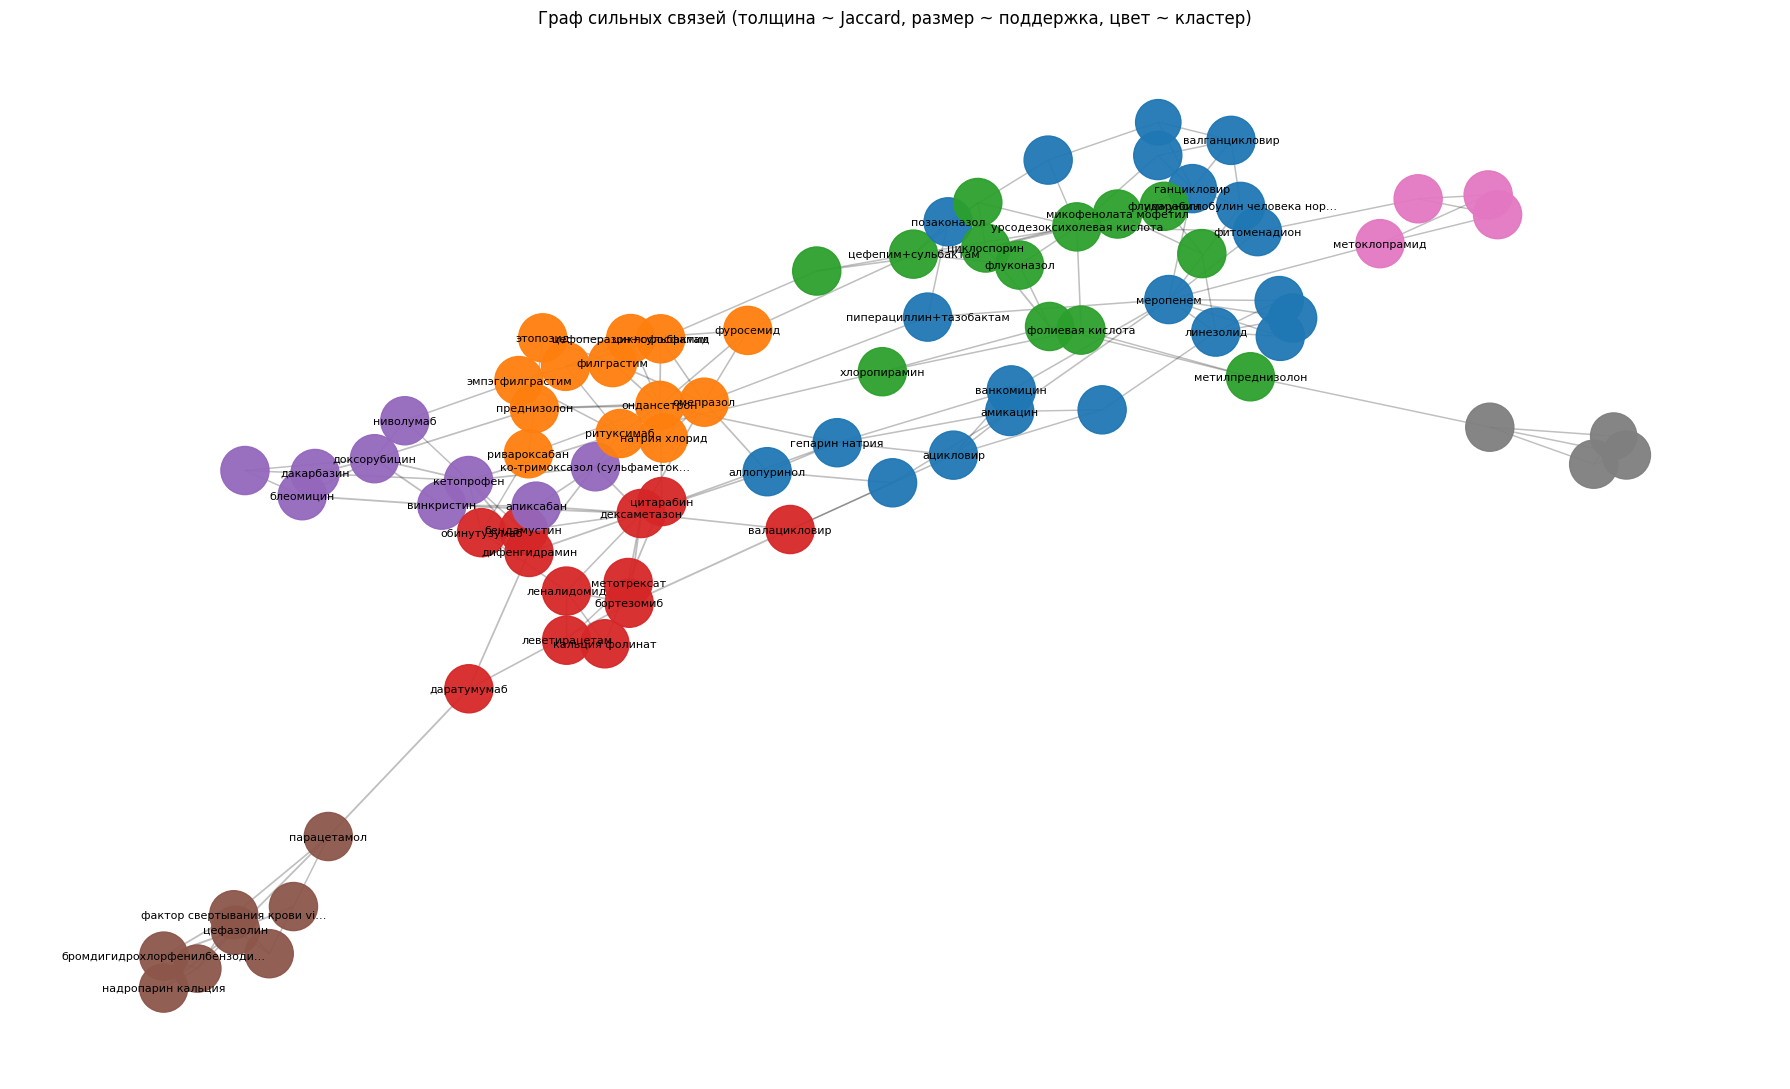

HTML сохранён: cluster_artifacts_final/mnn_network_clusters_pretty_clean.html


In [184]:
# 1) чистим “висячки” и слабые связи
G_readable = prune_iterative_leaves(
    G_best,
    min_deg=3,       # можно 2–3
    min_comp=5,      # маленькие компоненты убрать
    edge_topk=3,     # топ-3 рёбра на узел
    jaccard_q=0.40   # отрезать нижние 40% по Jaccard (или None)
)

# 2) пересчёт кластеров на очищенной сети
part = detect_communities(G_readable)
nx.set_node_attributes(G_readable, part, "cluster")

# 3) картинка + интерактивный HTML
plot_graph_clusters_readable(G_readable, label_top_n=60, edge_topk=None,
                             k_force=2.2, cap_node_size=1200, figsize=(18,11), label_width=28)
save_interactive_html_pretty(G_readable, html_path="cluster_artifacts_final/mnn_network_clusters_pretty_clean.html")

In [185]:
# 3.1. загрузим исходные данные (твои пути)
df_drug = pd.read_csv('/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv')
# предположим, что у тебя есть нормализованная колонка с МНН (mnn_norm). Если нет — возьми 'mnn' и нормализуй .str.lower().str.strip()
drug_mnn_col = "mnn_norm" if "mnn_norm" in df_drug.columns else "mnn"

# 3.2. словарь МНН -> кластер (только те, что попали в граф)
m2c = pd.read_csv("cluster_artifacts_final/cluster_members.csv").set_index("mnn")["cluster"].to_dict()

# 3.3. к какому кластеру относится назначение; остальное — cluster=-1
df_drug["cluster"] = df_drug[drug_mnn_col].map(m2c).fillna(-1).astype(int)

# 3.4. профиль события: количество уникальных МНН по кластерам
event_cluster_counts = (df_drug.groupby(["event_id","cluster"])[drug_mnn_col]
                        .nunique().unstack(fill_value=0))

# 3.5. дополнительные агрегаты на событие
event_size = (df_drug.groupby("event_id")[drug_mnn_col].nunique()
              .rename("uniq_mnn"))
event_total_rows = (df_drug.groupby("event_id")[drug_mnn_col].size()
                    .rename("rows"))
# доля кластеризованных МНН в событии
share_in_clusters = ((df_drug[df_drug["cluster"]>=0].groupby("event_id")[drug_mnn_col].nunique())
                     .div(event_size).fillna(0).rename("share_clustered"))

# 3.6. финальный фрейм признаков по событию
X_clusters = (event_cluster_counts
              .join([event_size, event_total_rows, share_in_clusters], how="left")
              .reset_index()
              .rename(columns=lambda c: f"cl_{c}" if isinstance(c,int) and c>=0 else c))

X_clusters.head()

event_id  -1  cl_3  uniq_mnn  rows  share_clustered
0  20662137  19     0        19   204              0.0
1  20662156  11     0        11    24              0.0
2  20662518  11     0        11    58              0.0
3  20662525  17     0        17   150              0.0
4  20662567   2     0         2    36              0.0

In [186]:
# если нужна временная агрегация
df_drug["date"] = pd.to_datetime(df_drug.get("execution_date"))
df_drug["week"] = df_drug["date"].dt.to_period("W").dt.start_time

# расход по кластерам (сколько уникальных МНН этого кластера в неделю)
weekly_cluster = (df_drug[df_drug["cluster"]>=0]
                  .groupby(["week","cluster"])[drug_mnn_col].nunique()
                  .unstack(fill_value=0)
                  .rename(columns=lambda c: f"wk_cl_{c}"))
weekly_cluster.head()

cluster     wk_cl_3
week               
2024-05-20        1
2024-05-27        1
2024-06-24        1
2024-07-29        1
2024-08-19        1

In [187]:
import pandas as pd
from pathlib import Path

# === пути ===
path_drug = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
path_clusters = "cluster_artifacts_final/cluster_members.csv"
out_dir = Path("cluster_artifacts_final")
out_dir.mkdir(exist_ok=True, parents=True)

# === 3.1. загрузка исходных данных ===
df_drug = pd.read_csv(path_drug)
drug_mnn_col = "mnn_norm" if "mnn_norm" in df_drug.columns else "mnn"

# === 3.2. словарь МНН -> кластер ===
m2c = pd.read_csv(path_clusters).set_index("mnn")["cluster"].to_dict()

# === 3.3. назначаем кластеры ===
df_drug["cluster"] = df_drug[drug_mnn_col].map(m2c).fillna(-1).astype(int)

# === 3.4. профиль события ===
event_cluster_counts = (df_drug.groupby(["event_id","cluster"])[drug_mnn_col]
                        .nunique().unstack(fill_value=0))

# === 3.5. дополнительные агрегаты ===
event_size = df_drug.groupby("event_id")[drug_mnn_col].nunique().rename("uniq_mnn")
event_total_rows = df_drug.groupby("event_id")[drug_mnn_col].size().rename("rows")
share_in_clusters = (
    df_drug[df_drug["cluster"]>=0].groupby("event_id")[drug_mnn_col].nunique()
    .div(event_size).fillna(0).rename("share_clustered")
)

# === 3.6. финальный фрейм признаков ===
X_clusters = (
    event_cluster_counts
    .join([event_size, event_total_rows, share_in_clusters], how="left")
    .reset_index()
    .rename(columns=lambda c: f"cl_{c}" if isinstance(c,int) and c>=0 else c)
)

# сохраняем признаки по событиям
X_clusters.to_csv(out_dir / "event_cluster_features.csv", index=False)

# === временная агрегация ===
df_drug["date"] = pd.to_datetime(df_drug.get("execution_date"))
df_drug["week"] = df_drug["date"].dt.to_period("W").dt.start_time

weekly_cluster = (
    df_drug[df_drug["cluster"]>=0]
    .groupby(["week","cluster"])[drug_mnn_col].nunique()
    .unstack(fill_value=0)
    .rename(columns=lambda c: f"wk_cl_{c}")
)

# сохраняем недельные агрегаты
weekly_cluster.reset_index().to_csv(out_dir / "weekly_cluster_features.csv", index=False)

print(f"Сохранено:\n- {out_dir/'event_cluster_features.csv'}\n- {out_dir/'weekly_cluster_features.csv'}")

Сохранено:
- cluster_artifacts_final/event_cluster_features.csv
- cluster_artifacts_final/weekly_cluster_features.csv


>> load drug …

>> Fitting ARIMA (без exog)
Best ARIMA order=(0, 1, 2), AIC=755.1

>> Fitting ARX (SARIMAX с календарными признаками)
Best ARX order=(0, 1, 2), AIC=766.6

=== ARIMA (без exog) ===
whole H2: MAE=807,124, WAPE=14.55%
4 weeks : MAE=903,850, WAPE=20.16%
8 weeks : MAE=706,702, WAPE=15.09%

=== ARX (календарь) ===
whole H2: MAE=1,133,954, WAPE=20.44%
4 weeks : MAE=1,195,143, WAPE=26.66%
8 weeks : MAE=884,412, WAPE=18.89%


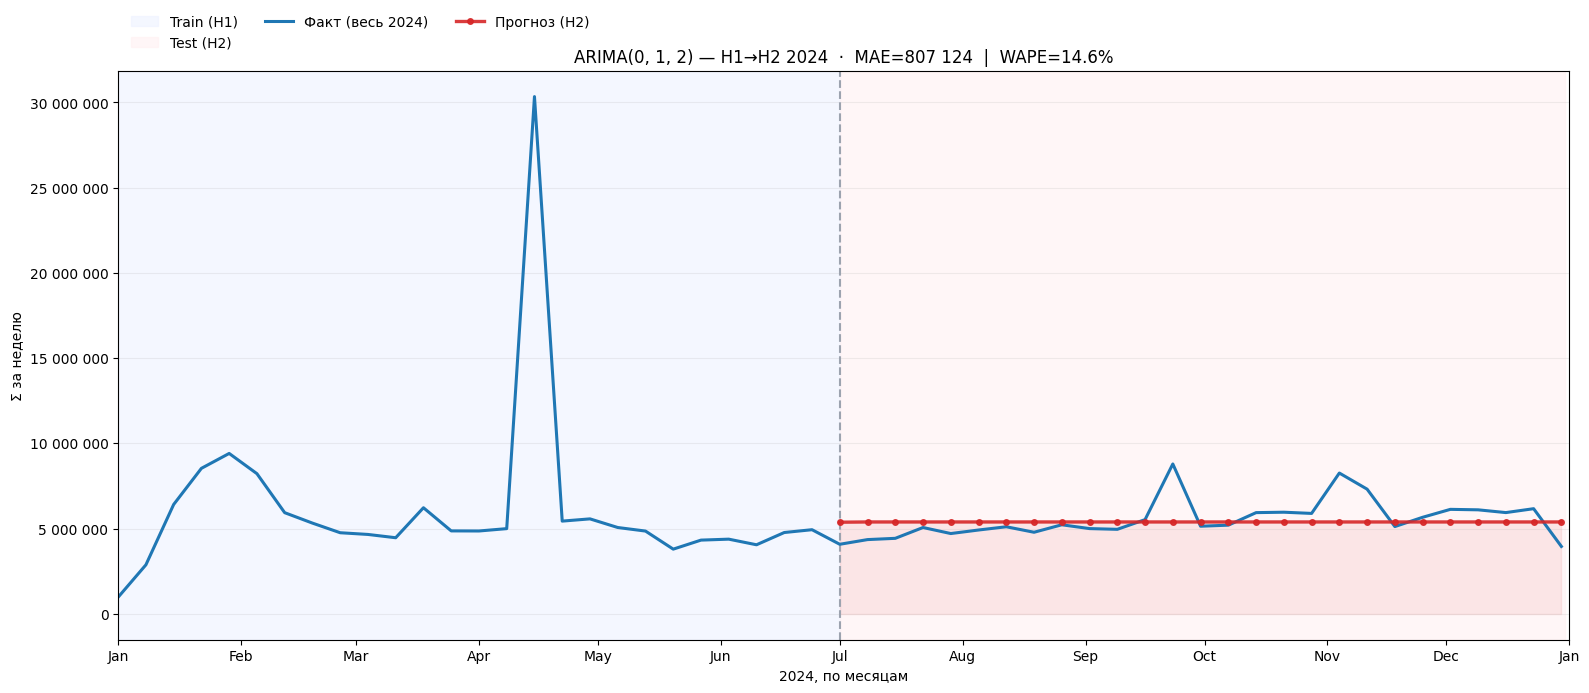

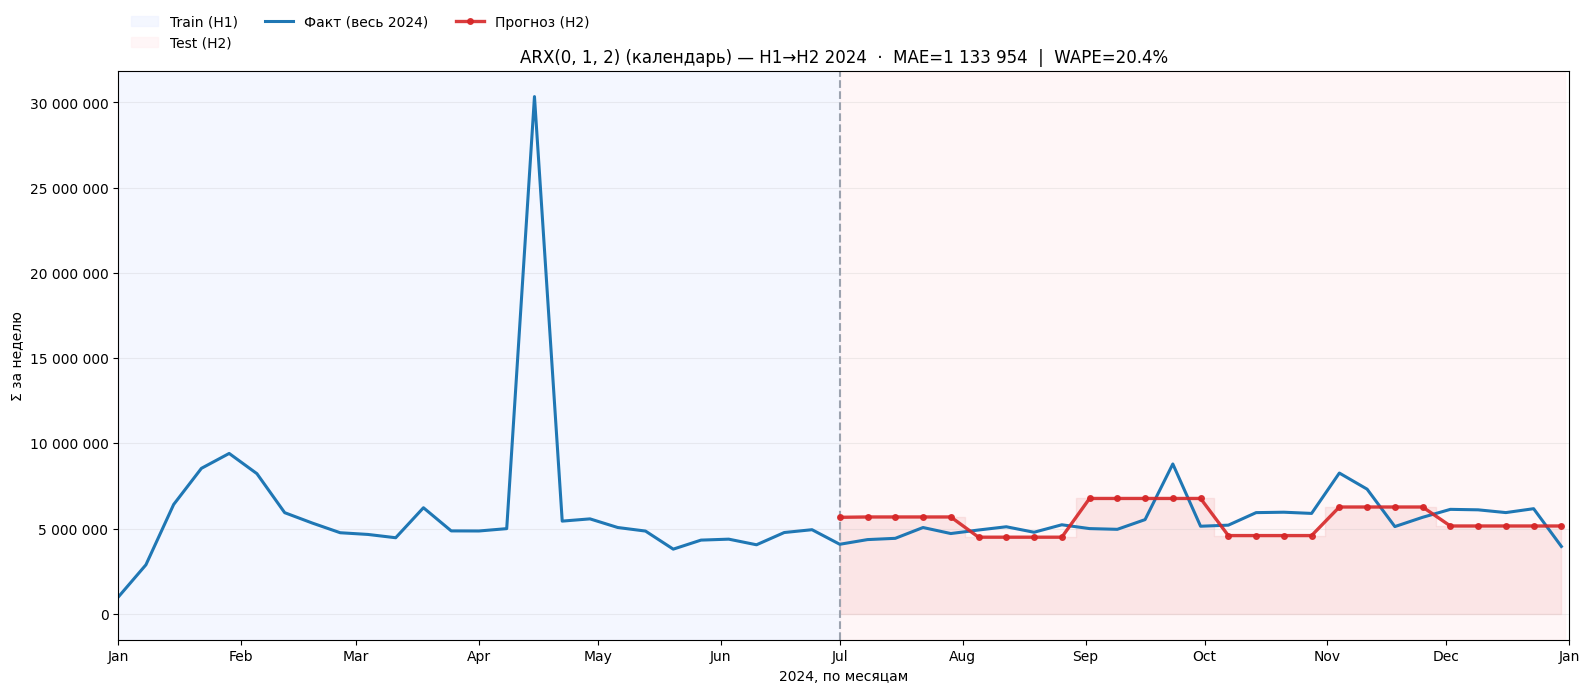


Saved to: out_arima_arx
- out_arima_arx/arima_forecast_2024_h2.png
- out_arima_arx/arx_forecast_2024_h2.png
- out_arima_arx/weekly_forecast_H2.csv
- out_arima_arx/run_meta.json


In [227]:
# -*- coding: utf-8 -*-
# H1 2024 -> H2 2024: ARIMA (и ARX с календарными признаками), без утечки будущего
import os, json, warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import dates as mdates
from matplotlib.ticker import FuncFormatter
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# ===================== CONFIG =====================
DRUG_PATH     = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
CLUSTERS_PATH = "cluster_members.csv"   # не используется как exog, но оставил на будущее
OUT_DIR       = "out_arima_arx"

SPLIT_DATE    = pd.Timestamp("2024-06-30")    # train: <=, test: >
RANDOM_STATE  = 42
TARGET_MODE   = "mg"  # при пустом mg переключимся на count

# небольшая сетка для подбора (ARIMA)
P_RANGE = [0,1,2,3]
D_RANGE = [0,1]
Q_RANGE = [0,1,2]

# ===================== helpers =====================
UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
VOL_UNITS  = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}

def as_week_start(dt):
    dt = pd.to_datetime(dt, errors="coerce")
    try: dt = dt.dt.tz_localize(None)
    except Exception: pass
    return dt.dt.to_period("W").dt.start_time

def normalize_mnn(x: str) -> str:
    if pd.isna(x): return x
    return " ".join(str(x).strip().lower().split())

def compute_qty_mg(dose, measure, concentration):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    try: dose = float(dose)
    except Exception: return np.nan
    if m in UNIT_TO_MG:
        return float(dose) * UNIT_TO_MG[m]
    elif m in VOL_UNITS:
        if pd.notna(concentration):
            try: return float(dose) * VOL_UNITS[m] * float(concentration)
            except Exception: return np.nan
        return np.nan
    return np.nan

def WAPE(y_true, y_pred):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    return float(np.abs(y_true[mask]-y_pred[mask]).sum() /
                 (np.abs(y_true[mask]).sum() + 1e-9))

def _fmt_thousands(x, _pos=None):
    try: return f"{int(x):,}".replace(",", " ")
    except Exception: return str(x)

def plot_2024_with_h2_forecast(weekly_fact: pd.DataFrame,
                               weekly_pred_h2: pd.DataFrame,
                               title: str,
                               mae: float = None,
                               wape: float = None) -> plt.Figure:
    df_fact = weekly_fact.copy(); df_pred = weekly_pred_h2.copy()
    df_fact["week"] = pd.to_datetime(df_fact["week"])
    df_pred["week"] = pd.to_datetime(df_pred["week"])

    df_fact = df_fact[(df_fact["week"] >= "2024-01-01") & (df_fact["week"] <= "2024-12-31")]
    df_pred = df_pred[(df_pred["week"] >= "2024-07-01") & (df_pred["week"] <= "2024-12-31")]

    h2_start = pd.Timestamp("2024-07-01"); h2_end = pd.Timestamp("2024-12-31")

    fig, ax = plt.subplots(figsize=(16,7))
    ax.axvspan(pd.Timestamp("2024-01-01"), h2_start, color="#eef2ff", alpha=0.6, label="Train (H1)")
    ax.axvspan(h2_start, h2_end, color="#fff1f2", alpha=0.6, label="Test (H2)")
    ax.axvline(h2_start, color="#9ca3af", lw=1.5, ls="--")

    ax.plot(df_fact["week"], df_fact["y"], lw=2.2, color="#1f77b4", label="Факт (весь 2024)")
    if not df_pred.empty:
        ax.plot(df_pred["week"], df_pred["y_hat"], lw=2.4, color="#d62728",
                label="Прогноз (H2)", marker="o", ms=4, alpha=0.9)
        ax.fill_between(df_pred["week"], df_pred["y_hat"], step="mid", alpha=0.08, color="#d62728")

    ax.set_xlim(pd.Timestamp("2024-01-01"), pd.Timestamp("2025-01-01"))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.yaxis.set_major_formatter(FuncFormatter(_fmt_thousands))
    ax.grid(True, which="major", axis="y", alpha=0.2)
    ax.set_xlabel("2024, по месяцам"); ax.set_ylabel("Σ за неделю")

    mtxt = []
    if mae is not None:  mtxt.append(f"MAE={mae:,.0f}".replace(",", " "))
    if wape is not None: mtxt.append(f"WAPE={wape*100:.1f}%")
    ax.set_title(f"{title}{('  ·  ' + '  |  '.join(mtxt)) if mtxt else ''}")
    ax.legend(loc="upper left", bbox_to_anchor=(0, 1.12), ncol=3, frameon=False)
    plt.tight_layout()
    return fig

def month_exog(weeks: pd.Series) -> pd.DataFrame:
    """ One-hot по месяцу (известно наперёд → годится для ARX без утечки). """
    s = pd.to_datetime(weeks).dt.month
    ex = pd.get_dummies(s, prefix="m", drop_first=True)
    ex.index = pd.to_datetime(weeks)
    return ex

def fit_arima_grid(y_tr: pd.Series, exog_tr: pd.DataFrame = None):
    """ Перебор небольшой сетки (p,d,q) по AIC. """
    best = (None, np.inf, None)
    for p,d,q in product(P_RANGE, D_RANGE, Q_RANGE):
        if p==0 and d==0 and q==0:
            continue
        try:
            mdl = SARIMAX(
                y_tr, order=(p,d,q),
                enforce_stationarity=False,
                enforce_invertibility=False,
                exog=exog_tr
            ).fit(disp=False)
            if mdl.aic < best[1]:
                best = (mdl, mdl.aic, (p,d,q))
        except Exception:
            continue
    if best[0] is None:
        # запасной вариант
        mdl = SARIMAX(y_tr, order=(1,1,0), exog=exog_tr,
                      enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
        return mdl, (1,1,0), mdl.aic
    return best[0], best[2], best[1]

def evaluate_forecast(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    wape = WAPE(y_true, y_pred)
    return mae, wape

# ===================== LOAD =====================
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
print(">> load drug …")
df = pd.read_csv(DRUG_PATH)

mnn_col = "mnn_norm" if "mnn_norm" in df.columns else "mnn"
if mnn_col not in df.columns:
    raise RuntimeError(f"В {DRUG_PATH} нет столбца mnn/mnn_norm")
df[mnn_col] = df[mnn_col].astype(str).map(normalize_mnn)

date_col = "execution_date" if "execution_date" in df.columns else ("date" if "date" in df.columns else None)
if date_col is None:
    raise RuntimeError("Не нашёл колонку с датой (execution_date или date).")
df["date"] = pd.to_datetime(df[date_col], errors="coerce")
df["week"] = as_week_start(df["date"])

# qty_mg — таргет по умолчанию
if "qty_mg" in df.columns:
    df["qty_mg"] = pd.to_numeric(df["qty_mg"], errors="coerce")
else:
    dose = pd.to_numeric(df.get("dose"), errors="coerce")
    measure = df.get("measure")
    conc = pd.to_numeric(df.get("concentration"), errors="coerce")
    df["qty_mg"] = [compute_qty_mg(d, m, c) for d, m, c in zip(dose, measure, conc)]

weekly = df.groupby("week", dropna=False)["qty_mg"].sum().reset_index()
if (weekly["qty_mg"].fillna(0).sum() == 0) or (weekly["qty_mg"].isna().mean() > 0.95):
    print("!! qty_mg почти пуст → таргет = count назначений")
    TARGET_MODE = "count"
    weekly = df.groupby("week", dropna=False)[mnn_col].size().reset_index(name="y")
else:
    weekly = weekly.rename(columns={"qty_mg":"y"})

weekly["week"] = pd.to_datetime(weekly["week"])
weekly = weekly.sort_values("week")

# ограничим 2024
weekly = weekly[(weekly["week"] >= "2024-01-01") & (weekly["week"] <= "2024-12-31")].copy()
weekly = weekly.dropna(subset=["week"]).reset_index(drop=True)

# ===================== SPLIT H1/H2 =====================
train = weekly[weekly["week"] <= SPLIT_DATE].copy()
test  = weekly[weekly["week"] >  SPLIT_DATE].copy()
if len(train) < 12 or len(test) < 4:
    raise RuntimeError(f"Недостаточно недель: train={len(train)}, test={len(test)}")

y_tr = pd.Series(train["y"].values, index=pd.to_datetime(train["week"]))
y_te = pd.Series(test["y"].values,  index=pd.to_datetime(test["week"]))

# ===================== EXOG (ARX): только календарные (месяцы) =====================
# Эти признаки известны заранее → можно безопасно использовать в будущем
ex_tr = month_exog(train["week"])
ex_te = month_exog(test["week"])

# ===================== FIT: ARIMA (без exog) =====================
print("\n>> Fitting ARIMA (без exog)")
arima_mdl, arima_order, arima_aic = fit_arima_grid(y_tr, exog_tr=None)
print(f"Best ARIMA order={arima_order}, AIC={arima_aic:.1f}")
arima_pred = arima_mdl.get_forecast(steps=len(y_te)).predicted_mean
arima_pred = pd.Series(arima_pred.values, index=y_te.index)

arima_mae, arima_wape = evaluate_forecast(y_te, arima_pred)

# горизонты 4 и 8 недель
arima_pred_4w = arima_pred.iloc[:4]; arima_pred_8w = arima_pred.iloc[:8]
arima_mae_4w, arima_wape_4w = evaluate_forecast(y_te.iloc[:4], arima_pred_4w)
arima_mae_8w, arima_wape_8w = evaluate_forecast(y_te.iloc[:8], arima_pred_8w)

# ===================== FIT: ARX (месяц как exog) =====================
print("\n>> Fitting ARX (SARIMAX с календарными признаками)")
arx_mdl, arx_order, arx_aic = fit_arima_grid(y_tr, exog_tr=ex_tr)
print(f"Best ARX order={arx_order}, AIC={arx_aic:.1f}")
arx_pred = arx_mdl.get_forecast(steps=len(y_te), exog=ex_te).predicted_mean
arx_pred = pd.Series(arx_pred.values, index=y_te.index)

arx_mae, arx_wape = evaluate_forecast(y_te, arx_pred)
arx_pred_4w = arx_pred.iloc[:4]; arx_pred_8w = arx_pred.iloc[:8]
arx_mae_4w, arx_wape_4w = evaluate_forecast(y_te.iloc[:4], arx_pred_4w)
arx_mae_8w, arx_wape_8w = evaluate_forecast(y_te.iloc[:8], arx_pred_8w)

# ===================== PRINT METRICS =====================
print(f"\n=== ARIMA (без exog) ===")
print(f"whole H2: MAE={arima_mae:,.0f}, WAPE={arima_wape*100:.2f}%")
print(f"4 weeks : MAE={arima_mae_4w:,.0f}, WAPE={arima_wape_4w*100:.2f}%")
print(f"8 weeks : MAE={arima_mae_8w:,.0f}, WAPE={arima_wape_8w*100:.2f}%")

print(f"\n=== ARX (календарь) ===")
print(f"whole H2: MAE={arx_mae:,.0f}, WAPE={arx_wape*100:.2f}%")
print(f"4 weeks : MAE={arx_mae_4w:,.0f}, WAPE={arx_wape_4w*100:.2f}%")
print(f"8 weeks : MAE={arx_mae_8w:,.0f}, WAPE={arx_wape_8w*100:.2f}%")

# ===================== PLOTS =====================
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
weekly_2024 = weekly[["week","y"]].copy()

pred_h2_arima = pd.DataFrame({"week": y_te.index, "y_hat": arima_pred.values})
fig1 = plot_2024_with_h2_forecast(
    weekly_fact=weekly_2024, weekly_pred_h2=pred_h2_arima,
    title=f"ARIMA{arima_order} — H1→H2 2024",
    mae=arima_mae, wape=arima_wape
)
fig1.savefig(os.path.join(OUT_DIR, "arima_forecast_2024_h2.png"), dpi=160)
plt.show()

pred_h2_arx = pd.DataFrame({"week": y_te.index, "y_hat": arx_pred.values})
fig2 = plot_2024_with_h2_forecast(
    weekly_fact=weekly_2024, weekly_pred_h2=pred_h2_arx,
    title=f"ARX{arx_order} (календарь) — H1→H2 2024",
    mae=arx_mae, wape=arx_wape
)
fig2.savefig(os.path.join(OUT_DIR, "arx_forecast_2024_h2.png"), dpi=160)
plt.show()

# ===================== SAVE =====================
test_out = pd.DataFrame({
    "week": y_te.index,
    "y": y_te.values,
    "y_hat_arima": arima_pred.values,
    "y_hat_arx": arx_pred.values
})
test_out.to_csv(os.path.join(OUT_DIR, "weekly_forecast_H2.csv"), index=False)

meta = {
    "split_date": str(SPLIT_DATE.date()),
    "target_mode": TARGET_MODE,
    "arima": {
        "order": arima_order, "AIC": float(arima_aic),
        "metrics": {"H2": {"MAE": float(arima_mae), "WAPE": float(arima_wape)},
                    "4w": {"MAE": float(arima_mae_4w), "WAPE": float(arima_wape_4w)},
                    "8w": {"MAE": float(arima_mae_8w), "WAPE": float(arima_wape_8w)}}
    },
    "arx_calendar": {
        "order": arx_order, "AIC": float(arx_aic),
        "metrics": {"H2": {"MAE": float(arx_mae), "WAPE": float(arx_wape)},
                    "4w": {"MAE": float(arx_mae_4w), "WAPE": float(arx_wape_4w)},
                    "8w": {"MAE": float(arx_mae_8w), "WAPE": float(arx_wape_8w)}}
    }
}
with open(os.path.join(OUT_DIR, "run_meta.json"), "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print("\nSaved to:", OUT_DIR)
print("-", os.path.join(OUT_DIR, "arima_forecast_2024_h2.png"))
print("-", os.path.join(OUT_DIR, "arx_forecast_2024_h2.png"))
print("-", os.path.join(OUT_DIR, "weekly_forecast_H2.csv"))
print("-", os.path.join(OUT_DIR, "run_meta.json"))

In [232]:
# -*- coding: utf-8 -*-
# Train on full 2024 → Forecast H1 2025 using cluster features + cluster lags (frozen)
# RF & HistGB with RandomizedSearchCV; honest recursive forecast; overlay with 2025 fact

import os, json, warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import dates as mdates
from matplotlib.ticker import FuncFormatter

from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from scipy.stats import randint as sp_randint, uniform as sp_uniform

# ===================== CONFIG =====================
DRUG_2024_PATH = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
DRUG_2025_PATH = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2025 (1-ое полугодие)/drug_2025.csv"  # факт для сравнения
CLUSTERS_PATH  = "cluster_members.csv"   # ['mnn','cluster']
OUT_DIR        = "out_2024train_predict_2025H1"

RANDOM_STATE   = 42
TARGET_MODE    = "mg"   # если mg пуст — авто-свитч на "count"
YEAR_TRAIN     = 2024
H1_2025_START  = pd.Timestamp("2025-01-01")
H1_2025_END    = pd.Timestamp("2025-06-30")

FAST_MODE      = True
RF_N_ITER      = 35 if FAST_MODE else 70
HGB_N_ITER     = 35 if FAST_MODE else 70
CV_SPLITS      = 3

# ===================== helpers =====================
UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
VOL_UNITS  = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}

def as_week_start(dt):
    dt = pd.to_datetime(dt, errors="coerce")
    try: dt = dt.dt.tz_localize(None)
    except Exception: pass
    return dt.dt.to_period("W").dt.start_time

def normalize_mnn(x: str) -> str:
    if pd.isna(x): return x
    return " ".join(str(x).strip().lower().split())

def compute_qty_mg(dose, measure, concentration):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    try: dose = float(dose)
    except Exception: return np.nan
    if m in UNIT_TO_MG:
        return float(dose) * UNIT_TO_MG[m]
    elif m in VOL_UNITS:
        if pd.notna(concentration):
            try: return float(dose) * VOL_UNITS[m] * float(concentration)
            except Exception: return np.nan
        return np.nan
    return np.nan

def WAPE(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    return float(np.abs(y_true[mask]-y_pred[mask]).sum() / (np.abs(y_true[mask]).sum() + 1e-9))

def _fmt_thousands(x, _pos=None):
    try: return f"{int(x):,}".replace(",", " ")
    except Exception: return str(x)

def plot_overlay_2025H1(df_fact_2025: pd.DataFrame,
                        df_pred_2025: pd.DataFrame,
                        title: str,
                        mae: float = None,
                        wape: float = None) -> plt.Figure:
    df1 = df_fact_2025.copy()
    df2 = df_pred_2025.copy()
    df1["week"] = pd.to_datetime(df1["week"])
    df2["week"] = pd.to_datetime(df2["week"])

    fig, ax = plt.subplots(figsize=(16,7), dpi=140)
    ax.axvspan(H1_2025_START, H1_2025_END, color="#fff7ed", alpha=0.6, label="H1 2025 (fact)")
    ax.plot(df1["week"], df1["y"], lw=2.3, color="#1f77b4", label="Факт (H1 2025)")
    ax.plot(df2["week"], df2["y_hat"], lw=2.6, color="#d62728", marker="o", ms=4, alpha=0.9, label="Прогноз (из 2024)")

    ax.set_xlim(pd.Timestamp("2024-11-15"), pd.Timestamp("2025-07-15"))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.yaxis.set_major_formatter(FuncFormatter(_fmt_thousands))
    ax.grid(True, which="major", axis="y", alpha=0.25)
    mtxt=[]
    if mae is not None:  mtxt.append(f"MAE={mae:,.0f}".replace(",", " "))
    if wape is not None: mtxt.append(f"WAPE={wape*100:.1f}%")
    ax.set_title(f"{title}{('  ·  ' + '  |  '.join(mtxt)) if mtxt else ''}")
    ax.legend(loc="upper left", frameon=False)
    plt.tight_layout()
    return fig

# ===================== LOAD 2024 (train) with strict filters =====================
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

def load_and_clean(path_csv: str):
    df = pd.read_csv(path_csv)

    mnn_col = "mnn_norm" if "mnn_norm" in df.columns else "mnn"
    if mnn_col not in df.columns:
        raise RuntimeError(f"В {path_csv} нет столбца mnn/mnn_norm")
    df[mnn_col] = df[mnn_col].astype(str).map(normalize_mnn)

    date_col = "execution_date" if "execution_date" in df.columns else ("date" if "date" in df.columns else None)
    if date_col is None:
        raise RuntimeError(f"Не нашёл колонку с датой (execution_date/date) в {path_csv}")
    df["date"] = pd.to_datetime(df[date_col], errors="coerce")
    df["week"] = as_week_start(df["date"])

    # жёсткие фильтры
    df["dose_raw"] = pd.to_numeric(df.get("dose"), errors="coerce")
    df = df[df["dose_raw"].notna()]
    df = df[df["dose_raw"] != 0]               # убрать аномалии dose==0
    if "status" in df.columns:
        df = df[df["status"] == 2]
    df = df[df.get("measure").notna()]

    # qty_mg
    if "qty_mg" in df.columns:
        df["qty_mg"] = pd.to_numeric(df["qty_mg"], errors="coerce")
    else:
        measure = df.get("measure")
        conc = pd.to_numeric(df.get("concentration"), errors="coerce")
        df["qty_mg"] = [compute_qty_mg(d, m, c) for d, m, c in zip(df["dose_raw"], measure, conc)]

    df = df[df["qty_mg"].notna() & (df["qty_mg"] > 0)].copy()
    return df, mnn_col

print(">> load 2024 …")
df24, mnn_col = load_and_clean(DRUG_2024_PATH)

# ===================== CLUSTERS =====================
print(">> load clusters …")
cm = pd.read_csv(CLUSTERS_PATH)
if "mnn" not in cm.columns or "cluster" not in cm.columns:
    raise RuntimeError(f"{CLUSTERS_PATH} должен содержать колонки ['mnn','cluster']")
cm["mnn"] = cm["mnn"].astype(str).map(normalize_mnn)
m2c = cm.set_index("mnn")["cluster"].to_dict()
df24["cluster"] = df24[mnn_col].map(m2c).fillna(-1).astype(int)

# ===================== WEEKLY (2024) =====================
weekly24 = df24.groupby("week", dropna=False)["qty_mg"].sum().reset_index().rename(columns={"qty_mg":"y"})
if (weekly24["y"].fillna(0).sum() == 0) or (weekly24["y"].isna().mean() > 0.95):
    print("!! qty_mg пуст → используем count")
    TARGET_MODE = "count"
    weekly24 = df24.groupby("week", dropna=False)[mnn_col].size().reset_index(name="y")

weekly24["week"] = pd.to_datetime(weekly24["week"])
weekly24 = weekly24[(weekly24["week"] >= f"{YEAR_TRAIN}-01-01") & (weekly24["week"] <= f"{YEAR_TRAIN}-12-31")]
weekly24 = weekly24.sort_values("week").reset_index(drop=True)

# cluster features per week (2024)
if TARGET_MODE == "mg":
    cl24 = (df24[df24["cluster"]>=0].groupby(["week","cluster"])["qty_mg"].sum().unstack(fill_value=0))
else:
    cl24 = (df24[df24["cluster"]>=0].groupby(["week","cluster"])[mnn_col].size().unstack(fill_value=0))
cl24 = cl24.rename(columns=lambda c: f"cl_{int(c)}")
cl24.index = pd.to_datetime(cl24.index)
cl24 = cl24.reset_index().sort_values("week")

# ===================== BUILD DESIGN (2024 only) =====================
def build_design_train(y_df: pd.DataFrame, cl_wide: pd.DataFrame) -> pd.DataFrame:
    design = y_df.merge(cl_wide, on="week", how="left").fillna(0.0)
    design["week"] = pd.to_datetime(design["week"], errors="coerce")
    design = design[design["week"].notna()].sort_values("week").reset_index(drop=True)
    # target lags/rolls (train only)
    for L in (1,2,3,4):
        design[f"lag_{L}"] = design["y"].shift(L)
    for R in (4,8):
        design[f"roll{R}"] = design["y"].rolling(R, min_periods=1).mean()
    # cluster lags (for initial frozen state)
    cl_cols = [c for c in design.columns if c.startswith("cl_")]
    for L in (1,2):
        for c in cl_cols:
            design[f"{c}_lag{L}"] = design[c].shift(L)
    need = [f"lag_{L}" for L in (1,2,3,4)] + [f"{c}_lag{L}" for c in cl_cols for L in (1,2)]
    design = design.dropna(subset=need).copy()
    return design

design24 = build_design_train(weekly24[["week","y"]], cl24)

# ===================== Model search spaces =====================
def make_rf_search():
    rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
    rf_space = {
        "n_estimators":      sp_randint(200, 801),
        "max_depth":         [None] + list(range(6, 21)),
        "max_features":      ['sqrt','log2'] + list(np.linspace(0.3, 1.0, 8)),
        "min_samples_leaf":  sp_randint(1, 6),
        "min_samples_split": sp_randint(2, 8),
        "bootstrap":         [True, False],
    }
    return rf, rf_space

def make_hgb_search():
    hgb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
    hgb_space = {
        "max_depth":         sp_randint(3, 13),
        "learning_rate":     sp_uniform(0.02, 0.18),
        "max_iter":          sp_randint(200, 601),
        "min_samples_leaf":  sp_randint(1, 21),
        "l2_regularization": sp_uniform(0.0, 0.2),
    }
    return hgb, hgb_space

def fit_with_search(X, y, model_name="RF"):
    tscv = TimeSeriesSplit(n_splits=CV_SPLITS)
    scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    if model_name.upper() == "RF":
        base, space = make_rf_search(); n_iter = RF_N_ITER
    else:
        base, space = make_hgb_search(); n_iter = HGB_N_ITER
    rnd = RandomizedSearchCV(
        estimator=base,
        param_distributions=space,
        n_iter=n_iter,
        cv=tscv,
        scoring=scorer,
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=0
    )
    rnd.fit(X, y)
    return rnd.best_estimator_, rnd.best_params_

# ===================== Honest recursive forecast to given weeks =====================
def recursive_forecast_from_train(train_df, feat_cols, model, future_weeks):
    y_hist = train_df["y"].tolist()
    cl_lag_cols = [c for c in feat_cols if c.startswith("cl_") and "_lag" in c]
    last_train = train_df.iloc[-1]
    cl_state = {c: float(last_train[c]) for c in cl_lag_cols}  # frozen

    preds = []
    weeks = list(pd.to_datetime(future_weeks))

    def build_row():
        feats = {}
        for L in (1,2,3,4):
            k = f"lag_{L}"
            if k in feat_cols:
                feats[k] = y_hist[-L] if len(y_hist) >= L else np.nan
        for R in (4,8):
            k = f"roll{R}"
            if k in feat_cols:
                tail = y_hist[-R:] if len(y_hist) else []
                feats[k] = float(np.mean(tail)) if tail else np.nan
        for k in cl_lag_cols:
            feats[k] = cl_state[k]
        return np.array([feats.get(c, 0.0) for c in feat_cols], dtype="float32").reshape(1, -1)

    def advance_cl_state():
        nonlocal cl_state
        new_state = {}
        for k in cl_lag_cols:
            base = k.split("_lag", 1)[0]
            if k.endswith("_lag2"):
                new_state[k] = cl_state.get(base + "_lag1", cl_state[k])
            elif k.endswith("_lag1"):
                new_state[k] = cl_state[k]  # frozen
            else:
                new_state[k] = cl_state[k]
        cl_state = new_state

    for _ in weeks:
        x = build_row()
        y_hat = float(model.predict(x)[0])
        preds.append(y_hat)
        y_hist.append(y_hat)
        advance_cl_state()

    out = pd.DataFrame({"week": weeks, "y_hat": preds})
    return out

# ===================== TRAIN (2024) =====================
feat_cols = [c for c in design24.columns if c not in ("week","y")]
X_tr, y_tr = design24[feat_cols].values, design24["y"].values

rf_best,  rf_params  = fit_with_search(X_tr, y_tr, model_name="RF")
hgb_best, hgb_params = fit_with_search(X_tr, y_tr, model_name="HGB")

# ===================== FUTURE WEEKS: H1 2025 =====================
# возьмём фактические недели из файла-референса (не для фич, а только для сравнения/оценки)
print(">> load 2025 fact …")
df25_raw, _ = load_and_clean(DRUG_2025_PATH)
weekly25 = df25_raw.groupby("week", dropna=False)["qty_mg"].sum().reset_index().rename(columns={"qty_mg":"y"})
if (weekly25["y"].fillna(0).sum() == 0) or (weekly25["y"].isna().mean() > 0.95):
    TARGET_MODE = "count"
    weekly25 = df25_raw.groupby("week", dropna=False)[mnn_col].size().reset_index(name="y")
weekly25["week"] = pd.to_datetime(weekly25["week"])
weekly25 = weekly25[(weekly25["week"] >= H1_2025_START) & (weekly25["week"] <= H1_2025_END)].sort_values("week").reset_index(drop=True)

future_weeks = weekly25["week"].tolist()  # используем реальные недели H1 2025 (только как тайм-оси)

# ===================== RECURSIVE PRED (из конца 2024) =====================
pred25_rf  = recursive_forecast_from_train(design24, feat_cols, rf_best,  future_weeks)
pred25_hgb = recursive_forecast_from_train(design24, feat_cols, hgb_best, future_weeks)

# merge с фактом H1 2025
eval_rf  = weekly25.merge(pred25_rf,  on="week", how="left")
eval_hgb = weekly25.merge(pred25_hgb, on="week", how="left")

mae_rf,  wape_rf  = mean_absolute_error(eval_rf["y"],  eval_rf["y_hat"]),  WAPE(eval_rf["y"],  eval_rf["y_hat"])
mae_hgb, wape_hgb = mean_absolute_error(eval_hgb["y"], eval_hgb["y_hat"]), WAPE(eval_hgb["y"], eval_hgb["y_hat"])

# best
if wape_rf <= wape_hgb:
    best_name, eval_best, best_mae, best_wape, best_params = "RandomForest", eval_rf, mae_rf, wape_rf, rf_params
else:
    best_name, eval_best, best_mae, best_wape, best_params = "HistGBDT", eval_hgb, mae_hgb, wape_hgb, hgb_params

print(f"\n=== H1 2025 — BEST: {best_name} | MAE={best_mae:,.0f} | WAPE={best_wape*100:.2f}%")
print(f"RF : MAE={mae_rf:,.0f},  WAPE={wape_rf*100:.2f}%")
print(f"HGB: MAE={mae_hgb:,.0f}, WAPE={wape_hgb*100:.2f}%")

# ===================== PLOT OVERLAY =====================
fig = plot_overlay_2025H1(
    df_fact_2025 = weekly25[["week","y"]],
    df_pred_2025 = eval_best[["week","y_hat"]],
    title = f"H1 2025: факт vs прогноз (обучение только на 2024) · {best_name}",
    mae = best_mae, wape = best_wape
)
plot_path = os.path.join(OUT_DIR, f"H1_2025_forecast_{best_name}.png")
fig.savefig(plot_path, dpi=160); plt.close(fig)
print("[saved]", plot_path)

# ===================== SAVE TABLES =====================
eval_best.rename(columns={"y":"y_fact"}, inplace=True)
eval_best.to_csv(os.path.join(OUT_DIR, f"h1_2025_weekly_pred_{best_name}.csv"), index=False)

meta = {
    "target_mode": TARGET_MODE,
    "train_year": YEAR_TRAIN,
    "train_weeks": int(len(design24)),
    "h1_2025_weeks": int(len(weekly25)),
    "best_model": best_name,
    "best_params": best_params,
    "metrics": {"MAE": float(best_mae), "WAPE": float(best_wape)},
}
with open(os.path.join(OUT_DIR, "run_meta_2025H1.json"), "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print("\nArtifacts saved to:", OUT_DIR)
print("-", os.path.join(OUT_DIR, f"H1_2025_forecast_{best_name}.png"))
print("-", os.path.join(OUT_DIR, f"h1_2025_weekly_pred_{best_name}.csv"))
print("-", os.path.join(OUT_DIR, "run_meta_2025H1.json"))

>> load 2024 …
>> load clusters …
>> load 2025 fact …

=== H1 2025 — BEST: RandomForest | MAE=1,716,986 | WAPE=30.22%
RF : MAE=1,716,986,  WAPE=30.22%
HGB: MAE=1,930,234, WAPE=33.98%
[saved] out_2024train_predict_2025H1/H1_2025_forecast_RandomForest.png

Artifacts saved to: out_2024train_predict_2025H1
- out_2024train_predict_2025H1/H1_2025_forecast_RandomForest.png
- out_2024train_predict_2025H1/h1_2025_weekly_pred_RandomForest.csv
- out_2024train_predict_2025H1/run_meta_2025H1.json


>> load drug …

Первые 10 недель агрегированных данных:
        week            y
0 2024-01-01   977961.160
1 2024-01-08  2876497.380
2 2024-01-15  6415770.098
3 2024-01-22  8536646.394
4 2024-01-29  9410036.548
5 2024-02-05  8223856.162
6 2024-02-12  5935697.208
7 2024-02-19  5323972.895
8 2024-02-26  4758750.020
9 2024-03-04  4658500.355

Последние 10 недель агрегированных данных:
         week             y
48 2024-12-02  6.130449e+06
49 2024-12-09  6.102595e+06
50 2024-12-16  5.940766e+06
51 2024-12-23  6.169149e+06
52 2024-12-30  3.954560e+06
53 2025-01-06  3.267858e+06
54 2025-01-13  1.607196e+06
55 2025-01-20  6.682215e+05
56 2025-01-27  9.892400e+04
57        NaT  1.679451e+08

=== BASELINE METRICS (mg) ===
MAE : 726,913.68
WAPE: 13.11%


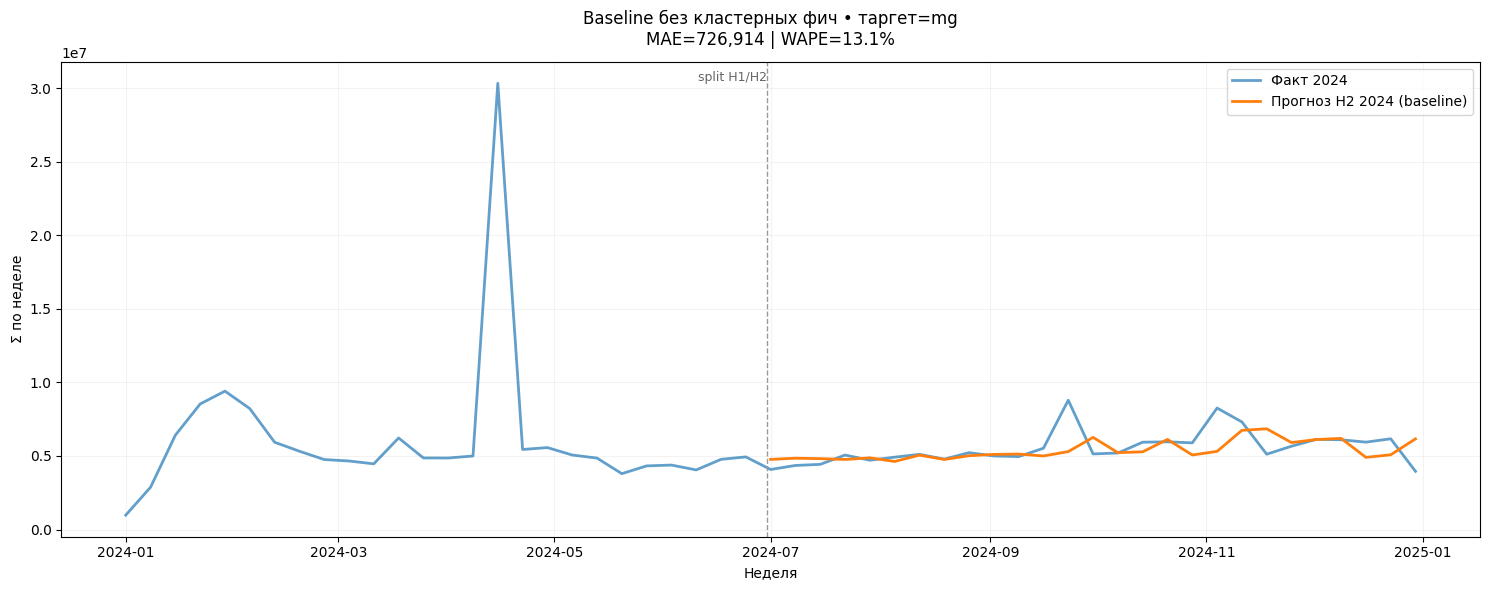


Saved:
 - out_forecast_baseline/baseline_forecast_plot.png
 - out_forecast_baseline/baseline_weekly_forecast_test.csv
 - out_forecast_baseline/baseline_run_meta.json


In [195]:
# -*- coding: utf-8 -*-
# Baseline: H1 2024 train → H2 2024 forecast (NO cluster features)
import os, json, warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# ================= CONFIG =================
DRUG_PATH = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
OUT_DIR   = "out_forecast_baseline"
MODEL_TYPE = "rf"    # "rf" или "ridge"
RANDOM_STATE = 42

UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
VOL_UNITS  = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}

def as_week_start(dt):
    dt = pd.to_datetime(dt, errors="coerce")
    try:
        dt = dt.dt.tz_localize(None)
    except Exception:
        pass
    return dt.dt.to_period("W").dt.start_time

def normalize_mnn(x):
    if pd.isna(x): return x
    s = str(x).strip().lower()
    return " ".join(s.split())

def compute_qty_mg(dose, measure, concentration):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    try:
        dose = float(dose)
    except Exception:
        return np.nan
    if m in UNIT_TO_MG:
        return dose * UNIT_TO_MG[m]
    elif m in VOL_UNITS and pd.notna(concentration):
        try:
            return dose * VOL_UNITS[m] * float(concentration)
        except Exception:
            return np.nan
    return np.nan

def WAPE(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    return float(np.abs(y_true[mask]-y_pred[mask]).sum()/(np.abs(y_true[mask]).sum()+1e-9))

def make_lag_features(df, y_col, lags=(1,2,3,4), rolls=(4,8)):
    df = df.sort_values("week").copy()
    for L in lags:
        df[f"lag_{L}"] = df[y_col].shift(L)
    for R in rolls:
        df[f"roll{R}"] = df[y_col].rolling(R, min_periods=1).mean()
    return df

# =============== LOAD ===============
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
print(">> load drug …")

df = pd.read_csv(DRUG_PATH)
mnn_col = "mnn_norm" if "mnn_norm" in df.columns else "mnn"
if mnn_col not in df.columns:
    raise RuntimeError(f"В файле {DRUG_PATH} нет столбца mnn/mnn_norm")

# дата
date_col = "execution_date" if "execution_date" in df.columns else ("date" if "date" in df.columns else None)
if date_col is None:
    raise RuntimeError("Не нашёл колонку с датой (execution_date или date).")

df["date"] = pd.to_datetime(df[date_col], errors="coerce")
df["week"] = as_week_start(df["date"])

# qty_mg (если нет — считаем из dose/measure/concentration)
if "qty_mg" in df.columns:
    df["qty_mg"] = pd.to_numeric(df["qty_mg"], errors="coerce")
else:
    dose = pd.to_numeric(df.get("dose"), errors="coerce")
    measure = df.get("measure")
    conc = pd.to_numeric(df.get("concentration"), errors="coerce")
    df["qty_mg"] = [compute_qty_mg(d,m,c) for d,m,c in zip(dose,measure,conc)]

# =============== WEEKLY TARGET (only y + its lags/rolls) ===============
weekly_mg = df.groupby("week", dropna=False)["qty_mg"].sum().reset_index()
target_mode = "mg"
if (weekly_mg["qty_mg"].fillna(0).sum() == 0) or (weekly_mg["qty_mg"].isna().mean() > 0.95):
    print("!! qty_mg почти пуст → таргет = count назначений")
    weekly = df.groupby("week", dropna=False)[mnn_col].size().reset_index(name="y")
    target_mode = "count"
else:
    weekly = weekly_mg.rename(columns={"qty_mg":"y"})

weekly["week"] = pd.to_datetime(weekly["week"])
weekly = weekly.sort_values("week")
print("\nПервые 10 недель агрегированных данных:")
print(weekly.head(10))
print("\nПоследние 10 недель агрегированных данных:")
print(weekly.tail(10))

# =============== DESIGN ===============
design = weekly.copy()
design["week"] = pd.to_datetime(design["week"], errors="coerce")
try:
    design["week"] = design["week"].dt.tz_localize(None)
except Exception:
    pass
design = design[design["week"].notna()].copy()

design = make_lag_features(design, y_col="y", lags=(1,2,3,4), rolls=(4,8))
design = design[(design["week"] >= "2024-01-01") & (design["week"] <= "2024-12-31")].copy()

# H1/H2 split
split_date = pd.Timestamp("2024-06-30")
train = design[design["week"] <= split_date].copy()
test  = design[design["week"] >  split_date].copy()

if len(train) < 12 or len(test) < 4:
    raise RuntimeError(f"Недостаточно недель: train={len(train)}, test={len(test)}. Проверь даты в {DRUG_PATH}.")

feat_cols = [c for c in design.columns if c not in ("week","y")]
X_tr, y_tr = train[feat_cols].values, train["y"].values
X_te, y_te = test[feat_cols].values,  test["y"].values

# =============== TRAIN ===============
if MODEL_TYPE == "ridge":
    model = Ridge(alpha=1.0, random_state=RANDOM_STATE)
else:
    model = RandomForestRegressor(n_estimators=400, min_samples_leaf=2, random_state=RANDOM_STATE, n_jobs=-1)
model.fit(X_tr, y_tr)

# =============== PREDICT + METRICS ===============
test = test.copy()
test["y_hat"] = model.predict(X_te)
mae  = mean_absolute_error(y_te, test["y_hat"])
wape = WAPE(y_te, test["y_hat"])
print(f"\n=== BASELINE METRICS ({target_mode}) ===")
print(f"MAE : {mae:,.2f}")
print(f"WAPE: {wape*100:.2f}%")

# =============== PLOT (весь 2024 факт + прогноз на H2) ===============
plt.figure(figsize=(15,6))

# факт за 2024
w2024 = weekly[(weekly["week"] >= "2024-01-01") & (weekly["week"] <= "2024-12-31")].copy()
plt.plot(w2024["week"], w2024["y"], label="Факт 2024", linewidth=2, alpha=0.7)

# прогнозируемый участок
plt.plot(test["week"], test["y_hat"], label="Прогноз H2 2024 (baseline)", linewidth=2)

# вертикальная граница
plt.axvline(pd.Timestamp("2024-06-30"), color="#999999", linestyle="--", linewidth=1)
plt.text(pd.Timestamp("2024-06-30"), plt.ylim()[1]*0.98, "split H1/H2", ha="right", va="top", fontsize=9, color="#666")

plt.title(f"Baseline без кластерных фич • таргет={target_mode}\nMAE={mae:,.0f} | WAPE={wape*100:.1f}%", pad=12)
plt.xlabel("Неделя"); plt.ylabel("Σ по неделе")
plt.grid(alpha=0.15); plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "baseline_forecast_plot.png"), dpi=140)
plt.show()

# =============== SAVE ===============
out_csv = os.path.join(OUT_DIR, "baseline_weekly_forecast_test.csv")
test[["week","y","y_hat"]].to_csv(out_csv, index=False)

meta = {
    "target_mode": target_mode,
    "model_type": MODEL_TYPE,
    "train_weeks": int(len(train)),
    "test_weeks": int(len(test)),
    "metrics": {"MAE": float(mae), "WAPE": float(wape)},
    "features": feat_cols
}
with open(os.path.join(OUT_DIR, "baseline_run_meta.json"), "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print("\nSaved:")
print(" -", os.path.join(OUT_DIR, "baseline_forecast_plot.png"))
print(" -", out_csv)
print(" -", os.path.join(OUT_DIR, "baseline_run_meta.json"))

In [198]:
df_drug

id  event_id  client_id             mnn concentration  dose  \
12       1214294  20662525     444087   Циклофосфамид           NaN  1000   
13       1214295  20662525     444087   Натрия хлорид          0.9%   250   
14       1214296  20662525     444087        Этопозид           NaN   160   
15       1214297  20662525     444087   Натрия хлорид          0.9%   250   
16       1214332  20662525     444087        Этопозид           NaN   300   
...          ...       ...        ...             ...           ...   ...   
1741864  3736572  20751786     502326       Фуросемид           NaN   200   
1741865  3736573  20751786     502326       Фуросемид           NaN   200   
1741979  3739874  20751786     502326  Магния сульфат           NaN    10   
1742010  3739905  20751786     502326   Натрия хлорид          0.9%   250   
1742106  3748996  20751786     502326      Габапентин           NaN   300   

        measure        execution_date                   method  status  \
12           мг  2024-01-03T10:41:19Z             Внутривенный       2   
13           мл  2024-01-03T10:41:19Z             Внутривенный       2   
14           мг  2024-01-03T10:45:08Z             Внутривенный       2   
15           мл  2024-01-03T10:45:08Z             Внутривенный       2   
16           мг  2024-01-03T10:49:05Z        Для приема внутрь       2   
...         ...                   ...                      ...     ...   
1741864      мг  2025-01-28T16:52:31Z  Внутривенный длительная       2   
1741865      мг  2025-01-29T13:09:05Z  Внутривенный длительная       2   
1741979      мл  2025-01-29T19:25:01Z  Внутривенный длительная       2   
1742010      мл  2025-01-29T19:25:00Z  Внутривенный длительная       2   
1742106      мг  2025-01-30T11:39:11Z        Для приема внутрь       2   

        status_name        mnn_norm  
12        выполнено   циклофосфамид  
13        выполнено   натрия хлорид  
14        выполнено        этопозид  
15        выполнено   натрия хлорид  
16        выполнено        этопозид  
...             ...             ...  
1741864   выполнено       фуросемид  
1741865   выполнено       фуросемид  
1741979   выполнено  магния сульфат  
1742010   выполнено   натрия хлорид  
1742106   выполнено      габапентин  

[1076579 rows x 12 columns]

In [202]:
import sys, site, importlib.util
print("Python:", sys.executable)
print("sys.version:", sys.version)
print("user site:", site.getusersitepackages())
print("has lightgbm spec?:", importlib.util.find_spec("lightgbm"))

try:
    import lightgbm as lgb
    print("LightGBM:", lgb.__version__, "->", lgb.__file__)
except Exception as e:
    print("IMPORT ERROR:", repr(e))

Python: /usr/local/bin/python3
sys.version: 3.9.13 (v3.9.13:6de2ca5339, May 17 2022, 11:23:25) 
[Clang 6.0 (clang-600.0.57)]
user site: /Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages
has lightgbm spec?: ModuleSpec(name='lightgbm', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7fcac45a10d0>, origin='/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/lightgbm/__init__.py', submodule_search_locations=['/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/lightgbm'])
IMPORT ERROR: OSError("dlopen(/Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <8FC36893-94B8-343C-9D9F-4CCBFE81B89B> /Users/dimashkhoroshun/Library/Python/3.9/lib/python/site-packages/lightgbm/lib/lib_lightgbm.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/

In [235]:
# -*- coding: utf-8 -*-
# Train on H1 2024 → Forecast H2 2024 using cluster features + cluster lags
# RF & HistGB with RandomizedSearchCV; Prophet (optional); honest walk-forward (no leakage); TOTAL + top-3 clusters
import os, json, warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import dates as mdates
from matplotlib.ticker import FuncFormatter

from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from scipy.stats import randint as sp_randint, uniform as sp_uniform

# ---------- Prophet (опционально) ----------
_HAS_PROPHET = True
try:
    from prophet import Prophet  # pip install prophet
except Exception:
    _HAS_PROPHET = False

# ===================== CONFIG =====================
DRUG_PATH     = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
CLUSTERS_PATH = "cluster_members.csv"    # ['mnn','cluster']
OUT_DIR       = "out_rf_hgb_with_search_and_cluster_lags"

RANDOM_STATE  = 42
SPLIT_DATE    = pd.Timestamp("2024-06-30")    # train: <=, test: >
TARGET_MODE   = "mg"  # если mg пуст — авто-свитч на "count"

# скорость/качество поиска
FAST_MODE     = True
RF_N_ITER     = 35 if FAST_MODE else 70
HGB_N_ITER    = 35 if FAST_MODE else 70
CV_SPLITS     = 3

# Явно указать кластеры; если None — возьмём top-3 в H1
CLUSTERS_3_EXPLICIT = None  # например: [12, 87, 305]

# ===================== helpers =====================
UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
VOL_UNITS  = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}

def as_week_start(dt):
    dt = pd.to_datetime(dt, errors="coerce")
    try: dt = dt.dt.tz_localize(None)
    except Exception: pass
    return dt.dt.to_period("W").dt.start_time

def normalize_mnn(x: str) -> str:
    if pd.isna(x): return x
    return " ".join(str(x).strip().lower().split())

def compute_qty_mg(dose, measure, concentration):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    try: dose = float(dose)
    except Exception: return np.nan
    if m in UNIT_TO_MG:
        return float(dose) * UNIT_TO_MG[m]
    elif m in VOL_UNITS:
        if pd.notna(concentration):
            try: return float(dose) * VOL_UNITS[m] * float(concentration)
            except Exception: return np.nan
        return np.nan
    return np.nan

def WAPE(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    return float(np.abs(y_true[mask]-y_pred[mask]).sum()/(np.abs(y_true[mask]).sum()+1e-9))

def _fmt_thousands(x, _pos=None):
    try: return f"{int(x):,}".replace(",", " ")
    except Exception: return str(x)

def plot_2024_with_h2_forecast(weekly_fact: pd.DataFrame,
                               weekly_pred_h2: pd.DataFrame,
                               y_col: str = "y",
                               yhat_col: str = "y_hat",
                               mae: float = None,
                               wape: float = None,
                               title: str = "Недельный таргет, H1→H2 2024") -> plt.Figure:
    df_fact = weekly_fact.copy(); df_pred = weekly_pred_h2.copy()
    df_fact["week"] = pd.to_datetime(df_fact["week"])
    df_pred["week"] = pd.to_datetime(df_pred["week"])
    df_fact = df_fact[(df_fact["week"] >= "2024-01-01") & (df_fact["week"] <= "2024-12-31")]
    df_pred = df_pred[(df_pred["week"] >= "2024-07-01") & (df_pred["week"] <= "2024-12-31")]
    h2_start = pd.Timestamp("2024-07-01"); h2_end = pd.Timestamp("2024-12-31")

    fig, ax = plt.subplots(figsize=(16,7), dpi=140)
    ax.axvspan(pd.Timestamp("2024-01-01"), h2_start, color="#eef2ff", alpha=0.6, label="Train (H1)")
    ax.axvspan(h2_start, h2_end, color="#fff1f2", alpha=0.6, label="Test (H2)")
    ax.axvline(h2_start, color="#9ca3af", lw=1.5, ls="--")
    ax.plot(df_fact["week"], df_fact[y_col], lw=2.2, color="#1f77b4", label="Факт (весь 2024)")
    if not df_pred.empty:
        ax.plot(df_pred["week"], df_pred[yhat_col], lw=2.4, color="#d62728",
                label="Прогноз (H2)", marker="o", ms=4, alpha=0.9)
        ax.fill_between(df_pred["week"], df_pred[yhat_col], step="mid", alpha=0.08, color="#d62728")
    ax.set_xlim(pd.Timestamp("2024-01-01"), pd.Timestamp("2025-01-01"))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.yaxis.set_major_formatter(FuncFormatter(_fmt_thousands))
    ax.grid(True, which="major", axis="y", alpha=0.25)
    ax.set_xlabel("2024, по месяцам"); ax.set_ylabel("Σ за неделю")
    mtxt = []
    if mae is not None:  mtxt.append(f"MAE={mae:,.0f}".replace(",", " "))
    if wape is not None: mtxt.append(f"WAPE={wape*100:.1f}%")
    ax.set_title(f"{title}{('  ·  ' + '  |  '.join(mtxt)) if mtxt else ''}")
    ax.legend(loc="upper left", bbox_to_anchor=(0, 1.15), ncol=3, frameon=False)
    plt.tight_layout()
    return fig

# ===================== LOAD & STRICT FILTERS =====================
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
print(">> load drug …")
df = pd.read_csv(DRUG_PATH)

mnn_col = "mnn_norm" if "mnn_norm" in df.columns else "mnn"
if mnn_col not in df.columns:
    raise RuntimeError(f"В {DRUG_PATH} нет столбца mnn/mnn_norm")
df[mnn_col] = df[mnn_col].astype(str).map(normalize_mnn)

date_col = "execution_date" if "execution_date" in df.columns else ("date" if "date" in df.columns else None)
if date_col is None:
    raise RuntimeError("Не нашёл колонку с датой (execution_date или date).")
df["date"] = pd.to_datetime(df[date_col], errors="coerce")
df["week"] = as_week_start(df["date"])

# --- жёсткие фильтры событий ---
df["dose_raw"] = pd.to_numeric(df.get("dose"), errors="coerce")
df = df[df["dose_raw"].notna()]
df = df[df["dose_raw"] != 0]                 # убрать аномалии dose==0
if "status" in df.columns:
    df = df[df["status"] == 2]
df = df[df.get("measure").notna()]           # нужна единица измерения

# ===================== qty_mg =====================
if "qty_mg" in df.columns:
    df["qty_mg"] = pd.to_numeric(df["qty_mg"], errors="coerce")
else:
    measure = df.get("measure")
    conc = pd.to_numeric(df.get("concentration"), errors="coerce")
    df["qty_mg"] = [compute_qty_mg(d, m, c) for d, m, c in zip(df["dose_raw"], measure, conc)]

df = df[df["qty_mg"].notna() & (df["qty_mg"] > 0)].copy()

# ===================== CLUSTERS =====================
print(">> load clusters …")
cm = pd.read_csv(CLUSTERS_PATH)
if "mnn" not in cm.columns or "cluster" not in cm.columns:
    raise RuntimeError(f"{CLUSTERS_PATH} должен содержать колонки ['mnn','cluster']")
cm["mnn"] = cm["mnn"].astype(str).map(normalize_mnn)
m2c = cm.set_index("mnn")["cluster"].to_dict()
df["cluster"] = df[mnn_col].map(m2c).fillna(-1).astype(int)

# ===================== WEEKLY TARGET =====================
weekly = df.groupby("week", dropna=False)["qty_mg"].sum().reset_index()
if (weekly["qty_mg"].fillna(0).sum() == 0) or (weekly["qty_mg"].isna().mean() > 0.95):
    print("!! qty_mg почти пуст → таргет = count назначений")
    TARGET_MODE = "count"
    weekly = df.groupby("week", dropna=False)[mnn_col].size().reset_index(name="y")
else:
    weekly = weekly.rename(columns={"qty_mg":"y"})
weekly["week"] = pd.to_datetime(weekly["week"])
weekly = weekly.sort_values("week")

# ===================== CLUSTER FEATURES (per week) =====================
if TARGET_MODE == "mg":
    cl_week = (df[df["cluster"]>=0]
               .groupby(["week","cluster"])["qty_mg"].sum()
               .unstack(fill_value=0))
else:
    cl_week = (df[df["cluster"]>=0]
               .groupby(["week","cluster"])[mnn_col].size()
               .unstack(fill_value=0))
cl_week = cl_week.rename(columns=lambda c: f"cl_{int(c)}")
cl_week.index = pd.to_datetime(cl_week.index)
cl_week = cl_week.reset_index().sort_values("week")

# ===================== choose top-3 clusters for separate targets =====================
if CLUSTERS_3_EXPLICIT is None:
    h1 = cl_week[cl_week["week"] <= SPLIT_DATE].drop(columns=["week"]).sum()
    top3_cols = h1.sort_values(ascending=False).head(3).index.tolist()
    CLUSTERS_3 = [int(c.split("_",1)[1]) for c in top3_cols]
else:
    CLUSTERS_3 = list(CLUSTERS_3_EXPLICIT)
print("Target clusters (3):", CLUSTERS_3)

# ===================== DESIGN builder (target + features + lags) =====================
def build_design(y_df: pd.DataFrame, cl_wide: pd.DataFrame) -> pd.DataFrame:
    design = y_df.merge(cl_wide, on="week", how="left").fillna(0.0)
    design["week"] = pd.to_datetime(design["week"], errors="coerce")
    try: design["week"] = design["week"].dt.tz_localize(None)
    except Exception: pass
    design = design[design["week"].notna()].sort_values("week").reset_index(drop=True)

    # лаги таргета (только на train; на тесте считаются по y_hat)
    for L in (1,2,3,4):
        design[f"lag_{L}"] = design["y"].shift(L)
    for R in (4,8):
        design[f"roll{R}"] = design["y"].rolling(R, min_periods=1).mean()

    # лаги по кластерам (lag1, lag2) — замороженное состояние для теста
    cl_cols = [c for c in design.columns if c.startswith("cl_")]
    for L in (1,2):
        for c in cl_cols:
            design[f"{c}_lag{L}"] = design[c].shift(L)

    need = [f"lag_{L}" for L in (1,2,3,4)] + [f"{c}_lag{L}" for c in cl_cols for L in (1,2)]
    design = design.dropna(subset=need).copy()
    design = design[(design["week"] >= "2024-01-01") & (design["week"] <= "2024-12-31")].copy()
    return design

# TOTAL target
y_total = weekly.rename(columns={"y":"y"})[["week","y"]]
design_total = build_design(y_total, cl_week)

# cluster targets (3)
cluster_designs = {}
for cid in CLUSTERS_3:
    col = f"cl_{cid}"
    if col not in cl_week.columns:
        raise RuntimeError(f"Кластера {cid} нет в фичах")
    y_c = cl_week[["week", col]].rename(columns={col:"y"}).copy()
    design_c = build_design(y_c, cl_week)
    cluster_designs[cid] = design_c

# ===================== split helper =====================
def split_h1_h2(design: pd.DataFrame):
    train = design[design["week"] <= SPLIT_DATE].copy()
    test  = design[design["week"] >  SPLIT_DATE].copy()
    if len(train) < 12 or len(test) < 4:
        raise RuntimeError(f"Недостаточно недель: train={len(train)}, test={len(test)}")
    return train, test

# ===================== model search spaces =====================
def make_rf_search():
    rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
    rf_space = {
        "n_estimATORS":      sp_randint(200, 801),  # noqa: N815
        "max_depth":         [None] + list(range(6, 21)),
        "max_features":      ['sqrt','log2'] + list(np.linspace(0.3, 1.0, 8)),
        "min_samples_leaf":  sp_randint(1, 6),
        "min_samples_split": sp_randint(2, 8),
        "bootstrap":         [True, False],
    }
    # исправление опечатки ключа при передаче в RandomizedSearchCV:
    rf_space["n_estimators"] = rf_space.pop("n_estimATORS")
    return rf, rf_space

def make_hgb_search():
    hgb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
    hgb_space = {
        "max_depth":         sp_randint(3, 13),
        "learning_rate":     sp_uniform(0.02, 0.18),
        "max_iter":          sp_randint(200, 601),
        "min_samples_leaf":  sp_randint(1, 21),
        "l2_regularization": sp_uniform(0.0, 0.2),
    }
    return hgb, hgb_space

def fit_with_search(X, y, model_name="RF"):
    tscv = TimeSeriesSplit(n_splits=CV_SPLITS)
    scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    if model_name.upper()=="RF":
        base, space = make_rf_search(); n_iter = RF_N_ITER
    else:
        base, space = make_hgb_search(); n_iter = HGB_N_ITER
    rnd = RandomizedSearchCV(
        estimator=base,
        param_distributions=space,
        n_iter=n_iter,
        cv=tscv,
        scoring=scorer,
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=0
    )
    rnd.fit(X, y)
    return rnd.best_estimator_, rnd.best_params_

# ===================== honest recursive forecast =====================
def recursive_forecast(train_df, test_df, feat_cols, model,
                       use_frozen_cluster_lags=True, cluster_preds=None):
    y_hist = train_df["y"].tolist()
    cl_lag_cols = [c for c in feat_cols if c.startswith("cl_") and "_lag" in c]
    last_train = train_df.iloc[-1]
    cl_state = {c: float(last_train[c]) for c in cl_lag_cols}

    preds = []
    weeks = test_df["week"].tolist()

    def build_row():
        feats = {}
        for L in (1,2,3,4):
            k = f"lag_{L}"
            if k in feat_cols:
                feats[k] = y_hist[-L] if len(y_hist) >= L else np.nan
        for R in (4,8):
            k = f"roll{R}"
            if k in feat_cols:
                tail = y_hist[-R:] if len(y_hist) else []
                feats[k] = float(np.mean(tail)) if tail else np.nan
        for k in cl_lag_cols:
            feats[k] = cl_state[k]
        return np.array([feats.get(c, 0.0) for c in feat_cols], dtype="float32").reshape(1, -1)

    def advance_cl_state(week_now):
        nonlocal cl_state
        new_state = {}
        for k in cl_lag_cols:
            base = k.split("_lag", 1)[0]
            if k.endswith("_lag2"):
                new_state[k] = cl_state.get(base + "_lag1", cl_state[k])
            elif k.endswith("_lag1"):
                if not use_frozen_cluster_lags and cluster_preds is not None:
                    val = None
                    d = cluster_preds.get(week_now)
                    if d is not None and base in d:
                        val = float(d[base])
                    new_state[k] = cl_state[k] if val is None else val
                else:
                    new_state[k] = cl_state[k]
            else:
                new_state[k] = cl_state[k]
        cl_state = new_state

    for w in weeks:
        x = build_row()
        y_hat = float(model.predict(x)[0])
        preds.append(y_hat)
        y_hist.append(y_hat)
        advance_cl_state(w)

    out = test_df[["week", "y"]].copy()
    out["y_hat"] = preds
    return out

# ===================== Prophet forecast (univariate, честно по датам) =====================
def prophet_forecast(train_df: pd.DataFrame, test_df: pd.DataFrame):
    if not _HAS_PROPHET:
        print("[warn] Prophet не установлен — пропускаю.")
        return None

    df = train_df[["week","y"]].rename(columns={"week":"ds","y":"y"}).copy()
    # лёгкая винсоризация
    q1, q99 = df["y"].quantile([0.01, 0.99])
    df["y"] = df["y"].clip(q1, q99)

    m = Prophet(
        yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False,
        seasonality_mode="additive", changepoint_prior_scale=0.1
    )
    # добавим мягкую годовую сезонность с периодом ≈52 недель
    m.add_seasonality(name="weekly52", period=52, fourier_order=4)

    m.fit(df)

    future = pd.DataFrame({"ds": pd.to_datetime(test_df["week"].values)})
    fcst = m.predict(future)[["ds","yhat"]].rename(columns={"ds":"week","yhat":"y_hat"})
    out = test_df[["week","y"]].merge(fcst, on="week", how="left")
    return out

# ===================== train+predict routine =====================
def train_and_predict(design: pd.DataFrame, tag: str, out_dir: str):
    feat_cols = [c for c in design.columns if c not in ("week","y")]
    train, test = split_h1_h2(design)

    # лёгкая винсоризация таргета на трейне
    tr = train.copy()
    q1, q99 = tr["y"].quantile([0.01, 0.99])
    tr["y"] = tr["y"].clip(q1, q99)

    X_tr, y_tr = tr[feat_cols].values, tr["y"].values

    # RF & HGB search (только на train)
    rf_best,  rf_params  = fit_with_search(X_tr, y_tr, model_name="RF")
    hgb_best, hgb_params = fit_with_search(X_tr, y_tr, model_name="HGB")

    # Честный пошаговый прогноз на H2
    test_rf  = recursive_forecast(train, test, feat_cols, rf_best,  use_frozen_cluster_lags=True)
    test_hgb = recursive_forecast(train, test, feat_cols, hgb_best, use_frozen_cluster_lags=True)

    # Prophet (если доступен) — без фич, только таргет
    test_prophet = prophet_forecast(train, test) if _HAS_PROPHET else None

    # Метрики
    mae_rf,  wape_rf  = mean_absolute_error(test_rf["y"],  test_rf["y_hat"]),  WAPE(test_rf["y"],  test_rf["y_hat"])
    mae_hgb, wape_hgb = mean_absolute_error(test_hgb["y"], test_hgb["y_hat"]), WAPE(test_hgb["y"], test_hgb["y_hat"])
    if test_prophet is not None:
        mae_p, wape_p = mean_absolute_error(test_prophet["y"], test_prophet["y_hat"]), WAPE(test_prophet["y"], test_prophet["y_hat"])
    else:
        mae_p, wape_p = np.inf, np.inf

    # Окна 4/8 недель
    def slice_and_metrics(df_pred, k):
        sl = df_pred.iloc[:k].copy()
        return sl, mean_absolute_error(sl["y"], sl["y_hat"]), WAPE(sl["y"], sl["y_hat"])

    rf_4w,  mae_rf_4,  wape_rf_4  = slice_and_metrics(test_rf, 4)
    rf_8w,  mae_rf_8,  wape_rf_8  = slice_and_metrics(test_rf, 8)
    hgb_4w, mae_hgb_4, wape_hgb_4 = slice_and_metrics(test_hgb, 4)
    hgb_8w, mae_hgb_8, wape_hgb_8 = slice_and_metrics(test_hgb, 8)
    if test_prophet is not None:
        p_4w, mae_p_4, wape_p_4 = slice_and_metrics(test_prophet, 4)
        p_8w, mae_p_8, wape_p_8 = slice_and_metrics(test_prophet, 8)

    # Лучшая модель по WAPE
    best_name, best_df, best_mae, best_wape = "RandomForest", test_rf, mae_rf, wape_rf
    if wape_hgb < best_wape: best_name, best_df, best_mae, best_wape = "HistGBDT", test_hgb, mae_hgb, wape_hgb
    if wape_p   < best_wape: best_name, best_df, best_mae, best_wape = "Prophet",   test_prophet, mae_p, wape_p

    # Печать
    print(f"\n=== {tag} — BEST: {best_name} | MAE={best_mae:,.0f} | WAPE={best_wape*100:.2f}%")
    print(f"RF     : MAE={mae_rf:,.0f},  WAPE={wape_rf*100:.2f}%   | 4w: MAE={mae_rf_4:,.0f},  WAPE={wape_rf_4*100:.2f}%   | 8w: MAE={mae_rf_8:,.0f},  WAPE={wape_rf_8*100:.2f}%")
    print(f"HistGBDT: MAE={mae_hgb:,.0f}, WAPE={wape_hgb*100:.2f}%   | 4w: MAE={mae_hgb_4:,.0f}, WAPE={wape_hgb_4*100:.2f}% | 8w: MAE={mae_hgb_8:,.0f}, WAPE={wape_hgb_8*100:.2f}%")
    if test_prophet is not None:
        print(f"Prophet : MAE={mae_p:,.0f},  WAPE={wape_p*100:.2f}%   | 4w: MAE={mae_p_4:,.0f},  WAPE={wape_p_4*100:.2f}%   | 8w: MAE={mae_p_8:,.0f},  WAPE={wape_p_8*100:.2f}%")
    else:
        print("Prophet : [skip] не установлен")

    # График для лучшей модели
    weekly_2024 = design[["week","y"]].drop_duplicates().copy()
    fig = plot_2024_with_h2_forecast(
        weekly_fact=weekly_2024,
        weekly_pred_h2=best_df[["week","y_hat"]],
        y_col="y", yhat_col="y_hat",
        mae=best_mae, wape=best_wape,
        title=f"{tag}: H1→H2 2024 ({best_name})"
    )
    plot_path = os.path.join(out_dir, f"{tag}_forecast_2024_h2_{best_name}.png")
    fig.savefig(plot_path, dpi=160); plt.close(fig)
    print("[saved]", plot_path)

    # Сохранения
    best_df[["week","y","y_hat"]].to_csv(os.path.join(out_dir, f"{tag}_weekly_forecast_H2_{best_name}.csv"), index=False)
    rf_4w.to_csv(os.path.join(out_dir, f"{tag}_rf_4w.csv"), index=False)
    rf_8w.to_csv(os.path.join(out_dir, f"{tag}_rf_8w.csv"), index=False)
    hgb_4w.to_csv(os.path.join(out_dir, f"{tag}_hgb_4w.csv"), index=False)
    hgb_8w.to_csv(os.path.join(out_dir, f"{tag}_hgb_8w.csv"), index=False)
    if test_prophet is not None:
        test_prophet.to_csv(os.path.join(out_dir, f"{tag}_weekly_forecast_H2_Prophet.csv"), index=False)
        p_4w.to_csv(os.path.join(out_dir, f"{tag}_prophet_4w.csv"), index=False)
        p_8w.to_csv(os.path.join(out_dir, f"{tag}_prophet_8w.csv"), index=False)

    meta = {
        "tag": tag,
        "split_date": str(SPLIT_DATE.date()),
        "target_mode": TARGET_MODE,
        "train_weeks": int(len(train)),
        "test_weeks": int(len(test)),
        "best_model": best_name,
        "metrics": {
            "H2": {"RF": {"MAE": float(mae_rf), "WAPE": float(wape_rf)},
                   "HGB":{"MAE": float(mae_hgb),"WAPE": float(wape_hgb)},
                   "Prophet": {"MAE": float(mae_p), "WAPE": float(wape_p)}},
            "4w": {"RF": {"MAE": float(rf_4w['y'].sub(rf_4w['y_hat']).abs().mean()), "WAPE": float(wape_rf_4)},
                   "HGB":{"MAE": float(hgb_4w['y'].sub(hgb_4w['y_hat']).abs().mean()), "WAPE": float(wape_hgb_4)},
                   "Prophet": ({"MAE": float(p_4w['y'].sub(p_4w['y_hat']).abs().mean()), "WAPE": float(wape_p_4)}
                               if _HAS_PROPHET else None)},
            "8w": {"RF": {"MAE": float(rf_8w['y'].sub(rf_8w['y_hat']).abs().mean()), "WAPE": float(wape_rf_8)},
                   "HGB":{"MAE": float(hgb_8w['y'].sub(hgb_8w['y_hat']).abs().mean()), "WAPE": float(wape_hgb_8)},
                   "Prophet": ({"MAE": float(p_8w['y'].sub(p_8w['y_hat']).abs().mean()), "WAPE": float(wape_p_8)}
                               if _HAS_PROPHET else None)}
        },
        "features_n": int(len(feat_cols))
    }
    with open(os.path.join(out_dir, f"{tag}_run_meta.json"), "w", encoding="utf-8") as f:
        json.dump(meta, f, ensure_ascii=False, indent=2)

    return {
        "best_name": best_name,
        "best_mae": best_mae,
        "best_wape": best_wape
    }

# ===================== RUN =====================
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

print("\n=== RUN TOTAL ===")
res_total = train_and_predict(design_total, "total", OUT_DIR)

print("\n=== RUN 3 CLUSTERS ===")
res_clusters = {}
for cid in CLUSTERS_3:
    res_clusters[cid] = train_and_predict(cluster_designs[cid], f"cluster_{cid}", OUT_DIR)

# ===================== SUMMARY =====================
summary = {
    "split_date": str(SPLIT_DATE.date()),
    "targets": {
        "total": res_total,
        "clusters": {str(k): v for k, v in res_clusters.items()}
    }
}
with open(os.path.join(OUT_DIR, "summary_search.json"), "w", encoding="utf-8") as f:
    json.dump(summary, f, ensure_ascii=False, indent=2)

print("\nArtifacts saved to:", OUT_DIR)
print("- *_forecast_2024_h2_*.png")
print("- *_weekly_forecast_H2_*.csv (включая Prophet, если доступен)")
print("- *_rf_4w.csv / *_rf_8w.csv / *_hgb_4w.csv / *_hgb_8w.csv / *_prophet_4w.csv / *_prophet_8w.csv")
print("- *_run_meta.json")
print("- summary_search.json")

>> load drug …
>> load clusters …
Target clusters (3): [0, 1, 8]

=== RUN TOTAL ===


12:13:19 - cmdstanpy - INFO - Chain [1] start processing
12:13:19 - cmdstanpy - INFO - Chain [1] done processing



=== total — BEST: RandomForest | MAE=911,174 | WAPE=16.61%
RF     : MAE=911,174,  WAPE=16.61%   | 4w: MAE=430,923,  WAPE=9.72%   | 8w: MAE=282,177,  WAPE=6.11%
HistGBDT: MAE=922,530, WAPE=16.81%   | 4w: MAE=434,447, WAPE=9.80% | 8w: MAE=283,939, WAPE=6.14%
Prophet : MAE=3,769,715,  WAPE=68.71%   | 4w: MAE=2,014,597,  WAPE=45.46%   | 8w: MAE=2,650,273,  WAPE=57.34%
[saved] out_rf_hgb_with_search_and_cluster_lags/total_forecast_2024_h2_RandomForest.png

=== RUN 3 CLUSTERS ===


12:13:26 - cmdstanpy - INFO - Chain [1] start processing
12:13:26 - cmdstanpy - INFO - Chain [1] done processing



=== cluster_0 — BEST: RandomForest | MAE=51,337 | WAPE=15.91%
RF     : MAE=51,337,  WAPE=15.91%   | 4w: MAE=29,192,  WAPE=9.42%   | 8w: MAE=27,650,  WAPE=9.03%
HistGBDT: MAE=80,269, WAPE=24.88%   | 4w: MAE=62,316, WAPE=20.10% | 8w: MAE=58,502, WAPE=19.10%
Prophet : MAE=2,307,940,  WAPE=715.44%   | 4w: MAE=1,416,144,  WAPE=456.76%   | 8w: MAE=2,437,242,  WAPE=795.90%
[saved] out_rf_hgb_with_search_and_cluster_lags/cluster_0_forecast_2024_h2_RandomForest.png


12:13:35 - cmdstanpy - INFO - Chain [1] start processing
12:13:35 - cmdstanpy - INFO - Chain [1] done processing



=== cluster_1 — BEST: Prophet | MAE=80,945 | WAPE=21.86%
RF     : MAE=96,902,  WAPE=26.17%   | 4w: MAE=63,993,  WAPE=18.96%   | 8w: MAE=57,826,  WAPE=17.46%
HistGBDT: MAE=106,628, WAPE=28.79%   | 4w: MAE=73,741, WAPE=21.85% | 8w: MAE=67,561, WAPE=20.40%
Prophet : MAE=80,945,  WAPE=21.86%   | 4w: MAE=27,855,  WAPE=8.25%   | 8w: MAE=33,240,  WAPE=10.03%
[saved] out_rf_hgb_with_search_and_cluster_lags/cluster_1_forecast_2024_h2_Prophet.png


12:13:40 - cmdstanpy - INFO - Chain [1] start processing
12:13:40 - cmdstanpy - INFO - Chain [1] done processing



=== cluster_8 — BEST: HistGBDT | MAE=91,656 | WAPE=31.18%
RF     : MAE=93,276,  WAPE=31.73%   | 4w: MAE=42,062,  WAPE=17.28%   | 8w: MAE=52,852,  WAPE=20.79%
HistGBDT: MAE=91,656, WAPE=31.18%   | 4w: MAE=46,947, WAPE=19.29% | 8w: MAE=53,788, WAPE=21.16%
Prophet : MAE=112,307,  WAPE=38.20%   | 4w: MAE=35,199,  WAPE=14.46%   | 8w: MAE=54,051,  WAPE=21.26%
[saved] out_rf_hgb_with_search_and_cluster_lags/cluster_8_forecast_2024_h2_HistGBDT.png

Artifacts saved to: out_rf_hgb_with_search_and_cluster_lags
- *_forecast_2024_h2_*.png
- *_weekly_forecast_H2_*.csv (включая Prophet, если доступен)
- *_rf_4w.csv / *_rf_8w.csv / *_hgb_4w.csv / *_hgb_8w.csv / *_prophet_4w.csv / *_prophet_8w.csv
- *_run_meta.json
- summary_search.json


In [241]:
# -*- coding: utf-8 -*-
# Train on 2024 (weekly) -> Forecast H1 2025 with ARIMA and Prophet (if available)
import os, warnings, json
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import dates as mdates
from matplotlib.ticker import FuncFormatter

# --------- попытка импортировать Prophet ---------
_HAS_PROPHET = True
try:
    from prophet import Prophet          # pip install prophet
except Exception:
    _HAS_PROPHET = False

# --------- ARIMA ---------
import statsmodels.api as sm

# ===================== CONFIG =====================
DRUG_2024 = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
DRUG_2025 = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2025 (1-ое полугодие)/drug_2025.csv"
OUT_DIR   = "out_2024_to_2025_ar_models"

SPLIT_2024_END = pd.Timestamp("2024-12-31")
H1_2025_START  = pd.Timestamp("2025-01-01")
H1_2025_END    = pd.Timestamp("2025-06-30")

RANDOM_STATE = 42

# ===================== helpers =====================
UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
VOL_UNITS  = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}

def as_week_start(dt):
    dt = pd.to_datetime(dt, errors="coerce")
    try: dt = dt.dt.tz_localize(None)
    except Exception: pass
    return dt.dt.to_period("W").dt.start_time

def normalize_mnn(x: str) -> str:
    if pd.isna(x): return x
    return " ".join(str(x).strip().lower().split())

def compute_qty_mg(dose, measure, concentration):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    try: dose = float(dose)
    except Exception: return np.nan
    if m in UNIT_TO_MG:
        return float(dose) * UNIT_TO_MG[m]
    elif m in VOL_UNITS:
        if pd.notna(concentration):
            try: return float(dose) * VOL_UNITS[m] * float(concentration)
            except Exception: return np.nan
        return np.nan
    return np.nan

def WAPE(y_true, y_pred):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    num = np.abs(y_true[mask]-y_pred[mask]).sum()
    den = np.abs(y_true[mask]).sum() + 1e-9
    return float(num/den)

def MAPE(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred) & (np.abs(y_true) > eps)
    if not np.any(mask): return np.nan
    return float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask])))

def _fmt_thousands(x, _pos=None):
    try: return f"{int(x):,}".replace(",", " ")
    except Exception: return str(x)

def weekly_aggregate(path: str) -> pd.DataFrame:
    """Жёсткая чистка, перевод в mg и агрегация по неделям."""
    df = pd.read_csv(path)
    mnn_col = "mnn_norm" if "mnn_norm" in df.columns else "mnn"
    if mnn_col not in df.columns:
        raise RuntimeError(f"В {path} нет столбца mnn/mnn_norm")
    df[mnn_col] = df[mnn_col].astype(str).map(normalize_mnn)

    date_col = "execution_date" if "execution_date" in df.columns else ("date" if "date" in df.columns else None)
    if date_col is None:
        raise RuntimeError(f"Не нашёл колонку с датой в {path}")
    df["date"] = pd.to_datetime(df[date_col], errors="coerce")
    df["week"] = as_week_start(df["date"])

    # убрать аномалии по dose
    df["dose_raw"] = pd.to_numeric(df.get("dose"), errors="coerce")
    df = df[df["dose_raw"].notna()]
    df = df[df["dose_raw"] != 0]
    df = df[df.get("measure").notna()]
    if "status" in df.columns:
        df = df[df["status"] == 2]

    # qty_mg
    if "qty_mg" in df.columns:
        df["qty_mg"] = pd.to_numeric(df["qty_mg"], errors="coerce")
    else:
        measure = df.get("measure")
        conc = pd.to_numeric(df.get("concentration"), errors="coerce")
        df["qty_mg"] = [compute_qty_mg(d, m, c) for d, m, c in zip(df["dose_raw"], measure, conc)]

    df = df[df["qty_mg"].notna() & (df["qty_mg"] > 0)].copy()

    weekly = df.groupby("week", dropna=False)["qty_mg"].sum().reset_index()
    weekly = weekly.sort_values("week")
    weekly["week"] = pd.to_datetime(weekly["week"])
    return weekly.rename(columns={"qty_mg":"y"})

def plot_forecast(fact_2025: pd.DataFrame, pred: pd.DataFrame, title: str, out_path: str,
                  mae: float, wape: float, mape: float):
    df_f = fact_2025.copy()
    df_p = pred.copy()
    df_f["week"] = pd.to_datetime(df_f["week"])
    df_p["week"] = pd.to_datetime(df_p["week"])

    fig, ax = plt.subplots(figsize=(16,7), dpi=140)

    # фон — H1 2025
    ax.axvspan(H1_2025_START, H1_2025_END, color="#fff7ed", alpha=0.8, label="H1 2025 (fact)")

    # факт 2025
    ax.plot(df_f["week"], df_f["y"], lw=2.4, label="Факт (H1 2025)")

    # прогноз
    if not df_p.empty:
        ax.plot(df_p["week"], df_p["y_hat"], lw=2.4, marker="o", ms=4, label="Прогноз (из 2024)")
        ax.fill_between(df_p["week"], df_p["y_hat"], step="mid", alpha=0.08)

    # оси/стиль
    ax.set_xlim(pd.Timestamp("2024-11-15"), pd.Timestamp("2025-07-10"))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.yaxis.set_major_formatter(FuncFormatter(_fmt_thousands))
    ax.grid(True, axis="y", alpha=0.25)
    ax.set_ylabel("Σ за неделю (mg)")

    ax.set_title(
        f"{title}  ·  MAE={mae:,.0f}  |  WAPE={wape*100:.1f}%  |  MAPE={mape*100:.1f}%".replace(",", " ")
    )
    ax.legend(loc="upper left", frameon=False)

    plt.tight_layout()
    fig.savefig(out_path, dpi=160)
    plt.close(fig)
    print(f"[saved] {out_path}")

# ===================== MAIN =====================
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

print(">> aggregate 2024 …")
weekly_2024 = weekly_aggregate(DRUG_2024)
weekly_2024 = weekly_2024[(weekly_2024["week"] >= "2024-01-01") & (weekly_2024["week"] <= "2024-12-31")]

print(">> aggregate 2025 (fact for H1) …")
weekly_2025 = weekly_aggregate(DRUG_2025)
fact_h1_2025 = weekly_2025[(weekly_2025["week"] >= H1_2025_START) & (weekly_2025["week"] <= H1_2025_END)].copy()

# ---------- ARIMA ----------
print("\n>> Fit ARIMA on 2024 …")
y = weekly_2024.set_index("week")["y"].asfreq("W-MON")  # неделя начинается в понедельник
y = y.fillna(0.0)

best_aic, best_order, best_model = np.inf, None, None
for p in range(0, 4):
    for d in (0, 1):
        for q in range(0, 4):
            try:
                mdl = sm.tsa.ARIMA(y, order=(p,d,q)).fit()
                if mdl.aic < best_aic:
                    best_aic, best_order, best_model = mdl.aic, (p,d,q), mdl
            except Exception:
                pass
print(f"Best ARIMA order={best_order}, AIC={best_aic:.1f}")

n_weeks = len(fact_h1_2025)
arima_forecast = best_model.forecast(steps=n_weeks)
arima_df = pd.DataFrame({
    "week": pd.date_range(H1_2025_START, periods=n_weeks, freq="W-MON"),
    "y_hat": np.asarray(arima_forecast, float)
})

merged_a = fact_h1_2025.merge(arima_df, on="week", how="inner")
mae_a  = np.abs(merged_a["y"] - merged_a["y_hat"]).mean()
wape_a = WAPE(merged_a["y"].values, merged_a["y_hat"].values)
mape_a = MAPE(merged_a["y"].values, merged_a["y_hat"].values)

plot_forecast(
    fact_2025=fact_h1_2025,
    pred=arima_df,
    title=f"H1 2025: факт vs прогноз (обучение только на 2024) · ARIMA{best_order}",
    out_path=os.path.join(OUT_DIR, "H1_2025_forecast_ARIMA.png"),
    mae=mae_a, wape=wape_a, mape=mape_a
)

# ---------- Prophet (если доступен) ----------
if _HAS_PROPHET:
    print("\n>> Fit Prophet on 2024 …")
    df_p = weekly_2024.rename(columns={"week":"ds", "y":"y"}).copy()
    q1, q99 = df_p["y"].quantile([0.01, 0.99])
    df_p["y"] = df_p["y"].clip(q1, q99)

    m = Prophet(
        yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False,
        seasonality_mode="additive", changepoint_prior_scale=0.1
    )
    m.add_seasonality(name='weekly', period=52, fourier_order=4)

    m.fit(df_p)

    future = pd.DataFrame({"ds": pd.date_range(H1_2025_START, H1_2025_END, freq="W-MON")})
    fcst  = m.predict(future)[["ds","yhat"]].rename(columns={"ds":"week","yhat":"y_hat"})

    merged_p = fact_h1_2025.merge(fcst, on="week", how="inner")
    mae_p  = np.abs(merged_p["y"] - merged_p["y_hat"]).mean()
    wape_p = WAPE(merged_p["y"].values, merged_p["y_hat"].values)
    mape_p = MAPE(merged_p["y"].values, merged_p["y_hat"].values)

    plot_forecast(
        fact_2025=fact_h1_2025,
        pred=fcst,
        title=f"H1 2025: факт vs прогноз (обучение только на 2024) · Prophet",
        out_path=os.path.join(OUT_DIR, "H1_2025_forecast_Prophet.png"),
        mae=mae_p, wape=wape_p, mape=mape_p
    )
else:
    print("\n[warn] Prophet не установлен — пропускаю Prophet-прогноз.")
    mae_p = wape_p = mape_p = None

# ---------- сохранить метрики ----------
metrics = {
    "h1_2025_weeks": int(len(fact_h1_2025)),
    "ARIMA": {"order": best_order, "MAE": float(mae_a), "WAPE": float(wape_a), "MAPE": float(mape_a)},
}
if _HAS_PROPHET and mape_p is not None:
    metrics["Prophet"] = {"MAE": float(mae_p), "WAPE": float(wape_p), "MAPE": float(mape_p)}

with open(os.path.join(OUT_DIR, "metrics_h1_2025.json"), "w", encoding="utf-8") as f:
    json.dump(metrics, f, ensure_ascii=False, indent=2)

print("\n=== RESULTS ===")
print(f"ARIMA{best_order}: MAE={mae_a:,.0f}, WAPE={wape_a*100:.2f}%, MAPE={mape_a*100:.2f}%".replace(",", " "))
if _HAS_PROPHET and mape_p is not None:
    print(f"Prophet      : MAE={mae_p:,.0f}, WAPE={wape_p*100:.2f}%, MAPE={mape_p*100:.2f}%".replace(",", " "))
print(f"\nArtifacts -> {OUT_DIR}")

>> aggregate 2024 …
>> aggregate 2025 (fact for H1) …

>> Fit ARIMA on 2024 …


12:27:15 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order=(0, 1, 1), AIC=1731.3
[saved] out_2024_to_2025_ar_models/H1_2025_forecast_ARIMA.png

>> Fit Prophet on 2024 …


12:27:15 - cmdstanpy - INFO - Chain [1] done processing


[saved] out_2024_to_2025_ar_models/H1_2025_forecast_Prophet.png

=== RESULTS ===
ARIMA(0  1  1): MAE=1 299 052  WAPE=22.87%  MAPE=26.75%
Prophet      : MAE=1 328 524  WAPE=23.38%  MAPE=25.87%

Artifacts -> out_2024_to_2025_ar_models


In [247]:
# -*- coding: utf-8 -*-
# Prophet (daily). Два графика: total (без кластеров) и лучший кластер из top-3.
# На графиках и в CSV выводятся MAE / WAPE / MAPE.

import os, json, warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import dates as mdates
from matplotlib.ticker import FuncFormatter
from prophet import Prophet  # pip install prophet

# ====== CONFIG ======
DRUG_PATH      = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
CLUSTERS_PATH  = "cluster_members.csv"   # ['mnn','cluster']
OUT_DIR        = "out_prophet_daily_total_and_top3"
HORIZON_DAYS   = 91                      # ~3 месяца
RANDOM_STATE   = 42

# ====== helpers ======
UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
VOL_UNITS  = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}

def to_naive_datetime(s):
    s = pd.to_datetime(s, errors="coerce")
    try:
        return s.dt.tz_localize(None)
    except Exception:
        try:
            return s.tz_localize(None)
        except Exception:
            return s

def normalize_mnn(x: str) -> str:
    if pd.isna(x): return x
    return " ".join(str(x).strip().lower().split())

def compute_qty_mg(dose, measure, concentration):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    try: dose = float(dose)
    except Exception: return np.nan
    if m in UNIT_TO_MG:
        return float(dose) * UNIT_TO_MG[m]
    elif m in VOL_UNITS:
        if pd.notna(concentration):
            try: return float(dose) * VOL_UNITS[m] * float(concentration)
            except Exception: return np.nan
        return np.nan
    return np.nan

def _fmt_thousands(x, _pos=None):
    try: return f"{int(x):,}".replace(",", " ")
    except Exception: return str(x)

def WAPE(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    den = np.abs(y_true[mask]).sum()
    return float(np.abs(y_true[mask]-y_pred[mask]).sum() / (den + 1e-9))

def MAPE(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred) & (np.abs(y_true) > eps)
    if not np.any(mask): return np.nan
    return float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask])))

def compute_metrics(fact_df, pred_df):
    """На пересечении дат fact vs forecast вычислить MAE/WAPE/MAPE.
       Если факта в окне нет — вернём NaN, но подпишем это на графике."""
    merged = fact_df.merge(pred_df, on="date", how="inner")
    if merged.empty:
        return np.nan, np.nan, np.nan
    mae  = float(np.abs(merged["y"] - merged["y_hat"]).mean())
    wape = WAPE(merged["y"].values, merged["y_hat"].values)
    mape = MAPE(merged["y"].values, merged["y_hat"].values)
    return mae, wape, mape

def daily_aggregate_total_and_clusters(drug_path: str, clusters_path: str):
    """Возвращает:
       total_daily: ['date','y']
       cl_daily_wide: ['date','cl_<id>', ...]
       top3_ids: [id0,id1,id2]
       mapping: dict cluster_id -> list of mnn (норм.)
    """
    df = pd.read_csv(drug_path)

    # mnn
    mnn_col = "mnn_norm" if "mnn_norm" in df.columns else "mnn"
    if mnn_col not in df.columns:
        raise RuntimeError(f"В {drug_path} нет столбца mnn/mnn_norm")
    df[mnn_col] = df[mnn_col].astype(str).map(normalize_mnn)

    # дата
    date_col = "execution_date" if "execution_date" in df.columns else ("date" if "date" in df.columns else None)
    if date_col is None:
        raise RuntimeError("Не нашёл колонку с датой")
    df["date"] = to_naive_datetime(pd.to_datetime(df[date_col], errors="coerce"))
    df["date"] = to_naive_datetime(df["date"].dt.floor("D"))

    # строгие фильтры
    df["dose_raw"] = pd.to_numeric(df.get("dose"), errors="coerce")
    df = df[df["dose_raw"].notna()]
    df = df[df["dose_raw"] != 0]                   # убрать аномалии dose==0
    if "status" in df.columns:
        df = df[df["status"] == 2]
    df = df[df.get("measure").notna()]

    # qty_mg
    if "qty_mg" in df.columns:
        df["qty_mg"] = pd.to_numeric(df["qty_mg"], errors="coerce")
    else:
        measure = df.get("measure")
        conc = pd.to_numeric(df.get("concentration"), errors="coerce")
        df["qty_mg"] = [compute_qty_mg(d, m, c) for d, m, c in zip(df["dose_raw"], measure, conc)]

    df = df[df["qty_mg"].notna() & (df["qty_mg"] > 0)].copy()

    # clusters map
    cm = pd.read_csv(clusters_path)
    if "mnn" not in cm.columns or "cluster" not in cm.columns:
        raise RuntimeError(f"{clusters_path} должен содержать ['mnn','cluster']")
    cm["mnn"] = cm["mnn"].astype(str).map(normalize_mnn)
    c_map = cm.set_index("mnn")["cluster"].to_dict()
    df["cluster"] = df[mnn_col].map(c_map).fillna(-1).astype(int)

    # total daily
    total_daily = (df.groupby("date", dropna=False)["qty_mg"].sum()
                     .rename("y").reset_index()
                     .sort_values("date"))
    total_daily["date"] = to_naive_datetime(total_daily["date"])

    # clusters daily wide (только cluster>=0)
    cl = df[df["cluster"] >= 0].copy()
    cl_daily = (cl.groupby(["date","cluster"])["qty_mg"].sum().unstack(fill_value=0))
    cl_daily = cl_daily.rename(columns=lambda c: f"cl_{int(c)}").reset_index().sort_values("date")
    cl_daily["date"] = to_naive_datetime(cl_daily["date"])

    # top-3 (по сумме за весь период)
    sum_by_cluster = cl_daily.drop(columns=["date"]).sum().sort_values(ascending=False)
    top3_cols = sum_by_cluster.head(3).index.tolist()
    top3_ids = [int(c.split("_",1)[1]) for c in top3_cols]

    # mapping cluster -> list of mnn
    mnn_by_cluster = (cm.groupby("cluster")["mnn"]
                        .apply(lambda s: sorted(set(s.dropna().tolist())))
                        .to_dict())

    return total_daily, cl_daily, top3_ids, mnn_by_cluster

def ensure_daily_continuity(df_date_y: pd.DataFrame):
    """Заполнить пропуски календаря нулями."""
    df = df_date_y.copy()
    df["date"] = to_naive_datetime(df["date"])
    full = pd.DataFrame({"date": pd.date_range(df["date"].min(), df["date"].max(), freq="D")})
    df = full.merge(df, on="date", how="left").fillna({"y":0.0})
    return df

def fit_prophet_and_forecast(df_y_daily: pd.DataFrame, horizon_days: int):
    """df_y_daily: ['date','y'] → прогноз на horizon_days (дней)."""
    df = df_y_daily.copy().rename(columns={"date":"ds","y":"y"})
    df["ds"] = to_naive_datetime(df["ds"])
    df = df.sort_values("ds")
    # легкая винсоризация
    q1, q99 = df["y"].quantile([0.01,0.99])
    df["y"] = df["y"].clip(q1, q99)

    m = Prophet(
        yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False,
        seasonality_mode="additive", changepoint_prior_scale=0.1
    )
    m.add_seasonality(name="yearish", period=365.25, fourier_order=6)
    m.add_seasonality(name="weekly",  period=7, fourier_order=3)
    m.fit(df)

    last_day = df["ds"].max()
    future = pd.DataFrame({"ds": pd.date_range(last_day + pd.Timedelta(days=1),
                                               periods=horizon_days, freq="D")})
    fcst = m.predict(future)[["ds","yhat"]].rename(columns={"ds":"date","yhat":"y_hat"})
    fcst["date"] = to_naive_datetime(fcst["date"])
    return fcst, m

def plot_fact_forecast(df_hist: pd.DataFrame, df_pred: pd.DataFrame, title: str, out_path: str,
                       mae=None, wape=None, mape=None):
    hist = df_hist.copy(); pred = df_pred.copy()
    hist["date"] = to_naive_datetime(hist["date"]); pred["date"] = to_naive_datetime(pred["date"])

    fig, ax = plt.subplots(figsize=(14,6), dpi=140)
    ax.plot(hist["date"], hist["y"], lw=2.2, label="Факт (дневной)")
    ax.plot(pred["date"], pred["y_hat"], lw=2.2, marker="o", ms=3.5, label="Прогноз (Prophet)")
    ax.fill_between(pred["date"], pred["y_hat"], alpha=0.08)

    ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
    ax.yaxis.set_major_formatter(FuncFormatter(_fmt_thousands))
    ax.grid(True, axis="y", alpha=0.25)
    ax.set_ylabel("Σ за день (mg)")

    met = []
    met.append(f"MAE={0 if not np.isfinite(mae) else mae:,.0f}".replace(",", " "))
    met.append(f"WAPE={0 if not np.isfinite(wape) else wape*100:.1f}%")
    met.append(f"MAPE={0 if not np.isfinite(mape) else mape*100:.1f}%")
    ax.set_title(f"{title}  ·  " + "  |  ".join(met))
    ax.legend(loc="upper left", frameon=False)

    plt.tight_layout()
    fig.savefig(out_path, dpi=160)
    plt.close(fig)
    print(f"[saved] {out_path}")

# ====== RUN ======
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

print(">> load & prepare …")
total_daily, cl_daily_wide, TOP3, mnn_map = daily_aggregate_total_and_clusters(DRUG_PATH, CLUSTERS_PATH)
# непрерывный календарь
total_daily = ensure_daily_continuity(total_daily)

# выберем ЛУЧШИЙ кластер = самый крупный по сумме за весь период
sum_by_cluster = cl_daily_wide.drop(columns=["date"]).sum().sort_values(ascending=False)
best_cluster_col = sum_by_cluster.index[0]          # например 'cl_0'
best_cluster_id  = int(best_cluster_col.split("_",1)[1])
cluster_daily    = cl_daily_wide[["date", best_cluster_col]].rename(columns={best_cluster_col:"y"})
cluster_daily    = ensure_daily_continuity(cluster_daily)

# ---- ПРОГНОЗ БЕЗ КЛАСТЕРОВ (TOTAL) ----
pred_total, mdl_total = fit_prophet_and_forecast(total_daily, HORIZON_DAYS)
mae_t, wape_t, mape_t = compute_metrics(total_daily, pred_total)
plot_fact_forecast(
    total_daily, pred_total,
    title=f"TOTAL (без кластеров) · Prophet · 3m",
    out_path=os.path.join(OUT_DIR, "total_prophet_3m_plot.png"),
    mae=mae_t, wape=wape_t, mape=mape_t
)

# ---- ПРОГНОЗ С КЛАСТЕРОМ (ЛУЧШИЙ CLUSTER) ----
pred_cl, mdl_cl = fit_prophet_and_forecast(cluster_daily, HORIZON_DAYS)
mae_c, wape_c, mape_c = compute_metrics(cluster_daily, pred_cl)
plot_fact_forecast(
    cluster_daily, pred_cl,
    title=f"CLUSTER {best_cluster_id} · Prophet · 3m",
    out_path=os.path.join(OUT_DIR, f"cluster_{best_cluster_id}_prophet_3m_plot.png"),
    mae=mae_c, wape=wape_c, mape=mape_c
)

# ---- Метрики и метаданные ----
pd.DataFrame([
    {"target":"total", "horizon_days":HORIZON_DAYS, "MAE":mae_t, "WAPE":wape_t, "MAPE":mape_t},
    {"target":f"cluster_{best_cluster_id}", "horizon_days":HORIZON_DAYS, "MAE":mae_c, "WAPE":wape_c, "MAPE":mape_c},
]).to_csv(os.path.join(OUT_DIR, "metrics_3m.csv"), index=False)

with open(os.path.join(OUT_DIR, "run_meta.json"), "w", encoding="utf-8") as f:
    json.dump({
        "source": os.path.basename(DRUG_PATH),
        "clusters_file": os.path.basename(CLUSTERS_PATH),
        "horizon_days": HORIZON_DAYS,
        "best_cluster": best_cluster_id,
        "best_cluster_mnn": mnn_map.get(best_cluster_id, []),
        "last_history_date": str(to_naive_datetime(total_daily['date']).max().date())
    }, f, ensure_ascii=False, indent=2)

print("\nArtifacts saved to:", OUT_DIR)
print(" - total_prophet_3m_plot.png")
print(f" - cluster_{best_cluster_id}_prophet_3m_plot.png")
print(" - metrics_3m.csv, run_meta.json")

>> load & prepare …


13:00:38 - cmdstanpy - INFO - Chain [1] start processing
13:00:38 - cmdstanpy - INFO - Chain [1] done processing
13:00:38 - cmdstanpy - INFO - Chain [1] start processing
13:00:38 - cmdstanpy - INFO - Chain [1] done processing


[saved] out_prophet_daily_total_and_top3/total_prophet_3m_plot.png
[saved] out_prophet_daily_total_and_top3/cluster_0_prophet_3m_plot.png

Artifacts saved to: out_prophet_daily_total_and_top3
 - total_prophet_3m_plot.png
 - cluster_0_prophet_3m_plot.png
 - metrics_3m.csv, run_meta.json


In [250]:
# -*- coding: utf-8 -*-
# Train on 2024 (weekly) -> Forecast first 3 months of 2025
# Фокус: лучший кластер (по сумме за 2024) как единственный внешний регрессор в Prophet.
import os, warnings, json
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import dates as mdates
from matplotlib.ticker import FuncFormatter

# -------- Prophet --------
_HAS_PROPHET = True
try:
    from prophet import Prophet
except Exception:
    _HAS_PROPHET = False

# -------- ARIMA --------
import statsmodels.api as sm

# ===================== CONFIG =====================
DRUG_2024 = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv"
DRUG_2025 = "/Users/dimashkhoroshun/Downloads/Hackaton - 2025/Год - 2025 (1-ое полугодие)/drug_2025.csv"
CLUSTERS_PATH = "/Users/dimashkhoroshun/Desktop/cluster_artifacts_final/cluster_members.csv"
OUT_DIR   = "out_best_cluster_exog_3m"

FORECAST_START = pd.Timestamp("2025-01-01")
HORIZON_WEEKS  = 13                            # ~= 3 месяца (13 недель)
REGRESSOR_LAG  = 1
CLUSTER_REG_MODE = "prophet"                   # 'freeze' | 'prophet'

# ===================== helpers =====================
UNIT_TO_MG = {"мг":1.0,"mg":1.0,"г":1000.0,"гр":1000.0,"g":1000.0,"мкг":0.001,"mcg":0.001,"µg":0.001}
VOL_UNITS  = {"мл":1.0,"ml":1.0,"л":1000.0,"l":1000.0}

def as_week_start(dt):
    dt = pd.to_datetime(dt, errors="coerce")
    try: dt = dt.dt.tz_localize(None)
    except Exception: pass
    return dt.dt.to_period("W").dt.start_time

def normalize_mnn(x: str) -> str:
    if pd.isna(x): return x
    return " ".join(str(x).strip().lower().split())

def compute_qty_mg(dose, measure, concentration):
    if pd.isna(dose) or pd.isna(measure): return np.nan
    m = str(measure).strip().lower()
    try: dose = float(dose)
    except Exception: return np.nan
    if m in UNIT_TO_MG:
        return float(dose) * UNIT_TO_MG[m]
    elif m in VOL_UNITS:
        if pd.notna(concentration):
            try: return float(dose) * VOL_UNITS[m] * float(concentration)
            except Exception: return np.nan
        return np.nan
    return np.nan

def WAPE(y_true, y_pred):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    num = np.abs(y_true[mask]-y_pred[mask]).sum()
    den = np.abs(y_true[mask]).sum() + 1e-9
    return float(num/den)

def MAPE(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred) & (np.abs(y_true) > eps)
    if not np.any(mask): return np.nan
    return float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask])))

def MAPE_AREA(y_true, y_pred, eps=1e-9):
    """MAPE по площадям (интегралам) за окно прогноза: |sum(y)-sum(y_hat)| / sum(y)."""
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    A_true = float(np.nansum(np.abs(y_true[mask])))
    A_pred = float(np.nansum(np.abs(y_pred[mask])))
    if A_true <= eps: return np.nan
    return abs(A_true - A_pred) / A_true

def _fmt_thousands(x, _pos=None):
    try: return f"{int(x):,}".replace(",", " ")
    except Exception: return str(x)

def weekly_aggregate(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    mnn_col = "mnn_norm" if "mnn_norm" in df.columns else "mnn"
    if mnn_col not in df.columns:
        raise RuntimeError(f"В {path} нет столбца mnn/mnn_norm")
    df[mnn_col] = df[mnn_col].astype(str).map(normalize_mnn)

    date_col = "execution_date" if "execution_date" in df.columns else ("date" if "date" in df.columns else None)
    if date_col is None: raise RuntimeError(f"Не нашёл колонку с датой в {path}")
    df["date"] = pd.to_datetime(df[date_col], errors="coerce")
    df["week"] = as_week_start(df["date"])

    df["dose_raw"] = pd.to_numeric(df.get("dose"), errors="coerce")
    df = df[df["dose_raw"].notna() & (df["dose_raw"] != 0)]
    if "status" in df.columns: df = df[df["status"] == 2]
    df = df[df.get("measure").notna()]

    if "qty_mg" in df.columns:
        df["qty_mg"] = pd.to_numeric(df["qty_mg"], errors="coerce")
    else:
        measure = df.get("measure")
        conc = pd.to_numeric(df.get("concentration"), errors="coerce")
        df["qty_mg"] = [compute_qty_mg(d, m, c) for d,m,c in zip(df["dose_raw"], measure, conc)]
    df = df[df["qty_mg"].notna() & (df["qty_mg"] > 0)].copy()

    weekly = df.groupby("week", dropna=False)["qty_mg"].sum().reset_index()
    weekly = weekly.sort_values("week")
    weekly["week"] = pd.to_datetime(weekly["week"])
    return weekly.rename(columns={"qty_mg":"y"})

def cluster_weekly_aggregate(path: str, clusters_path: str):
    df = pd.read_csv(path)
    mnn_col = "mnn_norm" if "mnn_norm" in df.columns else "mnn"
    if mnn_col not in df.columns: raise RuntimeError(f"В {path} нет mnn/mnn_norm")
    df[mnn_col] = df[mnn_col].astype(str).map(normalize_mnn)

    date_col = "execution_date" if "execution_date" in df.columns else ("date" if "date" in df.columns else None)
    if date_col is None: raise RuntimeError(f"Не нашёл колонку с датой в {path}")
    df["date"] = pd.to_datetime(df[date_col], errors="coerce")
    df["week"] = as_week_start(df["date"])

    df["dose_raw"] = pd.to_numeric(df.get("dose"), errors="coerce")
    df = df[df["dose_raw"].notna() & (df["dose_raw"] != 0)]
    if "status" in df.columns: df = df[df["status"] == 2]
    df = df[df.get("measure").notna()]

    if "qty_mg" in df.columns:
        df["qty_mg"] = pd.to_numeric(df["qty_mg"], errors="coerce")
    else:
        measure = df.get("measure")
        conc = pd.to_numeric(df.get("concentration"), errors="coerce")
        df["qty_mg"] = [compute_qty_mg(d, m, c) for d,m,c in zip(df["dose_raw"], measure, conc)]
    df = df[df["qty_mg"].notna() & (df["qty_mg"] > 0)].copy()

    cm = pd.read_csv(clusters_path)
    if "mnn" not in cm.columns or "cluster" not in cm.columns:
        raise RuntimeError(f"{clusters_path} должен содержать ['мnn','cluster']")
    cm["mnn"] = cm["mnn"].astype(str).map(normalize_mnn)
    m2c = cm.set_index("mnn")["cluster"].to_dict()
    df["cluster"] = df[mnn_col].map(m2c).fillna(-1).astype(int)

    cl_week = (df[df["cluster"]>=0]
               .groupby(["week","cluster"])["qty_mg"].sum()
               .unstack(fill_value=0)
               .rename(columns=lambda c: f"cl_{int(c)}"))
    cl_week.index = pd.to_datetime(cl_week.index)
    cl_week = cl_week.reset_index().sort_values("week")
    return cl_week, cm

def plot_weekly(fact_slice: pd.DataFrame, pred: pd.DataFrame, title: str, out_path: str,
                mae: float, wape: float, mape: float, mape_area: float,
                span_start: pd.Timestamp, span_end: pd.Timestamp):
    df_f = fact_slice.copy(); df_p = pred.copy()
    df_f["week"] = pd.to_datetime(df_f["week"]); df_p["week"] = pd.to_datetime(df_p["week"])

    fig, ax = plt.subplots(figsize=(16,7), dpi=140)
    ax.axvspan(span_start, span_end, color="#fff7ed", alpha=0.8, label="Факт (окно оценки)")
    ax.plot(df_f["week"], df_f["y"], lw=2.4, label="Факт")
    if not df_p.empty:
        ax.plot(df_p["week"], df_p["y_hat"], lw=2.4, marker="o", ms=4, label="Прогноз (из 2024)")
        ax.fill_between(df_p["week"], df_p["y_hat"], step="mid", alpha=0.08)

    pad_days = 20
    ax.set_xlim(span_start - pd.Timedelta(days=pad_days), span_end + pd.Timedelta(days=7))
    ax.xaxis.set_major_locator(mdates.MonthLocator()); ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.yaxis.set_major_formatter(FuncFormatter(_fmt_thousands)); ax.grid(True, axis="y", alpha=0.25)
    ax.set_ylabel("Σ за неделю (mg)")

    parts = [f"MAE={mae:,.0f}".replace(",", " "),
             f"WAPE={wape*100:.1f}%",
             f"MAPE={mape*100:.1f}%",
             f"MAPE_area={mape_area*100:.1f}%"]
    ax.set_title(f"{title}  ·  " + "  |  ".join(parts))
    ax.legend(loc="upper left", frameon=False)
    plt.tight_layout(); fig.savefig(out_path, dpi=160); plt.close(fig); print(f"[saved] {out_path}")

# ---------- Prophet с ОДНИМ регрессором = лучший кластер ----------
def fit_prophet_best_cluster(
    weekly_y_2024: pd.DataFrame,
    cl_week_2024: pd.DataFrame,
    forecast_weeks,                   # список недель W-MON на 3 месяца
    best_cluster_col: str,            # 'cl_<id>'
    regress_lag: int = 1,
    external_reg_forecast: pd.DataFrame | None = None,  # ['week', best_cluster_col]
):
    if not _HAS_PROPHET: raise RuntimeError("Prophet не установлен")

    reg_cols = [best_cluster_col]
    design = weekly_y_2024.merge(cl_week_2024[["week"] + reg_cols], on="week", how="left").fillna(0.0)
    design = design.sort_values("week").reset_index(drop=True)
    for c in reg_cols:
        design[f"{c}_lag{regress_lag}"] = design[c].shift(regress_lag)
    train = design.dropna(subset=[f"{c}_lag{regress_lag}" for c in reg_cols]).copy()
    df_tr = train.rename(columns={"week":"ds","y":"y"})[["ds","y"] + [f"{c}_lag{regress_lag}" for c in reg_cols]]

    # Регрессоры на окно прогноза (3 мес.)
    if external_reg_forecast is None:
        last_row = train.iloc[-1]
        future_regs = pd.DataFrame({"week": forecast_weeks})
        for c in reg_cols:
            future_regs[f"{c}_lag{regress_lag}"] = float(last_row[f"{c}_lag{regress_lag}"])
    else:
        ext = external_reg_forecast.copy()
        ext["week"] = pd.to_datetime(ext["week"]); ext = ext.sort_values("week")
        hist = cl_week_2024[["week"] + reg_cols].copy().sort_values("week")
        both = pd.concat([hist, ext], ignore_index=True).drop_duplicates(subset=["week"]).sort_values("week")
        for c in reg_cols:
            both[f"{c}_lag{regress_lag}"] = both[c].shift(regress_lag)
        future_regs = both[both["week"].isin(forecast_weeks)][["week"] + [f"{c}_lag{regress_lag}" for c in reg_cols]].copy()
        for c in reg_cols:
            col = f"{c}_lag{regress_lag}"
            if future_regs[col].isna().any():
                future_regs[col] = future_regs[col].fillna(train.iloc[-1][col])

    m = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False,
                seasonality_mode="additive", changepoint_prior_scale=0.1)
    m.add_seasonality(name="weekly52", period=52, fourier_order=4)
    for c in reg_cols: m.add_regressor(f"{c}_lag{regress_lag}", standardize=True)
    m.fit(df_tr)

    df_future = future_regs.rename(columns={"week":"ds"})
    fcst = m.predict(df_future[["ds"] + [f"{c}_lag{regress_lag}" for c in reg_cols]])
    out = pd.DataFrame({"week": pd.to_datetime(fcst["ds"].values), "y_hat": fcst["yhat"].values})
    return out.sort_values("week").reset_index(drop=True), m

def forecast_cluster_series(cl_week_2024: pd.DataFrame, forecast_weeks, best_cluster_col: str):
    """Прогноз самого регрессора (лучшего кластера) Prophet'ом на 3 месяца."""
    df = cl_week_2024[["week", best_cluster_col]].rename(columns={"week":"ds", best_cluster_col:"y"}).copy()
    q1, q99 = df["y"].quantile([0.01, 0.99]); df["y"] = df["y"].clip(q1, q99)
    m = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False,
                seasonality_mode="additive", changepoint_prior_scale=0.1)
    m.add_seasonality(name="weekly52", period=52, fourier_order=4)
    m.fit(df)
    future = pd.DataFrame({"ds": forecast_weeks})
    fcst = m.predict(future)[["ds","yhat"]].rename(columns={"ds":"week","yhat":best_cluster_col})
    return fcst

# ===================== MAIN =====================
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

# окно прогноза = 13 недель с 2025-01-01
forecast_weeks = list(pd.date_range(FORECAST_START, periods=HORIZON_WEEKS, freq="W-MON"))
FORECAST_END   = forecast_weeks[-1]

print(">> aggregate 2024 …")
weekly_2024 = weekly_aggregate(DRUG_2024)
weekly_2024 = weekly_2024[(weekly_2024["week"] >= "2024-01-01") & (weekly_2024["week"] <= "2024-12-31")]

print(">> aggregate 2025 (fact slice = первые 3 месяца) …")
weekly_2025 = weekly_aggregate(DRUG_2025)
fact_3m_2025 = weekly_2025[(weekly_2025["week"] >= FORECAST_START) & (weekly_2025["week"] <= FORECAST_END)].copy()

# ---------- БЕЗ кластеров: ARIMA + Prophet ----------
print("\n>> Fit ARIMA on 2024 (no clusters) …")
y = weekly_2024.set_index("week")["y"].asfreq("W-MON").fillna(0.0)
best_aic, best_order, best_model = np.inf, None, None
for p in range(0, 4):
    for d in (0, 1):
        for q in range(0,  4):
            try:
                mdl = sm.tsa.ARIMA(y, order=(p,d,q)).fit()
                if mdl.aic < best_aic: best_aic, best_order, best_model = mdl.aic, (p,d,q), mdl
            except Exception: pass
print(f"Best ARIMA order={best_order}, AIC={best_aic:.1f}")
arima_df = pd.DataFrame({"week": forecast_weeks, "y_hat": np.asarray(best_model.forecast(steps=len(forecast_weeks)), float)})
m_a = fact_3m_2025.merge(arima_df, on="week", how="inner")
mae_a  = float(np.abs(m_a["y"]-m_a["y_hat"]).mean())
wape_a = WAPE(m_a["y"], m_a["y_hat"])
mape_a = MAPE(m_a["y"], m_a["y_hat"])
mape_area_a = MAPE_AREA(m_a["y"], m_a["y_hat"])
def plot_weekly_wrapper(pred_df, title, filename, mae, wape, mape, mape_area):
    plot_weekly(fact_3m_2025, pred_df, title, os.path.join(OUT_DIR, filename),
                mae, wape, mape, mape_area, span_start=FORECAST_START, span_end=FORECAST_END)
plot_weekly_wrapper(arima_df, f"3M 2025 · ARIMA{best_order} (no clusters)", "3m_ARIMA.png",
                    mae_a, wape_a, mape_a, mape_area_a)

if _HAS_PROPHET:
    print("\n>> Fit Prophet on 2024 (no clusters) …")
    df_p = weekly_2024.rename(columns={"week":"ds", "y":"y"}).copy()
    q1, q99 = df_p["y"].quantile([0.01, 0.99]); df_p["y"] = df_p["y"].clip(q1, q99)
    m_uni = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False,
                    seasonality_mode="additive", changepoint_prior_scale=0.1)
    m_uni.add_seasonality(name="weekly52", period=52, fourier_order=4)
    m_uni.fit(df_p)
    fcst_uni = m_uni.predict(pd.DataFrame({"ds": forecast_weeks}))[["ds","yhat"]].rename(columns={"ds":"week","yhat":"y_hat"})
    m_p = fact_3m_2025.merge(fcst_uni, on="week", how="inner")
    mae_p  = float(np.abs(m_p["y"]-m_p["y_hat"]).mean())
    wape_p = WAPE(m_p["y"], m_p["y_hat"])
    mape_p = MAPE(m_p["y"], m_p["y_hat"])
    mape_area_p = MAPE_AREA(m_p["y"], m_p["y_hat"])
    plot_weekly_wrapper(fcst_uni, "3M 2025 · Prophet (no clusters)", "3m_Prophet_uni.png",
                        mae_p, wape_p, mape_p, mape_area_p)
else:
    mae_p = wape_p = mape_p = mape_area_p = None
    print("\n[warn] Prophet не установлен — uni-прогноз пропущен.")

# ---------- ЛУЧШИЙ КЛАСТЕР как регрессор ----------
if not _HAS_PROPHET:
    raise RuntimeError("Prophet обязателен для режима с регрессором")

print("\n>> Prepare cluster weekly (2024 only) …")
cl_week_full, cm = cluster_weekly_aggregate(DRUG_2024, CLUSTERS_PATH)
cl_week_2024 = cl_week_full[(cl_week_full["week"] >= "2024-01-01") & (cl_week_full["week"] <= "2024-12-31")].copy()

# лучший кластер по сумме 2024
sum_2024 = cl_week_2024.drop(columns=["week"]).sum().sort_values(ascending=False)
best_cluster_col = sum_2024.index[0]
best_cluster_id  = int(best_cluster_col.split("_",1)[1])
print(f"Best cluster: {best_cluster_id} ({best_cluster_col})")

# список MNN лучшего кластера → TXT и CSV + печать в консоль
mnn_best = (cm[cm["cluster"] == best_cluster_id]["mnn"]
              .dropna().astype(str).map(normalize_mnn).drop_duplicates().sort_values().tolist())
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
mnn_txt = os.path.join(OUT_DIR, f"best_cluster_{best_cluster_id}_mnn.txt")
mnn_csv = os.path.join(OUT_DIR, f"best_cluster_{best_cluster_id}_mnn.csv")
with open(mnn_txt, "w", encoding="utf-8") as f:
    f.write(f"Best cluster {best_cluster_id} · {len(mnn_best)} MNN\n")
    for name in mnn_best: f.write(f"- {name}\n")
pd.DataFrame({"mnn": mnn_best}).to_csv(mnn_csv, index=False, encoding="utf-8")
print(f"[saved] {mnn_txt}")
print(f"[saved] {mnn_csv}")
print("MNN in best cluster (first 50):")
for name in mnn_best[:50]:
    print(" -", name)
if len(mnn_best) > 50:
    print(f" ... и ещё {len(mnn_best)-50}")

# прогноз регрессора (если нужно)
if CLUSTER_REG_MODE == "prophet":
    print(">> Forecast best cluster regressor with Prophet …")
    ext_regs = forecast_cluster_series(cl_week_2024, forecast_weeks, best_cluster_col)
else:
    print(">> Freeze best cluster regressor at last 2024 week …")
    ext_regs = None  # fit_prophet_best_cluster сделает freeze

# Prophet + лучший кластер (экзогенный)
pred_exog, model_exog = fit_prophet_best_cluster(
    weekly_y_2024=weekly_2024.copy(),
    cl_week_2024=cl_week_2024.copy(),
    forecast_weeks=forecast_weeks,
    best_cluster_col=best_cluster_col,
    regress_lag=REGRESSOR_LAG,
    external_reg_forecast=ext_regs
)

# метрики
m_ex = fact_3m_2025.merge(pred_exog, on="week", how="inner")
mae_ex  = float(np.abs(m_ex["y"]-m_ex["y_hat"]).mean())
wape_ex = WAPE(m_ex["y"], m_ex["y_hat"])
mape_ex = MAPE(m_ex["y"], m_ex["y_hat"])
mape_area_ex = MAPE_AREA(m_ex["y"], m_ex["y_hat"])

# график
plot_weekly_wrapper(
    pred_exog,
    f"3M 2025 · Prophet + best cluster (cl_{best_cluster_id}, lag={REGRESSOR_LAG}, mode={CLUSTER_REG_MODE})",
    f"3m_Prophet_exog_best_cl{best_cluster_id}.png",
    mae_ex, wape_ex, mape_ex, mape_area_ex
)

# ---------- сохранить метрики ----------
metrics = {
    "forecast_weeks": int(len(forecast_weeks)),
    "forecast_start": str(FORECAST_START.date()),
    "forecast_end":   str(FORECAST_END.date()),
    "NoClusters": {
        "ARIMA": {"order": str(best_order), "MAE": float(mae_a), "WAPE": float(wape_a), "MAPE": float(mape_a), "MAPE_area": float(mape_area_a)}
    },
    "BestCluster": {
        "cluster_id": best_cluster_id,
        "mnn_count": len(mnn_best),
        "Prophet_exog": {"lag": REGRESSOR_LAG, "mode": CLUSTER_REG_MODE,
                         "MAE": float(mae_ex), "WAPE": float(wape_ex), "MAPE": float(mape_ex), "MAPE_area": float(mape_area_ex)}
    }
}
if mae_p is not None:
    metrics["NoClusters"]["Prophet"] = {"MAE": float(mae_p), "WAPE": float(wape_p), "MAPE": float(mape_p), "MAPE_area": float(mape_area_p)}

with open(os.path.join(OUT_DIR, "metrics_3m_best_cluster.json"), "w", encoding="utf-8") as f:
    json.dump(metrics, f, ensure_ascii=False, indent=2)

print("\n=== RESULTS (3 months) ===")
print(f"[NoClusters] ARIMA{best_order}: MAE={mae_a:,.0f}, WAPE={wape_a*100:.2f}%, MAPE={mape_a*100:.2f}%, MAPE_area={mape_area_a*100:.2f}%".replace(",", " "))
if mae_p is not None:
    print(f"[NoClusters] Prophet     : MAE={mae_p:,.0f}, WAPE={wape_p*100:.2f}%, MAPE={mape_p*100:.2f}%, MAPE_area={mape_area_p*100:.2f}%".replace(",", " "))
print(f"[BestCluster] Prophet+exog (cl_{best_cluster_id}, lag={REGRESSOR_LAG}, mode={CLUSTER_REG_MODE})"
      f": MAE={mae_ex:,.0f}, WAPE={wape_ex*100:.2f}%, MAPE={mape_ex*100:.2f}%, MAPE_area={mape_area_ex*100:.2f}%".replace(",", " "))
print(f"Best cluster MNN list -> {mnn_txt} ; {mnn_csv}")
print(f"\nArtifacts -> {OUT_DIR}")

>> aggregate 2024 …
>> aggregate 2025 (fact slice = первые 3 месяца) …

>> Fit ARIMA on 2024 (no clusters) …


13:23:01 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order=(0, 1, 1), AIC=1731.3
[saved] out_best_cluster_exog_3m/3m_ARIMA.png

>> Fit Prophet on 2024 (no clusters) …


13:23:01 - cmdstanpy - INFO - Chain [1] done processing


[saved] out_best_cluster_exog_3m/3m_Prophet_uni.png

>> Prepare cluster weekly (2024 only) …


13:23:07 - cmdstanpy - INFO - Chain [1] start processing
13:23:07 - cmdstanpy - INFO - Chain [1] done processing


Best cluster: 1 (cl_1)
[saved] out_best_cluster_exog_3m/best_cluster_1_mnn.txt
[saved] out_best_cluster_exog_3m/best_cluster_1_mnn.csv
MNN in best cluster (first 50):
 - адеметионин
 - азитромицин
 - альбумин человека
 - амикацин
 - аминокислоты для парентерального питания+прочие препараты [жировые эмульсии для парентерального питания+декстроза+минералы]
 - амиодарон
 - амфотерицин в
 - анидулафунгин
 - ацикловир
 - биапенем
 - бортезомиб
 - будесонид
 - бусульфан
 - валацикловир
 - валганцикловир
 - ванкомицин
 - вориконазол
 - ганцикловир
 - даптомицин
 - диазепам diazepam
 - дротаверин
 - золедроновая кислота
 - ивабрадин
 - имипенем+циластатин
 - иммуноглобулин человека нормальный
 - карбамазепин
 - каспофунгин
 - левофлоксацин
 - линезолид
 - лозартан
 - ломустин
 - мелфалан
 - мелфалана гидрохлорид
 - меропенем
 - месна
 - метронидазол
 - микафунгин
 - микофенолата мофетил
 - моксифлоксацин
 - нефопам
 - пиперациллин+тазобактам
 - позаконазол
 - рабепразол
 - руксолитиниб
 - сора

13:23:07 - cmdstanpy - INFO - Chain [1] start processing
13:23:07 - cmdstanpy - INFO - Chain [1] done processing


[saved] out_best_cluster_exog_3m/3m_Prophet_exog_best_cl1.png

=== RESULTS (3 months) ===
[NoClusters] ARIMA(0  1  1): MAE=1 170 225  WAPE=23.92%  MAPE=39.86%  MAPE_area=16.21%
[NoClusters] Prophet     : MAE=1 002 211  WAPE=20.49%  MAPE=34.10%  MAPE_area=10.98%
[BestCluster] Prophet+exog (cl_1  lag=1  mode=prophet): MAE=949 718  WAPE=19.41%  MAPE=27.40%  MAPE_area=3.74%
Best cluster MNN list -> out_best_cluster_exog_3m/best_cluster_1_mnn.txt ; out_best_cluster_exog_3m/best_cluster_1_mnn.csv

Artifacts -> out_best_cluster_exog_3m
